## Data Preparation

In [ ]:
import numpy as np
from pathlib import Path
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

# from tabpfn import TabPFNClassifier

In [ ]:
df_combine = pd.read_excel('combine_feature.xlsx')
df_combine.drop('Unnamed: 0',inplace=True, axis =1)
df_combine

MFCC Means    MFCC std    MFCC max     MFCC min    Entropy  \
0    -36.678809  201.694061  212.236206  -938.331787  13.400012   
1    -39.232468  223.005539  127.303085 -1039.210693  13.400133   
2    -37.112969  214.030426  167.961395 -1002.397705  13.399989   
3    -34.888764  192.099609  228.022308  -892.935242  13.400480   
4    -40.347881  221.986404  176.611816 -1047.209961  13.399878   
..          ...         ...         ...          ...        ...   
555  -40.171440  212.366180  177.526321  -984.905029  13.400049   
556  -34.351629  191.448502  235.921875  -897.360107  13.400322   
557  -37.142624  206.061218  203.988678  -967.146240  13.400315   
558  -36.267398  211.922684  150.811371  -994.028564  13.400025   
559  -38.219027  198.466507  163.182144  -936.989258  13.399908   

     Wavelet Means  Wavelet std  Wavelet max  Wavelet min  Med_mfcc  ...  \
0    -7.728091e-08     0.000306     0.011636    -0.010880  1.496959  ...   
1    -1.878137e-08     0.000246     0.002946    -0.003826  4.389492  ...   
2     2.572571e-08     0.000447     0.005566    -0.005214  6.168247  ...   
3     4.358653e-08     0.001195     0.038946    -0.026688  2.161711  ...   
4    -2.001091e-08     0.000272     0.004847    -0.005081  3.742413  ...   
..             ...          ...          ...          ...       ...  ...   
555   5.682776e-08     0.000409     0.008677    -0.010058  0.121728  ...   
556   1.793516e-07     0.000917     0.062172    -0.051494  1.646094  ...   
557   1.140980e-07     0.000874     0.006571    -0.008417  0.721306  ...   
558   4.139168e-08     0.000789     0.008981    -0.013399  4.042179  ...   
559  -2.341045e-08     0.000388     0.011688    -0.012498  0.000000  ...   

      Med_wavelet   Var_wavelet  Skew_wavelet  Q1_wavelet  Q3_wavelet  \
0   -1.147631e-08  9.356884e-08      1.613227   -0.000007    0.000007   
1   -3.155773e-09  6.055543e-08     -0.641351   -0.000006    0.000006   
2    1.332484e-08  2.000804e-07     -0.507514   -0.000010    0.000010   
3    2.578417e-09  1.427957e-06      3.953869   -0.000010    0.000011   
4    5.775855e-09  7.417933e-08     -0.002854   -0.000008    0.000008   
..            ...           ...           ...         ...         ...   
555  1.826697e-08  2.481067e-08     -1.830285   -0.000008    0.000008   
556 -8.562095e-09  1.785476e-08      0.960469   -0.000004    0.000004   
557  1.731472e-08  3.796947e-08      2.413781   -0.000006    0.000007   
558 -1.295093e-09  1.205511e-08     -0.337720   -0.000004    0.000004   
559  1.317699e-08  9.731419e-08     -1.454568   -0.000009    0.000010   

     IQR_wavelet  MinMax_wavelet  Kurt_wavelet  Annotation   Label  
0       0.000014        0.022515    418.606333           1      MI  
1       0.000012        0.006772     41.560283           1      MI  
2       0.000020        0.010779     29.429487           1      MI  
3       0.000021        0.065634    236.341009           1      MI  
4       0.000016        0.009928     41.556179           1      MI  
..           ...             ...           ...         ...     ...  
555     0.000016        0.010824     65.836710           0  Normal  
556     0.000007        0.004879     55.845105           0  Normal  
557     0.000013        0.013367    375.537171           0  Normal  
558     0.000007        0.005612     81.082611           0  Normal  
559     0.000020        0.018511    113.338857           0  Normal  

[560 rows x 27 columns]

In [ ]:
feature_df = df_combine.drop(columns=['Annotation'])
feature_df

MFCC Means    MFCC std    MFCC max     MFCC min    Entropy  \
0    -36.678809  201.694061  212.236206  -938.331787  13.400012   
1    -39.232468  223.005539  127.303085 -1039.210693  13.400133   
2    -37.112969  214.030426  167.961395 -1002.397705  13.399989   
3    -34.888764  192.099609  228.022308  -892.935242  13.400480   
4    -40.347881  221.986404  176.611816 -1047.209961  13.399878   
..          ...         ...         ...          ...        ...   
555  -40.171440  212.366180  177.526321  -984.905029  13.400049   
556  -34.351629  191.448502  235.921875  -897.360107  13.400322   
557  -37.142624  206.061218  203.988678  -967.146240  13.400315   
558  -36.267398  211.922684  150.811371  -994.028564  13.400025   
559  -38.219027  198.466507  163.182144  -936.989258  13.399908   

     Wavelet Means  Wavelet std  Wavelet max  Wavelet min  Med_mfcc  ...  \
0    -7.728091e-08     0.000306     0.011636    -0.010880  1.496959  ...   
1    -1.878137e-08     0.000246     0.002946    -0.003826  4.389492  ...   
2     2.572571e-08     0.000447     0.005566    -0.005214  6.168247  ...   
3     4.358653e-08     0.001195     0.038946    -0.026688  2.161711  ...   
4    -2.001091e-08     0.000272     0.004847    -0.005081  3.742413  ...   
..             ...          ...          ...          ...       ...  ...   
555   5.682776e-08     0.000409     0.008677    -0.010058  0.121728  ...   
556   1.793516e-07     0.000917     0.062172    -0.051494  1.646094  ...   
557   1.140980e-07     0.000874     0.006571    -0.008417  0.721306  ...   
558   4.139168e-08     0.000789     0.008981    -0.013399  4.042179  ...   
559  -2.341045e-08     0.000388     0.011688    -0.012498  0.000000  ...   

     Kurt_mfcc   Med_wavelet   Var_wavelet  Skew_wavelet  Q1_wavelet  \
0    14.778000 -1.147631e-08  9.356884e-08      1.613227   -0.000007   
1    14.854909 -3.155773e-09  6.055543e-08     -0.641351   -0.000006   
2    14.829740  1.332484e-08  2.000804e-07     -0.507514   -0.000010   
3    14.821513  2.578417e-09  1.427957e-06      3.953869   -0.000010   
4    14.738121  5.775855e-09  7.417933e-08     -0.002854   -0.000008   
..         ...           ...           ...           ...         ...   
555  14.834737  1.826697e-08  2.481067e-08     -1.830285   -0.000008   
556  14.698023 -8.562095e-09  1.785476e-08      0.960469   -0.000004   
557  14.669204  1.731472e-08  3.796947e-08      2.413781   -0.000006   
558  14.750266 -1.295093e-09  1.205511e-08     -0.337720   -0.000004   
559  14.679675  1.317699e-08  9.731419e-08     -1.454568   -0.000009   

     Q3_wavelet  IQR_wavelet  MinMax_wavelet  Kurt_wavelet   Label  
0      0.000007     0.000014        0.022515    418.606333      MI  
1      0.000006     0.000012        0.006772     41.560283      MI  
2      0.000010     0.000020        0.010779     29.429487      MI  
3      0.000011     0.000021        0.065634    236.341009      MI  
4      0.000008     0.000016        0.009928     41.556179      MI  
..          ...          ...             ...           ...     ...  
555    0.000008     0.000016        0.010824     65.836710  Normal  
556    0.000004     0.000007        0.004879     55.845105  Normal  
557    0.000007     0.000013        0.013367    375.537171  Normal  
558    0.000004     0.000007        0.005612     81.082611  Normal  
559    0.000010     0.000020        0.018511    113.338857  Normal  

[560 rows x 26 columns]

In [ ]:
# Memisahkan kolom fitur (numerik) dan label
feature_df = df_combine.drop(columns=['Annotation', 'Label'])
labels_df = df_combine[['Label']]

labels_df

Label
0        MI
1        MI
2        MI
3        MI
4        MI
..      ...
555  Normal
556  Normal
557  Normal
558  Normal
559  Normal

[560 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Memilih hanya kolom numerik untuk normalisasi
numeric_features = feature_df.select_dtypes(include=[float, int])

# Menggunakan StandardScaler untuk normalisasi
scaler = StandardScaler()
feature_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

# Menggabungkan kembali dengan kolom label
df_combine_scaled = pd.concat([feature_df_scaled, labels_df.reset_index(drop=True)], axis=1)

# Menampilkan dataframe yang sudah dinormalisasi
# print(df_combine_scaled.head())
# feature_df_scaled
df_combine_scaled

MFCC Means  MFCC std  MFCC max  MFCC min   Entropy  Wavelet Means  \
0      0.805298 -0.893321  0.727190  0.942132  0.063608      -1.137174   
1     -0.228878  0.601932 -2.114222 -0.483793  0.064888      -0.388901   
2      0.629472 -0.027778 -0.754010  0.036559  0.063367       0.180394   
3      1.530227 -1.566485  1.255310  1.583813  0.068559       0.408853   
4     -0.680597  0.530428 -0.464613 -0.596863  0.062193      -0.404628   
..          ...       ...       ...       ...       ...            ...   
555   -0.609142 -0.144545 -0.434018  0.283818  0.063993       0.578223   
556    1.747755 -1.612168  1.519587  1.521268  0.066883       2.145437   
557    0.617463 -0.586913  0.451272  0.534839  0.066816       1.310772   
558    0.971910 -0.175661 -1.327759  0.154857  0.063749       0.380779   
559    0.181543 -1.119772 -0.913899  0.961109  0.062508      -0.448112   

     Wavelet std  Wavelet max  Wavelet min  Med_mfcc  ...  Kurt_mfcc  \
0      -0.430682     0.024031     0.004692 -0.598371  ...   0.334547   
1      -0.565070    -0.549047     0.441349  1.257240  ...   0.964492   
2      -0.112938    -0.376300     0.355416  2.398342  ...   0.758335   
3       1.567008     1.825143    -0.973889 -0.171921  ...   0.690955   
4      -0.506024    -0.423697     0.363664  0.842127  ...   0.007908   
..           ...          ...          ...       ...  ...        ...   
555    -0.198366    -0.171118     0.055580 -1.480606  ...   0.799267   
556     0.942271     3.356855    -2.509400 -0.502698  ...  -0.320527   
557     0.844857    -0.309999     0.157151 -1.095966  ...  -0.556578   
558     0.653838    -0.151057    -0.151286  1.034433  ...   0.107386   
559    -0.246339     0.027486    -0.095497 -1.558697  ...  -0.470809   

     Med_wavelet  Var_wavelet  Skew_wavelet  Q1_wavelet  Q3_wavelet  \
0      -0.889833    -0.218548      1.146071   -0.076698    0.026616   
1      -0.241600    -0.239203     -0.594643    0.178925   -0.172615   
2       1.042363    -0.151908     -0.491310   -0.838081    0.944422   
3       0.205136     0.616326      2.953232   -0.848416    0.973499   
4       0.454240    -0.230679     -0.101673   -0.313961    0.340572   
..           ...          ...           ...         ...         ...   
555     1.427391    -0.261567     -1.512594   -0.246284    0.377290   
556    -0.662793    -0.265919      0.642089    0.719230   -0.792981   
557     1.353204    -0.253334      1.764162    0.088257    0.009107   
558    -0.096640    -0.269548     -0.360215    0.775826   -0.773674   
559     1.030844    -0.216204     -1.222511   -0.613378    0.923978   

     IQR_wavelet  MinMax_wavelet  Kurt_wavelet   Label  
0       0.051833        0.226780      1.470453      MI  
1      -0.176615       -0.536473     -0.367429      MI  
2       0.895745       -0.342184     -0.426560      MI  
3       0.915575        2.317193      0.582014      MI  
4       0.328898       -0.383486     -0.367449      MI  
..           ...             ...           ...     ...  
555     0.313500       -0.340024     -0.249096  Normal  
556    -0.759893       -0.628227     -0.297799  Normal  
557    -0.039621       -0.216743      1.260515  Normal  
558    -0.778514       -0.592723     -0.174781  Normal  
559     0.772882        0.032627     -0.017550  Normal  

[560 rows x 26 columns]

In [ ]:
X = df_combine_scaled.drop('Label', axis=1).values
y = df_combine_scaled['Label'].values
print(y)
print(y.shape)

['MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Menampilkan jumlah data dalam setiap set
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 448
Jumlah data uji: 112


## Transformer Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

# # Loss and optimizer
# model = TransformerModel(input_dim, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0
#     correct = 0
#     total = 0

#     for X_batch, y_batch in train_loader:
#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#         _, predicted = torch.max(outputs.data, 1)
#         total += y_batch.size(0)
#         correct += (predicted == y_batch).sum().item()

#     train_accuracy = 100 * correct / total
#     train_loss = total_loss / len(train_loader)

#     # Validation
#     model.eval()
#     val_loss = 0
#     val_correct = 0
#     val_total = 0
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             val_loss += loss.item()

#             _, predicted = torch.max(outputs.data, 1)
#             val_total += y_batch.size(0)
#             val_correct += (predicted == y_batch).sum().item()

#     val_accuracy = 100 * val_correct / val_total
#     val_loss /= len(test_loader)

#     print(f'Epoch {epoch+1}/{num_epochs}, '
#           f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, '
#           f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')


In [ ]:
# Evaluation
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs.data, 1)
#         total += y_batch.size(0)
#         correct += (predicted == y_batch).sum().item()

# accuracy = 100 * correct / total
# print(f'Accuracy on the test set: {accuracy:.2f}%')

Fold 1
Epoch 1/20, Loss: 0.6692, Accuracy: 60.34%, Validation Loss: 0.5447, Validation Accuracy: 70.00%
Epoch 2/20, Loss: 0.5582, Accuracy: 68.72%, Validation Loss: 0.4707, Validation Accuracy: 77.78%


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 3/20, Loss: 0.4374, Accuracy: 77.37%, Validation Loss: 0.4461, Validation Accuracy: 77.78%
Epoch 4/20, Loss: 0.4108, Accuracy: 82.40%, Validation Loss: 0.4254, Validation Accuracy: 77.78%
Epoch 5/20, Loss: 0.3291, Accuracy: 86.31%, Validation Loss: 0.3555, Validation Accuracy: 85.56%
Epoch 6/20, Loss: 0.2722, Accuracy: 87.99%, Validation Loss: 0.4656, Validation Accuracy: 78.89%
Epoch 7/20, Loss: 0.2400, Accuracy: 89.94%, Validation Loss: 0.3902, Validation Accuracy: 83.33%
Epoch 8/20, Loss: 0.2585, Accuracy: 89.39%, Validation Loss: 0.3122, Validation Accuracy: 84.44%
Epoch 9/20, Loss: 0.2251, Accuracy: 91.62%, Validation Loss: 0.3999, Validation Accuracy: 84.44%
Epoch 10/20, Loss: 0.1563, Accuracy: 93.85%, Validation Loss: 0.2593, Validation Accuracy: 88.89%
Epoch 11/20, Loss: 0.1526, Accuracy: 93.85%, Validation Loss: 0.3027, Validation Accuracy: 91.11%
Epoch 12/20, Loss: 0.2440, Accuracy: 91.06%, Validation Loss: 0.3809, Validation Accuracy: 86.67%
Epoch 13/20, Loss: 0.1800, 

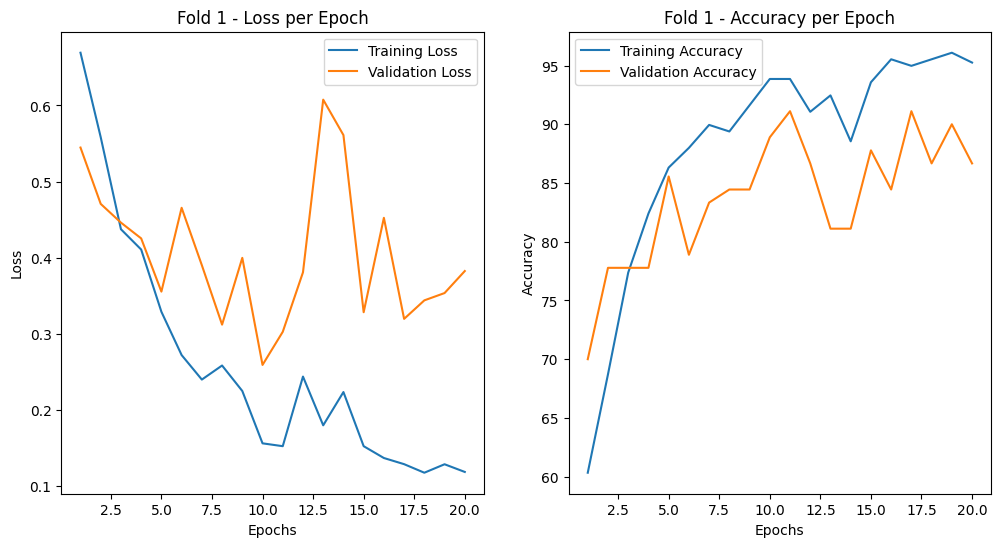

Fold 2
Epoch 1/20, Loss: 0.6577, Accuracy: 64.25%, Validation Loss: 0.7060, Validation Accuracy: 66.67%
Epoch 2/20, Loss: 0.5547, Accuracy: 74.30%, Validation Loss: 0.5666, Validation Accuracy: 74.44%
Epoch 3/20, Loss: 0.4444, Accuracy: 78.77%, Validation Loss: 0.4806, Validation Accuracy: 78.89%
Epoch 4/20, Loss: 0.3832, Accuracy: 84.08%, Validation Loss: 0.4874, Validation Accuracy: 73.33%
Epoch 5/20, Loss: 0.3568, Accuracy: 84.92%, Validation Loss: 0.4035, Validation Accuracy: 85.56%
Epoch 6/20, Loss: 0.3123, Accuracy: 87.99%, Validation Loss: 0.3649, Validation Accuracy: 82.22%
Epoch 7/20, Loss: 0.2371, Accuracy: 90.78%, Validation Loss: 0.3932, Validation Accuracy: 80.00%
Epoch 8/20, Loss: 0.2749, Accuracy: 91.90%, Validation Loss: 0.3375, Validation Accuracy: 88.89%
Epoch 9/20, Loss: 0.2275, Accuracy: 90.22%, Validation Loss: 0.2578, Validation Accuracy: 88.89%
Epoch 10/20, Loss: 0.2801, Accuracy: 90.22%, Validation Loss: 0.2616, Validation Accuracy: 90.00%
Epoch 11/20, Loss: 0.2

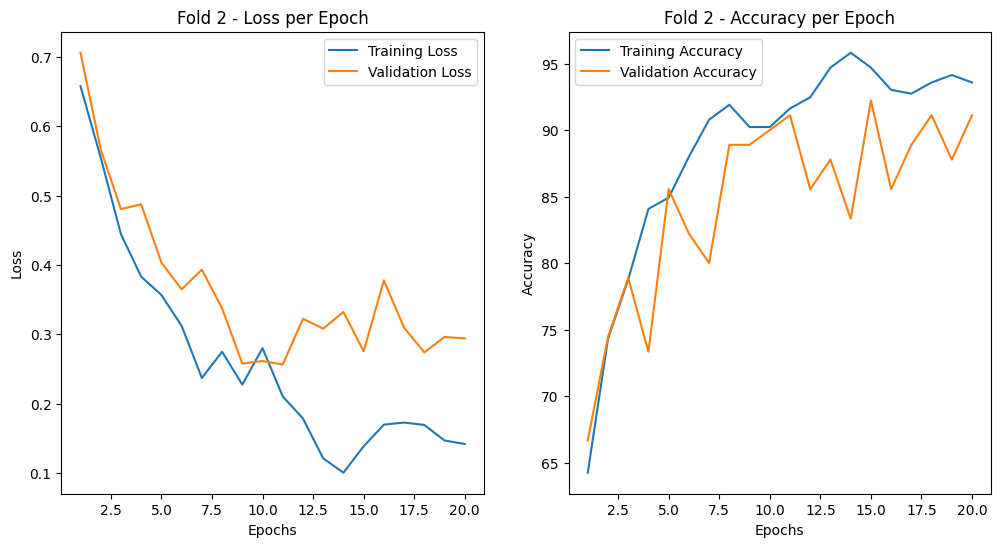

Fold 3
Epoch 1/20, Loss: 0.6256, Accuracy: 60.89%, Validation Loss: 0.6732, Validation Accuracy: 68.89%
Epoch 2/20, Loss: 0.5146, Accuracy: 74.58%, Validation Loss: 0.5354, Validation Accuracy: 66.67%
Epoch 3/20, Loss: 0.4680, Accuracy: 78.21%, Validation Loss: 0.5499, Validation Accuracy: 71.11%
Epoch 4/20, Loss: 0.3798, Accuracy: 82.68%, Validation Loss: 0.4156, Validation Accuracy: 80.00%
Epoch 5/20, Loss: 0.2794, Accuracy: 89.11%, Validation Loss: 0.4202, Validation Accuracy: 81.11%
Epoch 6/20, Loss: 0.3214, Accuracy: 86.31%, Validation Loss: 0.3370, Validation Accuracy: 84.44%
Epoch 7/20, Loss: 0.2909, Accuracy: 89.94%, Validation Loss: 0.4272, Validation Accuracy: 83.33%
Epoch 8/20, Loss: 0.2958, Accuracy: 87.99%, Validation Loss: 0.4348, Validation Accuracy: 83.33%
Epoch 9/20, Loss: 0.2502, Accuracy: 90.50%, Validation Loss: 0.3800, Validation Accuracy: 83.33%
Epoch 10/20, Loss: 0.1794, Accuracy: 93.30%, Validation Loss: 0.3135, Validation Accuracy: 86.67%
Epoch 11/20, Loss: 0.1

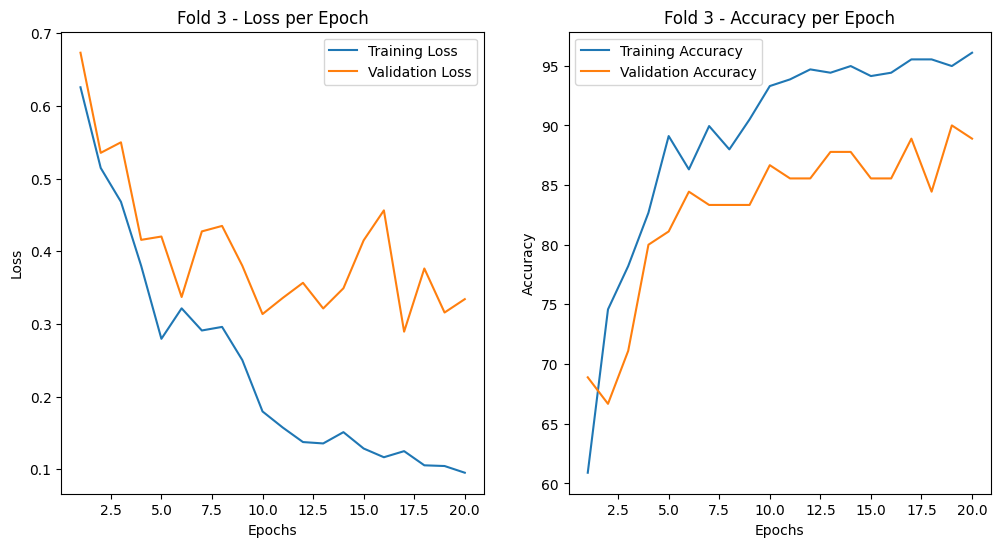

Fold 4
Epoch 1/20, Loss: 0.6863, Accuracy: 67.97%, Validation Loss: 0.6862, Validation Accuracy: 64.04%
Epoch 2/20, Loss: 0.5922, Accuracy: 70.75%, Validation Loss: 0.5831, Validation Accuracy: 67.42%
Epoch 3/20, Loss: 0.4945, Accuracy: 76.04%, Validation Loss: 0.4981, Validation Accuracy: 74.16%
Epoch 4/20, Loss: 0.4100, Accuracy: 80.50%, Validation Loss: 0.4356, Validation Accuracy: 79.78%
Epoch 5/20, Loss: 0.3367, Accuracy: 86.63%, Validation Loss: 0.4545, Validation Accuracy: 79.78%
Epoch 6/20, Loss: 0.3149, Accuracy: 86.63%, Validation Loss: 0.4546, Validation Accuracy: 78.65%
Epoch 7/20, Loss: 0.2303, Accuracy: 90.81%, Validation Loss: 0.4430, Validation Accuracy: 80.90%
Epoch 8/20, Loss: 0.2249, Accuracy: 92.20%, Validation Loss: 0.4557, Validation Accuracy: 84.27%
Epoch 9/20, Loss: 0.2552, Accuracy: 91.64%, Validation Loss: 0.4133, Validation Accuracy: 77.53%
Epoch 10/20, Loss: 0.1681, Accuracy: 93.04%, Validation Loss: 0.2922, Validation Accuracy: 87.64%
Epoch 11/20, Loss: 0.1

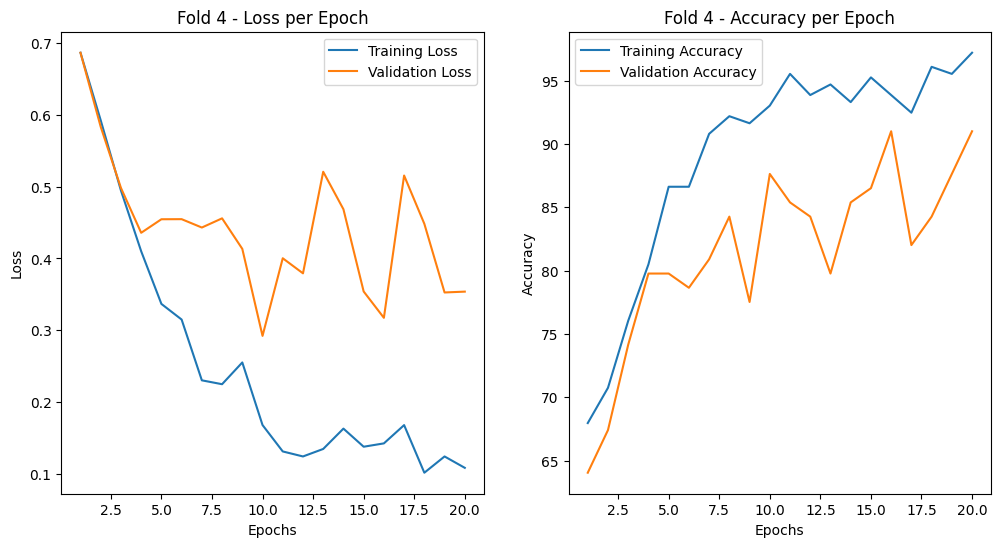

Fold 5
Epoch 1/20, Loss: 0.6515, Accuracy: 66.57%, Validation Loss: 0.5540, Validation Accuracy: 69.66%
Epoch 2/20, Loss: 0.5080, Accuracy: 75.21%, Validation Loss: 0.4777, Validation Accuracy: 79.78%
Epoch 3/20, Loss: 0.4035, Accuracy: 82.45%, Validation Loss: 0.4270, Validation Accuracy: 74.16%
Epoch 4/20, Loss: 0.3456, Accuracy: 85.79%, Validation Loss: 0.5132, Validation Accuracy: 74.16%
Epoch 5/20, Loss: 0.3415, Accuracy: 85.24%, Validation Loss: 0.3590, Validation Accuracy: 84.27%
Epoch 6/20, Loss: 0.2581, Accuracy: 88.02%, Validation Loss: 0.4126, Validation Accuracy: 84.27%
Epoch 7/20, Loss: 0.2120, Accuracy: 92.76%, Validation Loss: 0.3878, Validation Accuracy: 80.90%
Epoch 8/20, Loss: 0.1759, Accuracy: 92.20%, Validation Loss: 0.3498, Validation Accuracy: 86.52%
Epoch 9/20, Loss: 0.1595, Accuracy: 94.43%, Validation Loss: 0.3450, Validation Accuracy: 88.76%
Epoch 10/20, Loss: 0.1386, Accuracy: 92.76%, Validation Loss: 0.3540, Validation Accuracy: 89.89%
Epoch 11/20, Loss: 0.1

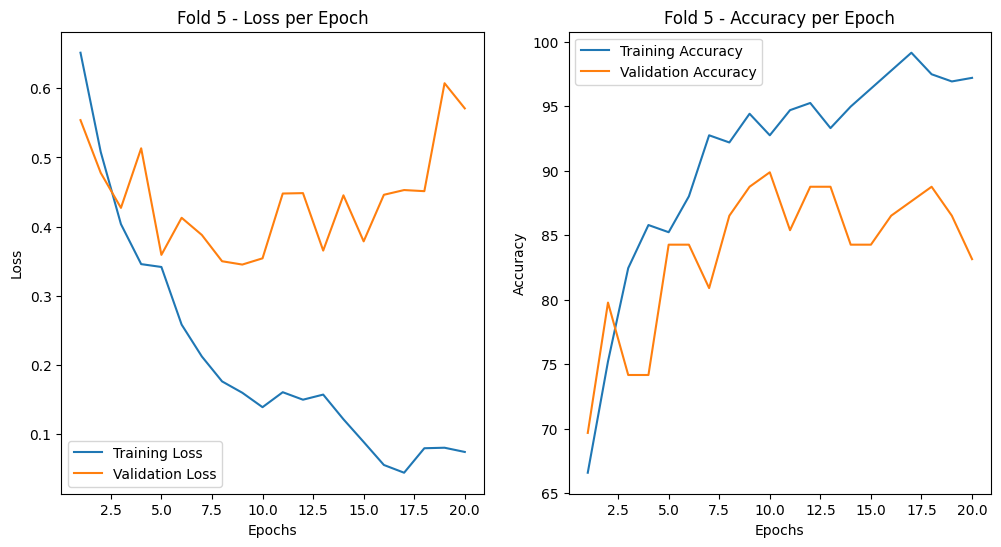

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.1188 - Train Accuracy: 95.25%
           - Validation Loss: 0.3825 - Validation Accuracy: 86.67%
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.1419 - Train Accuracy: 93.58%
           - Validation Loss: 0.2942 - Validation Accuracy: 91.11%
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.0951 - Train Accuracy: 96.09%
           - Validation Loss: 0.3340 - Validation Accuracy: 88.89%
------------------------------------------------------------------------
> Fold 4 - Train Loss: 0.1085 - Train Accuracy: 97.21%
           - Validation Loss: 0.3538 - Validation Accuracy: 91.01%
------------------------------------------------------------------------
> Fold 5 - Train Loss: 0.0738 - Train Accuracy: 97.21%
    

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss dan akurasi per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop untuk fold ini
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = 100 * correct_train / total_train

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_loss /= len(val_loader_fold)
        val_accuracy = 100 * correct_val / total_val

        # Simpan loss dan akurasi per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)

    # Simpan model
    model_filename = f'models_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss dan akurasi
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.4f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f}%')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:-.4f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.4f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.4f}')
print('------------------------------------------------------------------------')


In [ ]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.86      0.89      0.88        47
      Normal       0.88      0.84      0.86        43

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.87      0.98      0.92        47
      Normal       0.97      0.84      0.90        43

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90

--------------------------------------------------------------------------------
Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.83      0

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first

Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.89      0.93      0.91        42
      Normal       0.93      0.89      0.91        47

    accuracy                           0.91        89
   macro avg       0.91      0.91      0.91        89
weighted avg       0.91      0.91      0.91        89

--------------------------------------------------------------------------------
Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.82      0.80      0.81        40
      Normal       0.84      0.86      0.85        49

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


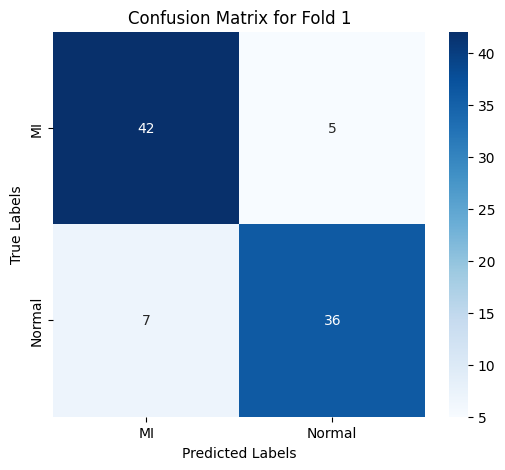

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


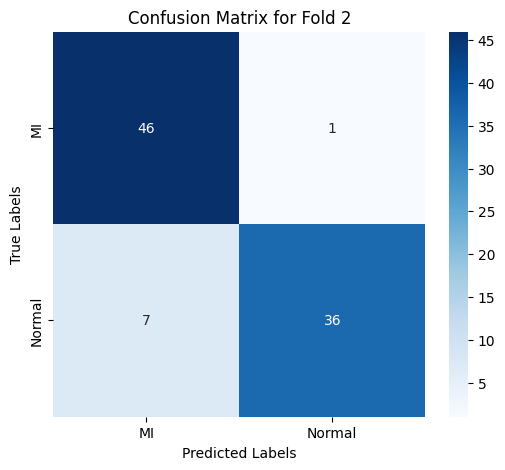

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


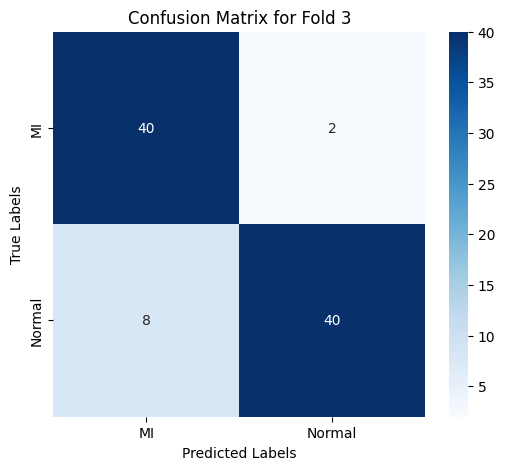

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


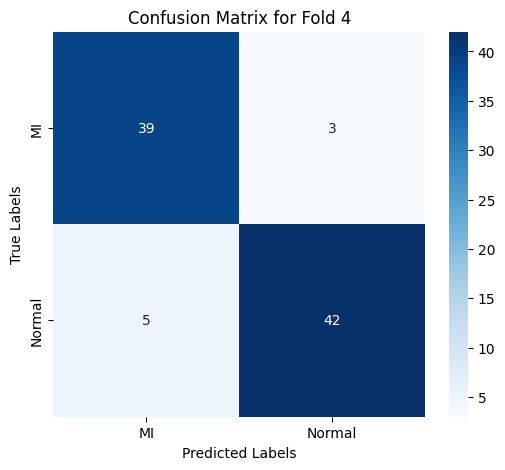

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


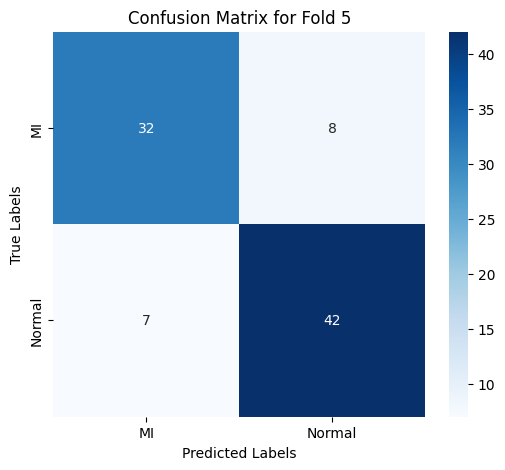

--------------------------------------------------------------------------------


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## Transformer Decoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class TransformerDecoderModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerDecoderModel, self).__init__()
        # Embed input sesuai dengan input_dim yang sesuai dari data
        self.embedding = nn.Linear(input_dim, dim_feedforward)

        # Adding an encoder representation as memory for the decoder
        self.memory_projection = nn.Linear(dim_feedforward, dim_feedforward)

        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        # Embed input
        x = self.embedding(x)

        # Ensure proper shape for sequence dimension
        x = x.unsqueeze(0)  # Adding sequence dimension

        # Prepare memory
        memory = self.memory_projection(x)

        # Forward through TransformerDecoder with memory
        x = self.transformer_decoder(x, memory)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x



# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1
Epoch 1/20, Loss: 0.6172, Accuracy: 64.53%, Validation Loss: 0.6140, Validation Accuracy: 62.22%
Epoch 2/20, Loss: 0.5471, Accuracy: 70.95%, Validation Loss: 0.5307, Validation Accuracy: 72.22%
Epoch 3/20, Loss: 0.4360, Accuracy: 77.93%, Validation Loss: 0.4612, Validation Accuracy: 73.33%
Epoch 4/20, Loss: 0.3696, Accuracy: 83.80%, Validation Loss: 0.4323, Validation Accuracy: 74.44%
Epoch 5/20, Loss: 0.3379, Accuracy: 85.75%, Validation Loss: 0.3797, Validation Accuracy: 81.11%
Epoch 6/20, Loss: 0.2318, Accuracy: 89.94%, Validation Loss: 0.3126, Validation Accuracy: 86.67%
Epoch 7/20, Loss: 0.2296, Accuracy: 90.50%, Validation Loss: 0.3766, Validation Accuracy: 83.33%
Epoch 8/20, Loss: 0.2398, Accuracy: 91.62%, Validation Loss: 0.4333, Validation Accuracy: 81.11%
Epoch 9/20, Loss: 0.1837, Accuracy: 91.62%, Validation Loss: 0.3741, Validation Accuracy: 84.44%
Epoch 10/20, Loss: 0.1890, Accuracy: 92.46%, Validation Loss: 0.4211, Validation Accuracy: 85.56%
Epoch 11/20, Loss: 0.1

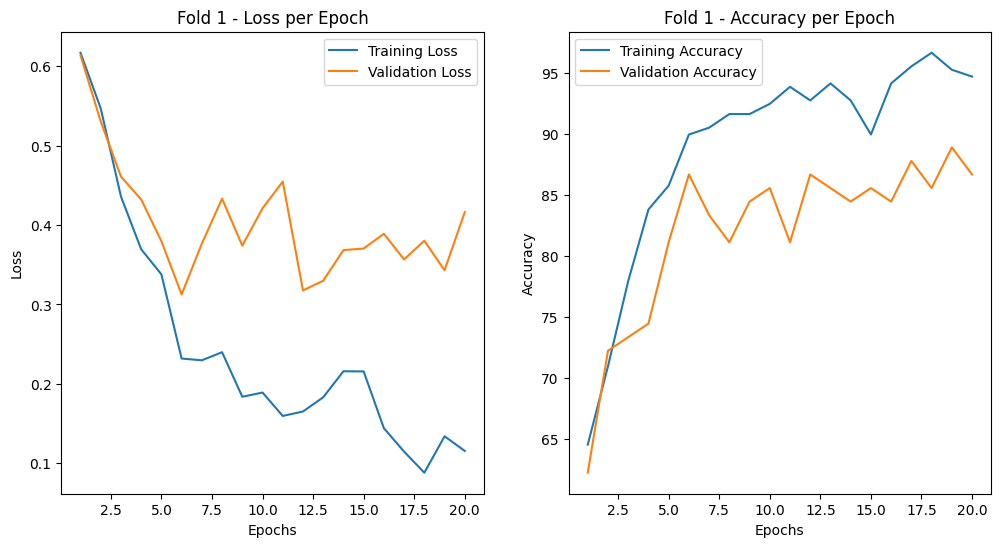

Fold 2
Epoch 1/20, Loss: 0.6530, Accuracy: 64.53%, Validation Loss: 0.6481, Validation Accuracy: 63.33%
Epoch 2/20, Loss: 0.4848, Accuracy: 75.14%, Validation Loss: 0.4686, Validation Accuracy: 82.22%
Epoch 3/20, Loss: 0.4459, Accuracy: 79.05%, Validation Loss: 0.4585, Validation Accuracy: 78.89%
Epoch 4/20, Loss: 0.3930, Accuracy: 82.40%, Validation Loss: 0.4173, Validation Accuracy: 80.00%
Epoch 5/20, Loss: 0.3178, Accuracy: 85.47%, Validation Loss: 0.3374, Validation Accuracy: 85.56%
Epoch 6/20, Loss: 0.2805, Accuracy: 86.59%, Validation Loss: 0.4795, Validation Accuracy: 76.67%
Epoch 7/20, Loss: 0.2736, Accuracy: 86.87%, Validation Loss: 0.3183, Validation Accuracy: 87.78%
Epoch 8/20, Loss: 0.2586, Accuracy: 86.87%, Validation Loss: 0.3807, Validation Accuracy: 84.44%
Epoch 9/20, Loss: 0.2642, Accuracy: 90.50%, Validation Loss: 0.4031, Validation Accuracy: 78.89%
Epoch 10/20, Loss: 0.2528, Accuracy: 89.66%, Validation Loss: 0.3651, Validation Accuracy: 83.33%
Epoch 11/20, Loss: 0.2

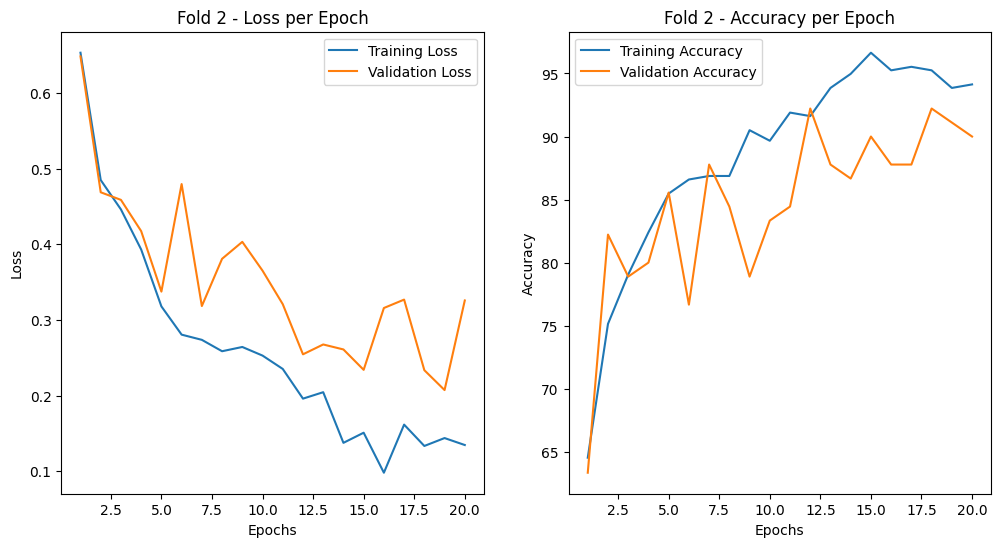

Fold 3
Epoch 1/20, Loss: 0.6823, Accuracy: 67.88%, Validation Loss: 0.5917, Validation Accuracy: 66.67%
Epoch 2/20, Loss: 0.5003, Accuracy: 74.86%, Validation Loss: 0.4863, Validation Accuracy: 75.56%
Epoch 3/20, Loss: 0.4205, Accuracy: 81.28%, Validation Loss: 0.4923, Validation Accuracy: 73.33%
Epoch 4/20, Loss: 0.3451, Accuracy: 83.24%, Validation Loss: 0.4347, Validation Accuracy: 83.33%
Epoch 5/20, Loss: 0.3076, Accuracy: 86.87%, Validation Loss: 0.3684, Validation Accuracy: 83.33%
Epoch 6/20, Loss: 0.3017, Accuracy: 87.43%, Validation Loss: 0.3550, Validation Accuracy: 86.67%
Epoch 7/20, Loss: 0.2072, Accuracy: 91.34%, Validation Loss: 0.3722, Validation Accuracy: 82.22%
Epoch 8/20, Loss: 0.2191, Accuracy: 90.78%, Validation Loss: 0.5212, Validation Accuracy: 78.89%
Epoch 9/20, Loss: 0.2129, Accuracy: 92.46%, Validation Loss: 0.2750, Validation Accuracy: 88.89%
Epoch 10/20, Loss: 0.2420, Accuracy: 89.94%, Validation Loss: 0.3632, Validation Accuracy: 86.67%
Epoch 11/20, Loss: 0.1

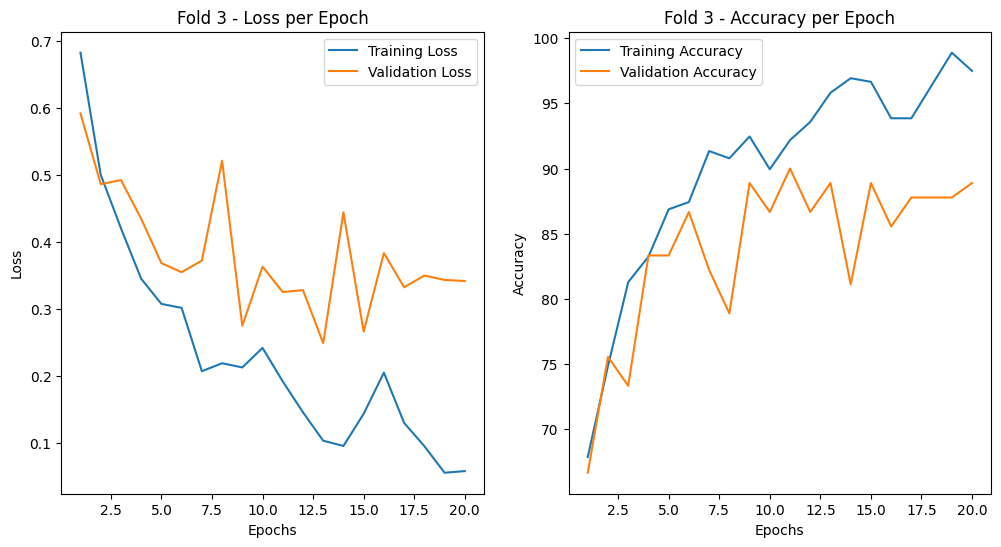

Fold 4
Epoch 1/20, Loss: 0.6396, Accuracy: 62.67%, Validation Loss: 0.7224, Validation Accuracy: 66.29%
Epoch 2/20, Loss: 0.5167, Accuracy: 72.14%, Validation Loss: 0.5446, Validation Accuracy: 74.16%
Epoch 3/20, Loss: 0.4347, Accuracy: 76.88%, Validation Loss: 0.4554, Validation Accuracy: 79.78%
Epoch 4/20, Loss: 0.3762, Accuracy: 83.01%, Validation Loss: 0.5016, Validation Accuracy: 71.91%
Epoch 5/20, Loss: 0.3019, Accuracy: 87.74%, Validation Loss: 0.4297, Validation Accuracy: 83.15%
Epoch 6/20, Loss: 0.2111, Accuracy: 93.04%, Validation Loss: 0.4535, Validation Accuracy: 82.02%
Epoch 7/20, Loss: 0.1960, Accuracy: 91.64%, Validation Loss: 0.4071, Validation Accuracy: 83.15%
Epoch 8/20, Loss: 0.2204, Accuracy: 90.53%, Validation Loss: 0.4804, Validation Accuracy: 82.02%
Epoch 9/20, Loss: 0.1945, Accuracy: 91.92%, Validation Loss: 0.4582, Validation Accuracy: 85.39%
Epoch 10/20, Loss: 0.1924, Accuracy: 92.20%, Validation Loss: 0.4361, Validation Accuracy: 84.27%
Epoch 11/20, Loss: 0.1

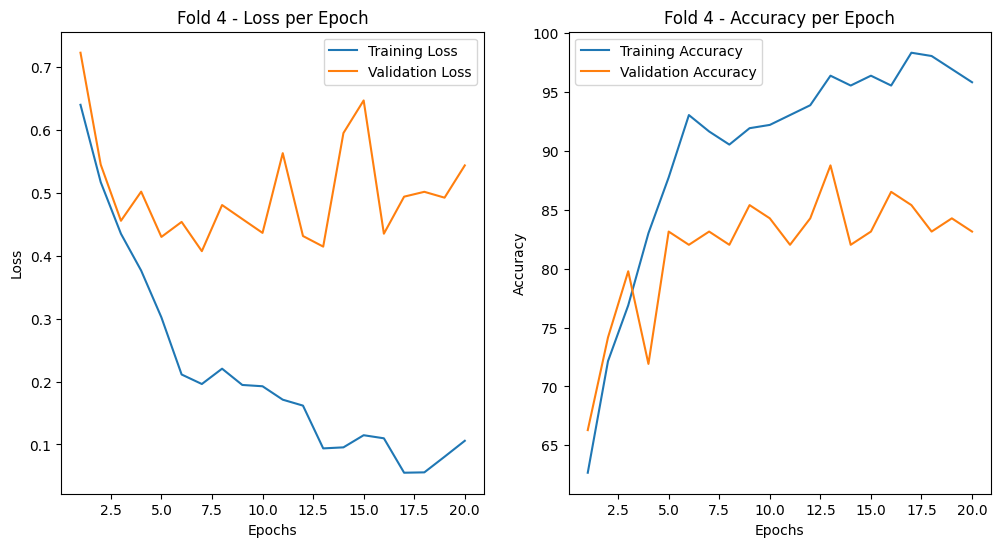

Fold 5
Epoch 1/20, Loss: 0.6126, Accuracy: 65.46%, Validation Loss: 0.4991, Validation Accuracy: 71.91%
Epoch 2/20, Loss: 0.5472, Accuracy: 73.26%, Validation Loss: 0.5061, Validation Accuracy: 73.03%
Epoch 3/20, Loss: 0.4499, Accuracy: 77.72%, Validation Loss: 0.4468, Validation Accuracy: 76.40%
Epoch 4/20, Loss: 0.3561, Accuracy: 85.52%, Validation Loss: 0.4172, Validation Accuracy: 77.53%
Epoch 5/20, Loss: 0.2907, Accuracy: 88.02%, Validation Loss: 0.4101, Validation Accuracy: 83.15%
Epoch 6/20, Loss: 0.2556, Accuracy: 88.86%, Validation Loss: 0.3723, Validation Accuracy: 84.27%
Epoch 7/20, Loss: 0.2163, Accuracy: 89.97%, Validation Loss: 0.4255, Validation Accuracy: 80.90%
Epoch 8/20, Loss: 0.1651, Accuracy: 94.15%, Validation Loss: 0.4449, Validation Accuracy: 82.02%
Epoch 9/20, Loss: 0.1429, Accuracy: 94.43%, Validation Loss: 0.4033, Validation Accuracy: 89.89%
Epoch 10/20, Loss: 0.1474, Accuracy: 93.04%, Validation Loss: 0.4819, Validation Accuracy: 87.64%
Epoch 11/20, Loss: 0.1

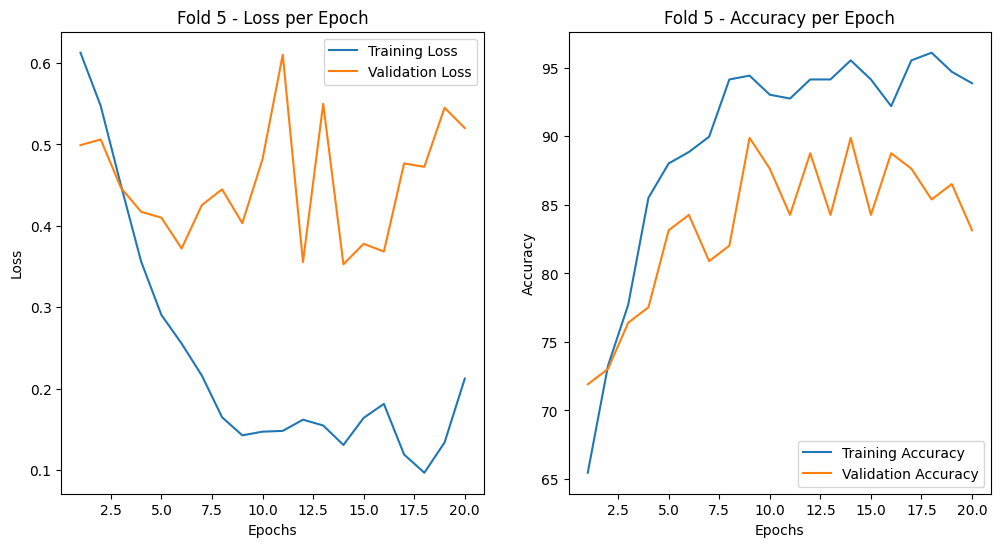

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.1154 - Train Accuracy: 94.69%
           - Validation Loss: 0.4164 - Validation Accuracy: 86.67%
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.1347 - Train Accuracy: 94.13%
           - Validation Loss: 0.3257 - Validation Accuracy: 90.00%
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.0582 - Train Accuracy: 97.49%
           - Validation Loss: 0.3418 - Validation Accuracy: 88.89%
------------------------------------------------------------------------
> Fold 4 - Train Loss: 0.1058 - Train Accuracy: 95.82%
           - Validation Loss: 0.5433 - Validation Accuracy: 83.15%
------------------------------------------------------------------------
> Fold 5 - Train Loss: 0.2126 - Train Accuracy: 93.87%
    

In [ ]:
# Initialize KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results for each fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

# Create directory to save models if not exists
os.makedirs('models_transformer_decoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Split data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Create TensorDataset for train and validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize model and optimizer for each fold
    model = TransformerDecoderModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Store loss and accuracy per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop for this fold
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = 100 * correct_train / total_train

        # Evaluate on validation data
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_loss /= len(val_loader_fold)
        val_accuracy = 100 * correct_val / total_val

        # Save loss and accuracy per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)

    # Save model
    model_filename = f'models_transformer_decoder/transformer_decoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot loss and accuracy graphs
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Display final results
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.4f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f}%')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:-.4f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.4f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.4f}')
print('------------------------------------------------------------------------')

# Evaluate on the test set with the last model
# model.eval()
# test_loss = 0.0
# correct_test = 0
# total_test = 0
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         test_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total_test += y_batch.size(0)
#         correct_test += (predicted == y_batch).sum().item()

# test_loss /= len(test_loader)
# test_accuracy = 100 * correct_test / total_test

# print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

In [ ]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_transformer_decoder/transformer_decoder_model_fold_{fold_no}.pth'
    model = TransformerDecoderModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


<ipython-input-37-3adcd6308333>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.87      0.87      0.87        47
      Normal       0.86      0.86      0.86        43

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

--------------------------------------------------------------------------------


<ipython-input-37-3adcd6308333>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.91      0.89      0.90        47
      Normal       0.89      0.91      0.90        43

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90

--------------------------------------------------------------------------------


<ipython-input-37-3adcd6308333>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.82      0.98      0.89        42
      Normal       0.97      0.81      0.89        48

    accuracy                           0.89        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.90      0.89      0.89        90

--------------------------------------------------------------------------------


<ipython-input-37-3adcd6308333>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.80      0.86      0.83        42
      Normal       0.86      0.81      0.84        47

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89

--------------------------------------------------------------------------------


<ipython-input-37-3adcd6308333>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.84      0.78      0.81        40
      Normal       0.83      0.88      0.85        49

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89

--------------------------------------------------------------------------------


<ipython-input-38-5dd07a9f4a40>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


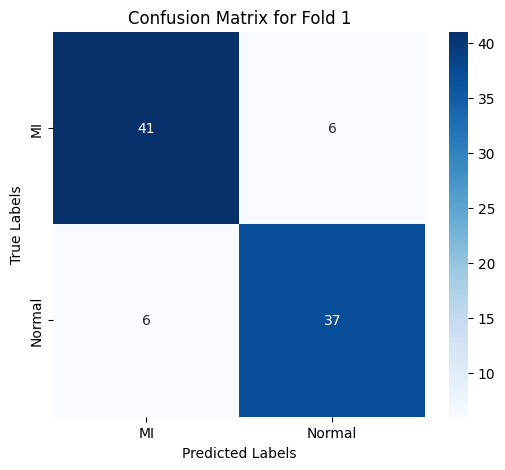

--------------------------------------------------------------------------------


<ipython-input-38-5dd07a9f4a40>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


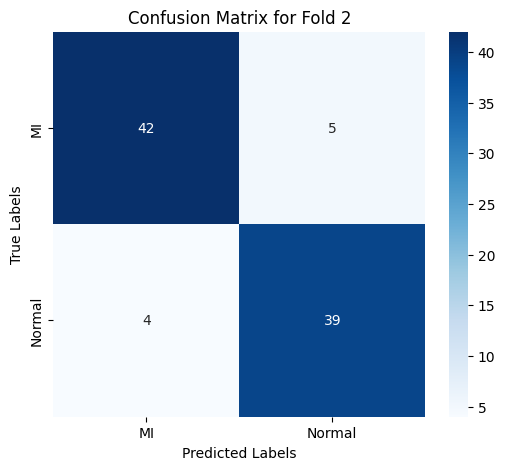

--------------------------------------------------------------------------------


<ipython-input-38-5dd07a9f4a40>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


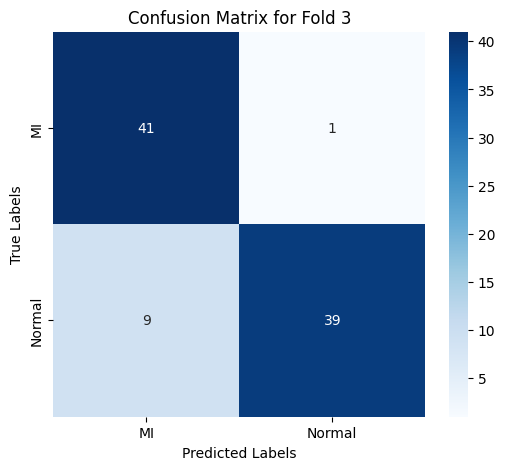

--------------------------------------------------------------------------------


<ipython-input-38-5dd07a9f4a40>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


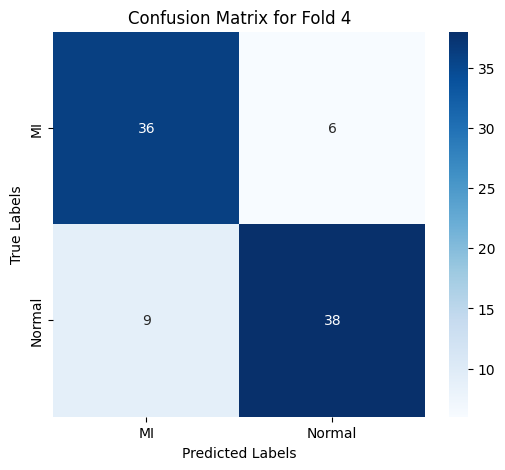

--------------------------------------------------------------------------------


<ipython-input-38-5dd07a9f4a40>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


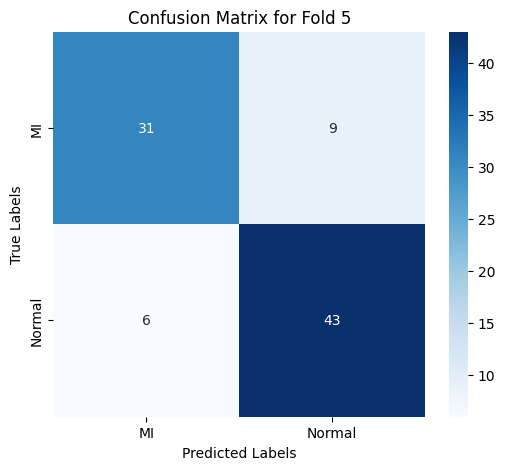

--------------------------------------------------------------------------------


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_transformer_decoder/transformer_decoder_model_fold_{fold_no}.pth'
    model = TransformerDecoderModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


# Confusion Matrix and Classification Report
# y_true = []
# y_pred = []
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs.data, 1)
#         y_true.extend(y_batch.numpy())
#         y_pred.extend(predicted.numpy())

# conf_matrix = confusion_matrix(y_true, y_pred)
# clf_report = classification_report(y_true, y_pred)

# print("Confusion Matrix:")
# print(conf_matrix)
# print("\nClassification Report:")
# print(clf_report)

# # Plot Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'MI'], yticklabels=['Normal', 'MI'])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt

## Transformer Encoder Decoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Definisikan Model dengan Encoder dan Decoder
class TransformerEncoderDecoderModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=128):
        super(TransformerEncoderDecoderModel, self).__init__()

        # Embedding untuk input dan target
        self.embedding = nn.Linear(input_dim, dim_feedforward)

        # Transformer Encoder
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_encoder_layers
        )

        # Transformer Decoder
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_decoder_layers
        )

        # Linear layer untuk mengubah output decoder menjadi logits
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, src, tgt):
        # src: input data (e.g., features or sequences)
        # tgt: target sequence (e.g., labels or tokens)

        # Encode the source input
        src = self.embedding(src)
        memory = self.transformer_encoder(src.unsqueeze(1))  # Add sequence dim if needed

        # Decode the target input
        tgt = self.embedding(tgt)
        output = self.transformer_decoder(tgt.unsqueeze(1), memory)  # Pass tgt and memory to decoder

        # Final output layer (logits)
        output = self.fc(output.squeeze(1))  # Squeeze sequence dimension

        return output

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

# Assume you have some input data and target data
# src = torch.randn((32, input_dim))  # batch_size=32, input_dim=128
# tgt = torch.randn((32, input_dim))  # Target tensor of the same dimension

Fold 1
Epoch 1/20, Loss: 0.8540, Accuracy: 54.75%, Validation Loss: 0.6408, Validation Accuracy: 67.78%
Epoch 2/20, Loss: 0.6993, Accuracy: 55.59%, Validation Loss: 0.5737, Validation Accuracy: 66.67%
Epoch 3/20, Loss: 0.6284, Accuracy: 66.76%, Validation Loss: 0.5291, Validation Accuracy: 75.56%
Epoch 4/20, Loss: 0.5764, Accuracy: 66.76%, Validation Loss: 0.5368, Validation Accuracy: 70.00%
Epoch 5/20, Loss: 0.5027, Accuracy: 75.70%, Validation Loss: 0.5394, Validation Accuracy: 73.33%
Epoch 6/20, Loss: 0.4573, Accuracy: 76.26%, Validation Loss: 0.5056, Validation Accuracy: 75.56%
Epoch 7/20, Loss: 0.4290, Accuracy: 76.82%, Validation Loss: 0.4848, Validation Accuracy: 71.11%
Epoch 8/20, Loss: 0.4089, Accuracy: 78.49%, Validation Loss: 0.4651, Validation Accuracy: 78.89%
Epoch 9/20, Loss: 0.3483, Accuracy: 87.43%, Validation Loss: 0.3997, Validation Accuracy: 85.56%
Epoch 10/20, Loss: 0.3542, Accuracy: 88.27%, Validation Loss: 0.4364, Validation Accuracy: 75.56%
Epoch 11/20, Loss: 0.2

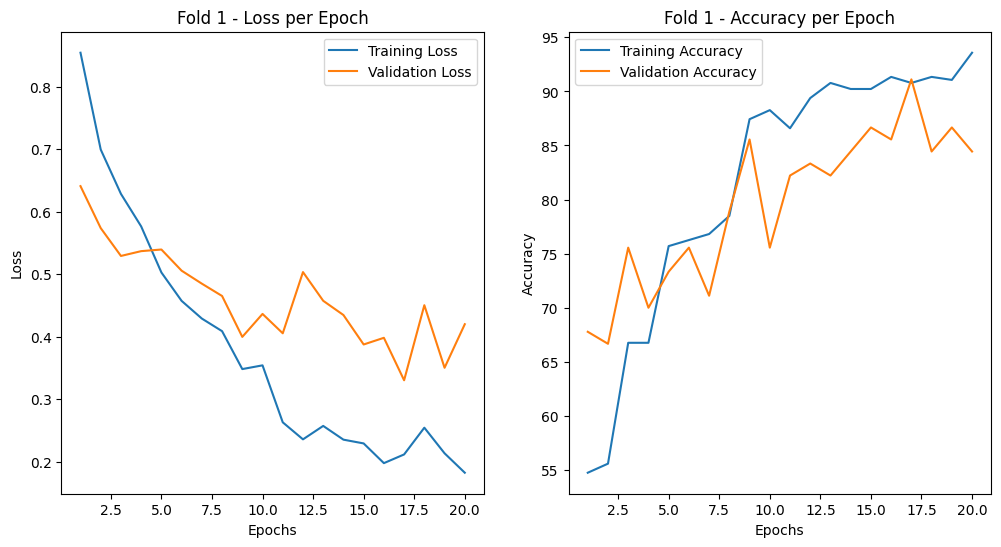

Fold 2
Epoch 1/20, Loss: 0.7812, Accuracy: 60.89%, Validation Loss: 0.6299, Validation Accuracy: 64.44%
Epoch 2/20, Loss: 0.5329, Accuracy: 72.07%, Validation Loss: 0.5246, Validation Accuracy: 75.56%
Epoch 3/20, Loss: 0.5140, Accuracy: 72.07%, Validation Loss: 0.5005, Validation Accuracy: 74.44%
Epoch 4/20, Loss: 0.4612, Accuracy: 77.65%, Validation Loss: 0.5338, Validation Accuracy: 71.11%
Epoch 5/20, Loss: 0.4874, Accuracy: 75.42%, Validation Loss: 0.4497, Validation Accuracy: 76.67%
Epoch 6/20, Loss: 0.4238, Accuracy: 78.77%, Validation Loss: 0.4453, Validation Accuracy: 80.00%
Epoch 7/20, Loss: 0.3581, Accuracy: 84.64%, Validation Loss: 0.3149, Validation Accuracy: 87.78%
Epoch 8/20, Loss: 0.2675, Accuracy: 88.27%, Validation Loss: 0.3947, Validation Accuracy: 84.44%
Epoch 9/20, Loss: 0.2463, Accuracy: 88.27%, Validation Loss: 0.3517, Validation Accuracy: 83.33%
Epoch 10/20, Loss: 0.2567, Accuracy: 89.94%, Validation Loss: 0.4102, Validation Accuracy: 85.56%
Epoch 11/20, Loss: 0.2

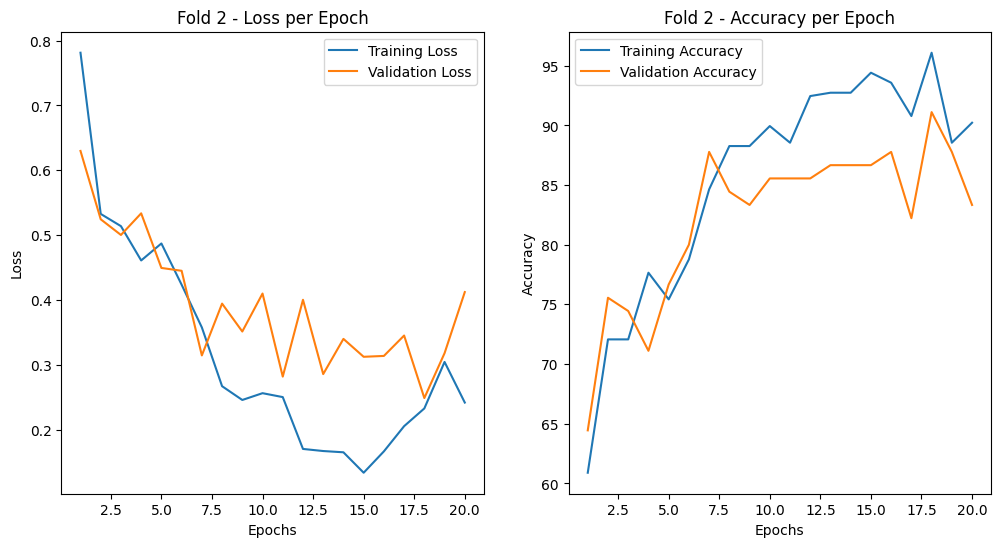

Fold 3
Epoch 1/20, Loss: 0.8093, Accuracy: 56.98%, Validation Loss: 0.6406, Validation Accuracy: 57.78%
Epoch 2/20, Loss: 0.6135, Accuracy: 68.44%, Validation Loss: 0.6258, Validation Accuracy: 63.33%
Epoch 3/20, Loss: 0.5486, Accuracy: 73.18%, Validation Loss: 0.5298, Validation Accuracy: 66.67%
Epoch 4/20, Loss: 0.4653, Accuracy: 75.14%, Validation Loss: 0.5065, Validation Accuracy: 80.00%
Epoch 5/20, Loss: 0.5081, Accuracy: 73.46%, Validation Loss: 0.5647, Validation Accuracy: 70.00%
Epoch 6/20, Loss: 0.3840, Accuracy: 82.40%, Validation Loss: 0.5541, Validation Accuracy: 76.67%
Epoch 7/20, Loss: 0.4231, Accuracy: 79.33%, Validation Loss: 0.4139, Validation Accuracy: 84.44%
Epoch 8/20, Loss: 0.3759, Accuracy: 82.40%, Validation Loss: 0.5487, Validation Accuracy: 68.89%
Epoch 9/20, Loss: 0.3733, Accuracy: 82.68%, Validation Loss: 0.4675, Validation Accuracy: 78.89%
Epoch 10/20, Loss: 0.2715, Accuracy: 88.27%, Validation Loss: 0.5875, Validation Accuracy: 80.00%
Epoch 11/20, Loss: 0.2

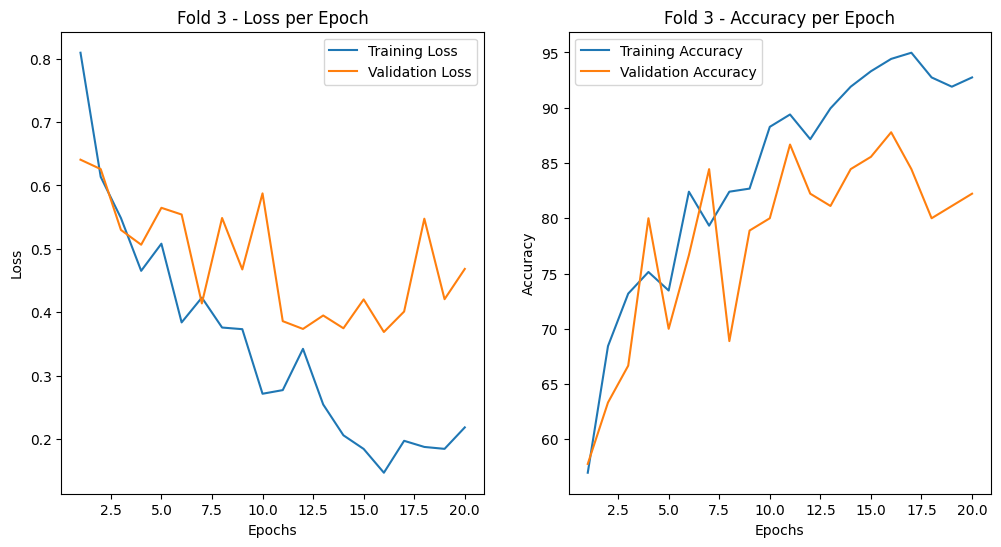

Fold 4
Epoch 1/20, Loss: 0.8125, Accuracy: 57.66%, Validation Loss: 0.6933, Validation Accuracy: 49.44%
Epoch 2/20, Loss: 0.6059, Accuracy: 64.35%, Validation Loss: 0.6656, Validation Accuracy: 67.42%
Epoch 3/20, Loss: 0.5723, Accuracy: 70.75%, Validation Loss: 0.5867, Validation Accuracy: 60.67%
Epoch 4/20, Loss: 0.5278, Accuracy: 72.98%, Validation Loss: 0.4939, Validation Accuracy: 73.03%
Epoch 5/20, Loss: 0.4458, Accuracy: 75.21%, Validation Loss: 0.5405, Validation Accuracy: 71.91%
Epoch 6/20, Loss: 0.3982, Accuracy: 81.62%, Validation Loss: 0.5331, Validation Accuracy: 75.28%
Epoch 7/20, Loss: 0.4031, Accuracy: 80.22%, Validation Loss: 0.4776, Validation Accuracy: 79.78%
Epoch 8/20, Loss: 0.3094, Accuracy: 85.24%, Validation Loss: 0.5508, Validation Accuracy: 77.53%
Epoch 9/20, Loss: 0.3395, Accuracy: 85.24%, Validation Loss: 0.5107, Validation Accuracy: 75.28%
Epoch 10/20, Loss: 0.2446, Accuracy: 90.81%, Validation Loss: 0.5723, Validation Accuracy: 79.78%
Epoch 11/20, Loss: 0.2

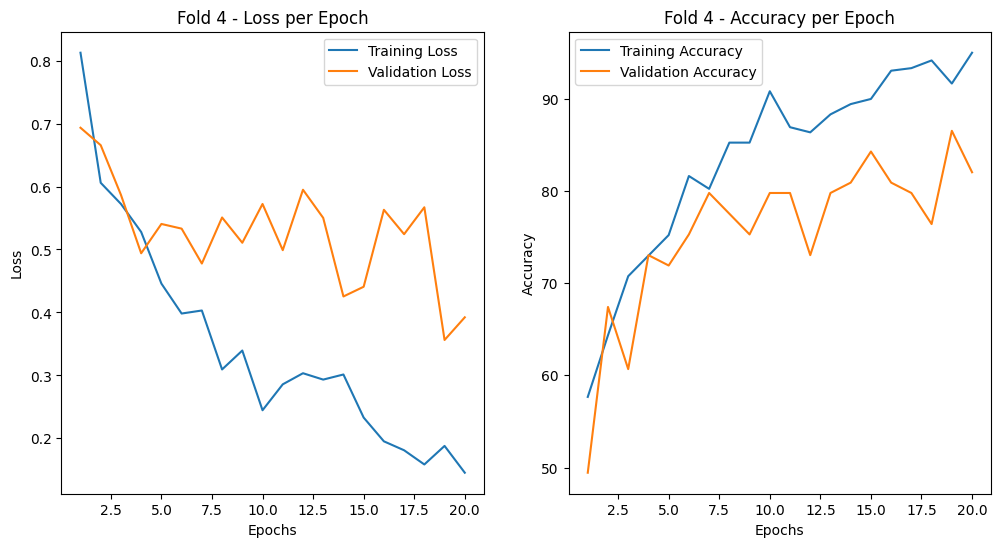

Fold 5
Epoch 1/20, Loss: 0.7514, Accuracy: 57.94%, Validation Loss: 0.5903, Validation Accuracy: 66.29%
Epoch 2/20, Loss: 0.5627, Accuracy: 69.36%, Validation Loss: 0.6568, Validation Accuracy: 64.04%
Epoch 3/20, Loss: 0.5597, Accuracy: 70.19%, Validation Loss: 0.5085, Validation Accuracy: 69.66%
Epoch 4/20, Loss: 0.4730, Accuracy: 73.54%, Validation Loss: 0.6197, Validation Accuracy: 74.16%
Epoch 5/20, Loss: 0.4257, Accuracy: 79.67%, Validation Loss: 0.5239, Validation Accuracy: 77.53%
Epoch 6/20, Loss: 0.3993, Accuracy: 82.73%, Validation Loss: 0.5477, Validation Accuracy: 75.28%
Epoch 7/20, Loss: 0.3919, Accuracy: 80.78%, Validation Loss: 0.6355, Validation Accuracy: 71.91%
Epoch 8/20, Loss: 0.3704, Accuracy: 81.62%, Validation Loss: 0.4356, Validation Accuracy: 82.02%
Epoch 9/20, Loss: 0.2829, Accuracy: 87.74%, Validation Loss: 0.4497, Validation Accuracy: 79.78%
Epoch 10/20, Loss: 0.3154, Accuracy: 86.35%, Validation Loss: 0.3840, Validation Accuracy: 86.52%
Epoch 11/20, Loss: 0.3

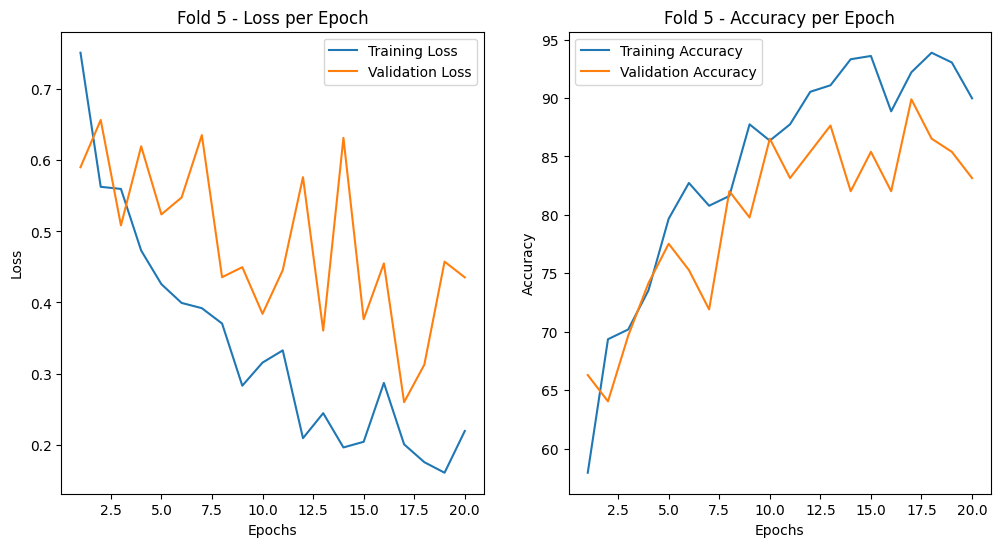

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.1826 - Train Accuracy: 93.58%
           - Validation Loss: 0.4200 - Validation Accuracy: 84.44%
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.2423 - Train Accuracy: 90.22%
           - Validation Loss: 0.4125 - Validation Accuracy: 83.33%
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.2184 - Train Accuracy: 92.74%
           - Validation Loss: 0.4683 - Validation Accuracy: 82.22%
------------------------------------------------------------------------
> Fold 4 - Train Loss: 0.1454 - Train Accuracy: 94.99%
           - Validation Loss: 0.3922 - Validation Accuracy: 82.02%
------------------------------------------------------------------------
> Fold 5 - Train Loss: 0.2191 - Train Accuracy: 89.97%
    

In [ ]:
# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_transformer_encoder_decoder', exist_ok=True)

# Data Dummy (untuk mengganti dengan data asli)
# input_dim = 128  # Misal jumlah fitur
# num_classes = 10  # Misal jumlah kelas
input_dim = X_train.shape[1]
num_classes = len(set(y_train))
# X_train_tensor = torch.randn(500, input_dim)  # 500 sampel training
# y_train_tensor = torch.randint(0, num_classes, (500,))  # 500 label training

# Loop KFold
for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    # DataLoader
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerEncoderDecoderModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss dan akurasi per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop untuk fold ini
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            # Untuk decoder, kita perlu target juga. Kita gunakan y_batch sebagai target untuk decoder di sini.
            outputs = model(X_batch, X_batch)  # X_batch sebagai input dan target untuk contoh ini
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = 100 * correct_train / total_train

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                # Untuk decoder, kita perlu target juga. Kita gunakan y_batch sebagai target untuk decoder di sini.
                outputs = model(X_batch, X_batch)  # X_batch sebagai input dan target untuk contoh ini
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_loss /= len(val_loader_fold)
        val_accuracy = 100 * correct_val / total_val

        # Simpan loss dan akurasi per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)

    # Simpan model
    model_filename = f'models_transformer_encoder_decoder/transformer_encoder_decoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss dan akurasi
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.4f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f}%')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:-.4f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.4f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.4f}')
print('------------------------------------------------------------------------')


In [ ]:
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader, TensorDataset

# Loop untuk menampilkan classification report untuk setiap fold
for fold_no in range(1, 6):  # Jika Anda menggunakan 5 fold
    # Load model untuk fold ini
    model_filename = f'models_transformer_encoder_decoder/transformer_encoder_decoder_model_fold_{fold_no}.pth'
    model = TransformerEncoderDecoderModel(input_dim, num_classes)  # Inisialisasi model yang sama
    model.load_state_dict(torch.load(model_filename))

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Membuat DataLoader untuk fold ini
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Evaluasi pada data validasi untuk fold ini
    model.eval()
    val_outputs = []
    val_labels = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader_fold:
            outputs = model(X_batch, X_batch)
            _, predicted = torch.max(outputs.data, 1)

            # Simpan prediksi dan label asli
            val_outputs.extend(predicted.tolist())
            val_labels.extend(y_batch.tolist())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}:')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
<ipython-input-71-6e531d5d5663>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless t

Classification Report for Fold 1:
              precision    recall  f1-score   support

          MI       0.88      0.81      0.84        47
      Normal       0.81      0.88      0.84        43

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90

--------------------------------------------------------------------------------
Classification Report for Fold 2:


<ipython-input-71-6e531d5d5663>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))
/usr/local/lib/python3.10/dist-packages/t

              precision    recall  f1-score   support

          MI       0.88      0.79      0.83        47
      Normal       0.79      0.88      0.84        43

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90

--------------------------------------------------------------------------------
Classification Report for Fold 3:
              precision    recall  f1-score   support

          MI       0.75      0.93      0.83        42
      Normal       0.92      0.73      0.81        48

    accuracy                           0.82        90
   macro avg       0.84      0.83      0.82        90
weighted avg       0.84      0.82      0.82        90

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
<ipython-input-71-6e531d5d5663>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless t

Classification Report for Fold 4:
              precision    recall  f1-score   support

          MI       0.81      0.81      0.81        42
      Normal       0.83      0.83      0.83        47

    accuracy                           0.82        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.82      0.82      0.82        89

--------------------------------------------------------------------------------
Classification Report for Fold 5:
              precision    recall  f1-score   support

          MI       0.86      0.75      0.80        40
      Normal       0.81      0.90      0.85        49

    accuracy                           0.83        89
   macro avg       0.84      0.82      0.83        89
weighted avg       0.83      0.83      0.83        89

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
<ipython-input-72-d6e0a2892690>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless t

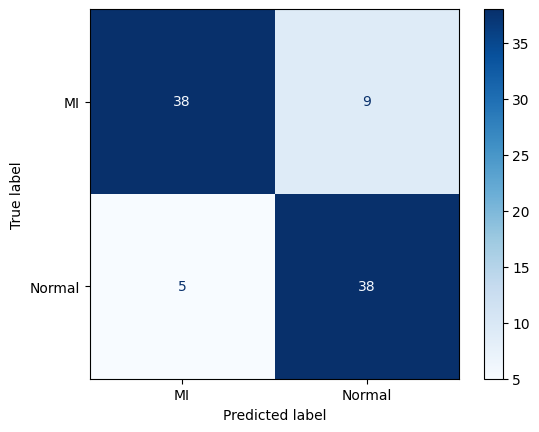

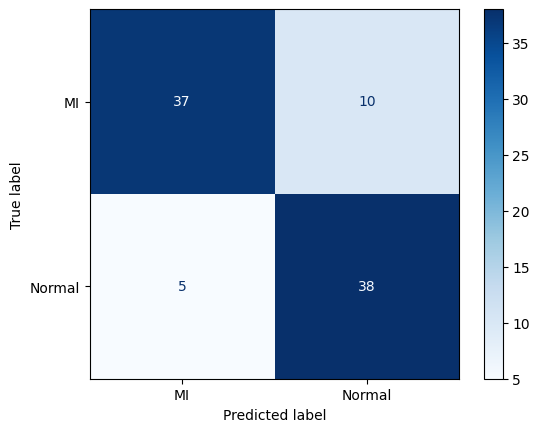

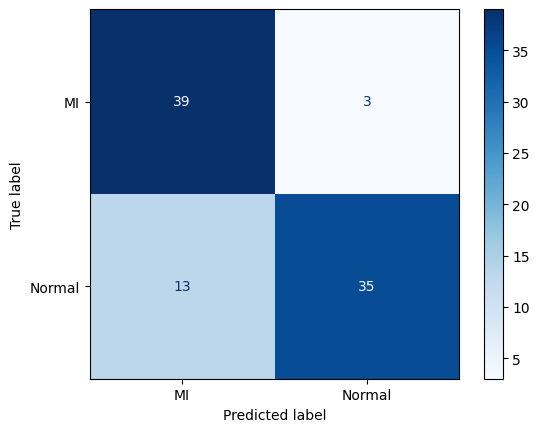

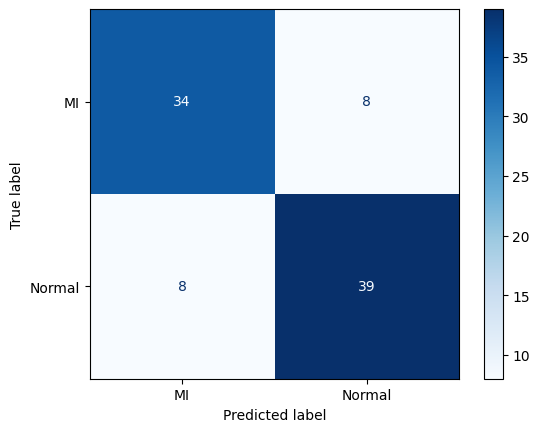

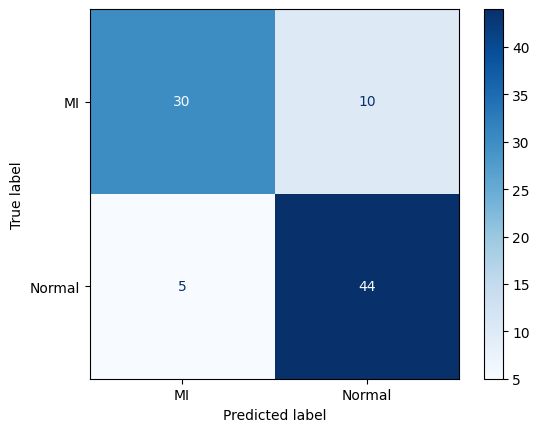

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

# Loop untuk menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, 6):  # Jika Anda menggunakan 5 fold
    # Load model untuk fold ini
    model_filename = f'models_transformer_encoder_decoder/transformer_encoder_decoder_model_fold_{fold_no}.pth'
    model = TransformerEncoderDecoderModel(input_dim, num_classes)  # Inisialisasi model yang sama
    model.load_state_dict(torch.load(model_filename))

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Membuat DataLoader untuk fold ini
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Evaluasi pada data validasi untuk fold ini
    model.eval()
    val_outputs = []
    val_labels = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader_fold:
            outputs = model(X_batch, X_batch)
            _, predicted = torch.max(outputs.data, 1)

            # Simpan prediksi dan label asli
            val_outputs.extend(predicted.tolist())
            val_labels.extend(y_batch.tolist())

    # Menghitung confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs, labels=[0, 1])  # Misalnya label 0 dan 1 untuk 'MI' dan 'Normal'

    # Menampilkan confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['MI', 'Normal'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')


In [ ]:
import shutil
import os

# Direktori tempat model disimpan
source_dir = 'models_transformer_encoder_decoder'
# Direktori unduhan di lokal
download_dir = r'E:\Proyek Riset\download'  # Ganti dengan direktori unduhan Anda

# Membuat direktori unduhan jika belum ada
os.makedirs(download_dir, exist_ok=True)

# Menyalin semua file model ke direktori unduhan
for fold_no in range(1, 6):  # Jika Anda menggunakan 5 fold
    model_filename = f'transformer_encoder_decoder_model_fold_{fold_no}.pth'
    source_path = os.path.join(source_dir, model_filename)
    download_path = os.path.join(download_dir, model_filename)

    # Menyalin file model
    shutil.copy(source_path, download_path)
    print(f'Model {model_filename} telah disalin ke {download_dir}')

print('Semua model telah berhasil diunduh.')


Model transformer_encoder_decoder_model_fold_1.pth telah disalin ke E:\Proyek Riset\download
Model transformer_encoder_decoder_model_fold_2.pth telah disalin ke E:\Proyek Riset\download
Model transformer_encoder_decoder_model_fold_3.pth telah disalin ke E:\Proyek Riset\download
Model transformer_encoder_decoder_model_fold_4.pth telah disalin ke E:\Proyek Riset\download
Model transformer_encoder_decoder_model_fold_5.pth telah disalin ke E:\Proyek Riset\download
Semua model telah berhasil diunduh.


In [ ]:
import zipfile
import os

# Direktori tempat model disimpan
source_dir = 'models_transformer_encoder_decoder'

# Path untuk file ZIP
zip_filename = '/content/models.zip'

# Membuat file ZIP
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for fold_no in range(1, 6):  # Jika Anda menggunakan 5 fold
        model_filename = f'transformer_encoder_decoder_model_fold_{fold_no}.pth'
        source_path = os.path.join(source_dir, model_filename)
        zipf.write(source_path, model_filename)

print('File ZIP telah dibuat.')


File ZIP telah dibuat.


## TabPFN

In [ ]:
!pip install tabpfn

In [ ]:
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay
from tabpfn import TabPFNClassifier

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import time
import os
import pickle
from tabpfn import TabPFNClassifier

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
accuracy_per_fold = []
prediction_time_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tabpfn', exist_ok=True)

for train_index, val_index in kf.split(X_train):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Inisialisasi TabPFNClassifier untuk setiap fold
    classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

    # Melatih model
    start_time = time.time()
    classifier.fit(X_train_fold, y_train_fold)
    prediction_time = time.time() - start_time

    # Evaluasi model pada data validasi fold
    y_eval, p_eval = classifier.predict(X_val_fold, return_winning_probability=True)
    accuracy = accuracy_score(y_val_fold, y_eval)

    print(f'Prediction time for fold {fold_no}: {prediction_time} seconds')
    print(f'Accuracy for fold {fold_no}: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Simpan model
    model_filename = f'models_tabpfn/tabpfn_model_fold_{fold_no}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(classifier, file)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')


Fold 1


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 1: 0.001085042953491211 seconds
Accuracy for fold 1: 90.0%
Model for fold 1 saved as models_tabpfn/tabpfn_model_fold_1.pkl
Fold 2


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 2: 0.0012450218200683594 seconds
Accuracy for fold 2: 93.33333333333333%
Model for fold 2 saved as models_tabpfn/tabpfn_model_fold_2.pkl
Fold 3


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 3: 0.001073598861694336 seconds
Accuracy for fold 3: 92.22222222222223%
Model for fold 3 saved as models_tabpfn/tabpfn_model_fold_3.pkl
Fold 4


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 4: 0.0011324882507324219 seconds
Accuracy for fold 4: 89.8876404494382%
Model for fold 4 saved as models_tabpfn/tabpfn_model_fold_4.pkl
Fold 5


/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 5: 0.001125335693359375 seconds
Accuracy for fold 5: 87.64044943820225%
Model for fold 5 saved as models_tabpfn/tabpfn_model_fold_5.pkl
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Prediction Time: 0.001085042953491211 seconds - Accuracy: 90.0%
------------------------------------------------------------------------
> Fold 2 - Prediction Time: 0.0012450218200683594 seconds - Accuracy: 93.33333333333333%
------------------------------------------------------------------------
> Fold 3 - Prediction Time: 0.001073598861694336 seconds - Accuracy: 92.22222222222223%
------------------------------------------------------------------------
> Fold 4 - Prediction Time: 0.0011324882507324219 seconds - Accuracy: 89.8876404494382%
------------------------------------------------------------------------
> Fold 5 - Prediction Time: 0.0011253356933593

In [ ]:
# Menampilkan akurasi per fold
print('Data Training Accuracy per fold:')
for i in range(len(accuracy_per_fold)):
    print(f'Fold {i+1}: {accuracy_per_fold[i]}%')

Data Training Accuracy per fold:
Fold 1: 90.0%
Fold 2: 93.33333333333333%
Fold 3: 92.22222222222223%
Fold 4: 89.8876404494382%
Fold 5: 87.64044943820225%


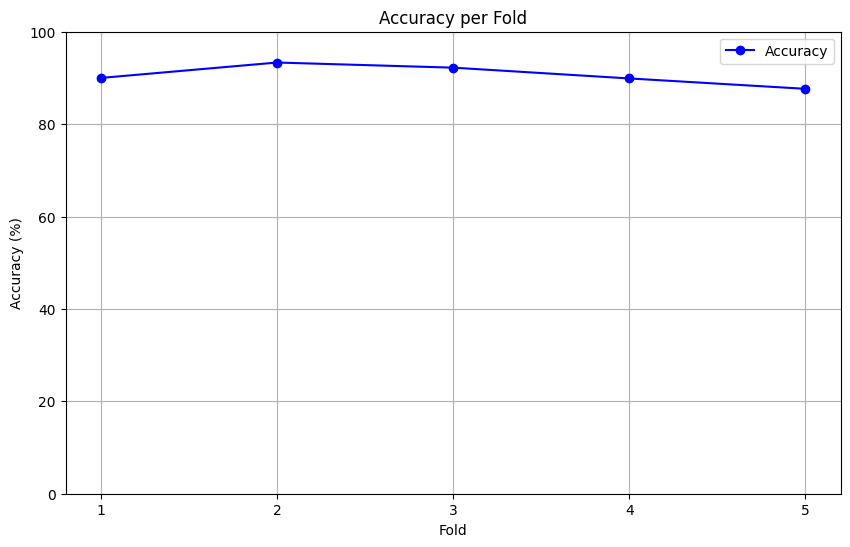

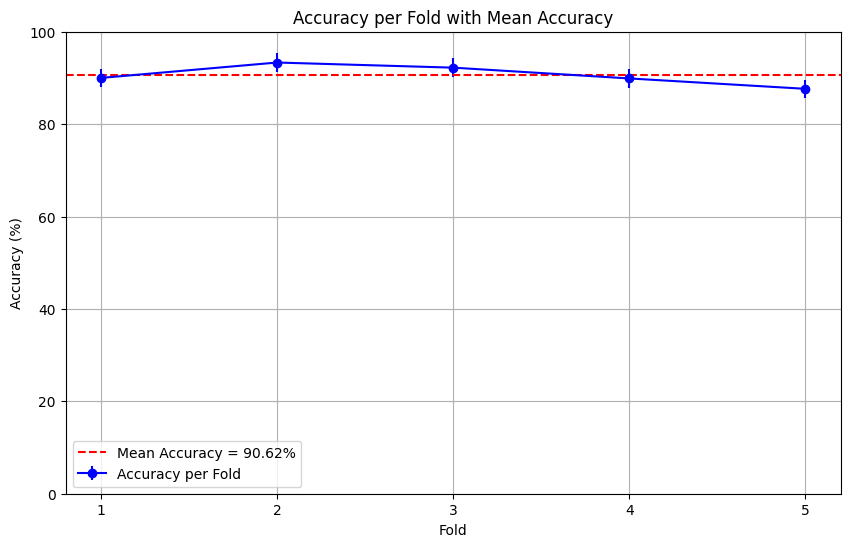

In [ ]:
import matplotlib.pyplot as plt

# Data akurasi per fold dari training sebelumnya (misalnya diambil dari variabel `accuracy_per_fold`)
# Pastikan Anda telah menyimpan akurasi ini dari hasil training sebelumnya
# accuracy_per_fold = [accuracy_fold_1, accuracy_fold_2, ..., accuracy_fold_n]

# Jika Anda sudah memiliki `accuracy_per_fold` dari kode sebelumnya, Anda bisa langsung menggunakannya
n_folds = len(accuracy_per_fold)

# Membuat plot akurasi per fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_folds + 1), accuracy_per_fold, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, n_folds + 1))
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

# Jika Anda ingin menampilkan juga rata-rata akurasi dengan error bar
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)

plt.figure(figsize=(10, 6))
plt.errorbar(range(1, n_folds + 1), accuracy_per_fold, yerr=std_accuracy, fmt='-o', color='b', label='Accuracy per Fold')
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy = {mean_accuracy:.2f}%')
plt.title('Accuracy per Fold with Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, n_folds + 1))
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, classification_report
import shutil

# Asumsikan X_test dan y_test adalah dataset yang digunakan untuk evaluasi
# Anda harus mengganti ini dengan data yang sesuai

# Jumlah fold yang digunakan selama cross-validation
n_folds = 5

# List untuk menyimpan hasil evaluasi
accuracy_per_fold = []
prediction_time_per_fold = []

# Variabel untuk melacak model dengan akurasi terbaik
best_accuracy = 0.0
best_model_filename = None

for fold_no in range(1, n_folds + 1):
    # Membuat path ke model yang disimpan
    model_filename = f'models_tabpfn/tabpfn_model_fold_{fold_no}.pkl'

    # Memuat model
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Evaluasi model pada data uji
    start_time = time.time()
    y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
    prediction_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_eval)
    print(f'Fold {fold_no} - Prediction Time: {prediction_time} seconds - Accuracy: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Cek apakah model saat ini adalah yang terbaik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_filename = model_filename

    # Laporan klasifikasi
    print(f'Classification Report for fold {fold_no}:\n', classification_report(y_test, y_eval, target_names=['MI', 'Normal']))

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')

# Menyimpan model dengan akurasi terbaik
if best_model_filename:
    shutil.copy(best_model_filename, 'model_best.pkl')
    print(f'Model with the best accuracy saved as model_best.pkl with accuracy: {best_accuracy * 100}%')


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 1 - Prediction Time: 0.30645060539245605 seconds - Accuracy: 95.53571428571429%
Classification Report for fold 1:
               precision    recall  f1-score   support

          MI       0.95      0.97      0.96        62
      Normal       0.96      0.94      0.95        50

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112



/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle

Fold 2 - Prediction Time: 0.2984628677368164 seconds - Accuracy: 96.42857142857143%
Classification Report for fold 2:
               precision    recall  f1-score   support

          MI       0.95      0.98      0.97        62
      Normal       0.98      0.94      0.96        50

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle

Fold 3 - Prediction Time: 0.5673003196716309 seconds - Accuracy: 96.42857142857143%
Classification Report for fold 3:
               precision    recall  f1-score   support

          MI       0.95      0.98      0.97        62
      Normal       0.98      0.94      0.96        50

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle

Fold 4 - Prediction Time: 0.32031893730163574 seconds - Accuracy: 94.64285714285714%
Classification Report for fold 4:
               precision    recall  f1-score   support

          MI       0.92      0.98      0.95        62
      Normal       0.98      0.90      0.94        50

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



/usr/local/lib/python3.10/dist-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Fold 5 - Prediction Time: 0.3577749729156494 seconds - Accuracy: 91.07142857142857%
Classification Report for fold 5:
               precision    recall  f1-score   support

          MI       0.92      0.92      0.92        62
      Normal       0.90      0.90      0.90        50

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112

------------------------------------------------------------------------
Score per fold
> Fold 1 - Prediction Time: 0.30645060539245605 seconds - Accuracy: 95.53571428571429%
> Fold 2 - Prediction Time: 0.2984628677368164 seconds - Accuracy: 96.42857142857143%
> Fold 3 - Prediction Time: 0.5673003196716309 seconds - Accuracy: 96.42857142857143%
> Fold 4 - Prediction Time: 0.32031893730163574 seconds - Accuracy: 94.64285714285714%
> Fold 5 - Prediction Time: 0.3577749729156494 seconds - Accuracy: 91.07142857142857%
----------------------------------

In [ ]:
print(y_test)

['Normal' 'Normal' 'MI' 'MI' 'Normal' 'MI' 'MI' 'Normal' 'MI' 'Normal'
 'Normal' 'Normal' 'MI' 'MI' 'MI' 'MI' 'Normal' 'MI' 'MI' 'MI' 'Normal'
 'MI' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'Normal' 'MI' 'Normal' 'Normal'
 'MI' 'MI' 'MI' 'Normal' 'MI' 'Normal' 'Normal' 'MI' 'Normal' 'Normal'
 'MI' 'MI' 'MI' 'Normal' 'Normal' 'Normal' 'MI' 'MI' 'MI' 'MI' 'MI'
 'Normal' 'MI' 'MI' 'MI' 'Normal' 'MI' 'Normal' 'Normal' 'Normal' 'Normal'
 'MI' 'Normal' 'Normal' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'MI' 'MI'
 'MI' 'MI' 'Normal' 'Normal' 'MI' 'MI' 'MI' 'Normal' 'Normal' 'Normal'
 'MI' 'MI' 'Normal' 'MI' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'Normal' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'MI'
 'Normal' 'MI' 'MI' 'MI' 'MI' 'MI' 'Normal' 'MI' 'Normal']


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

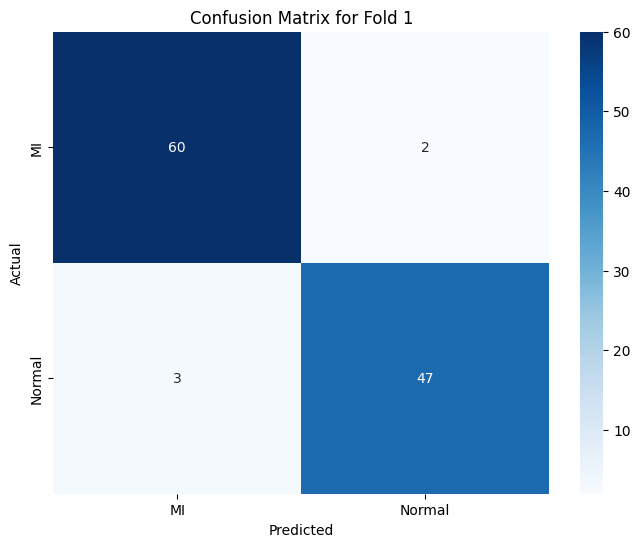

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

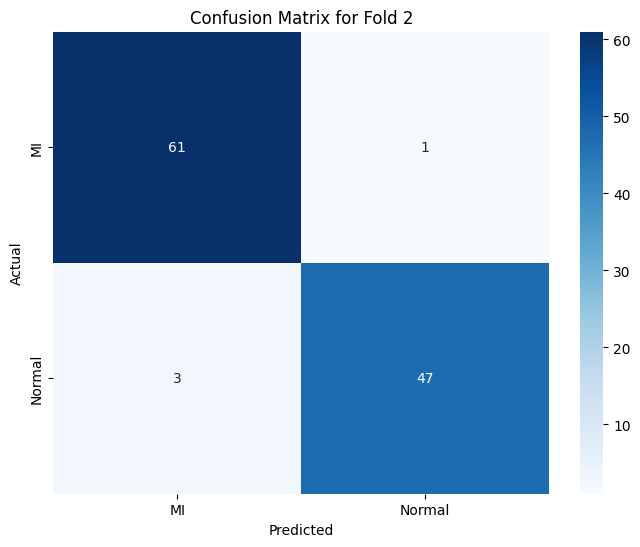

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

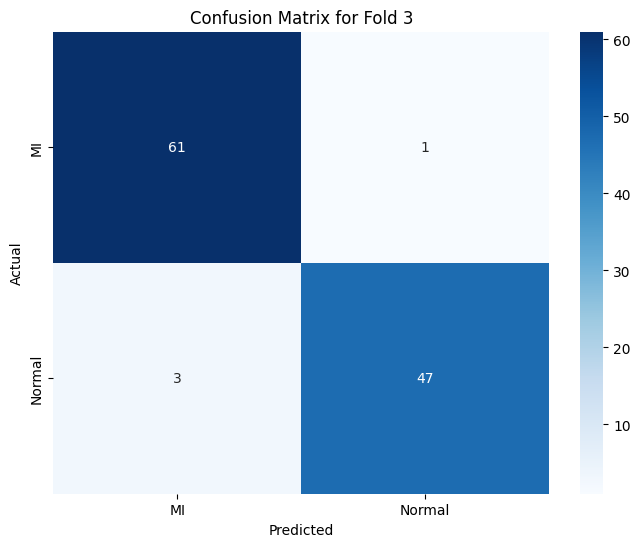

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

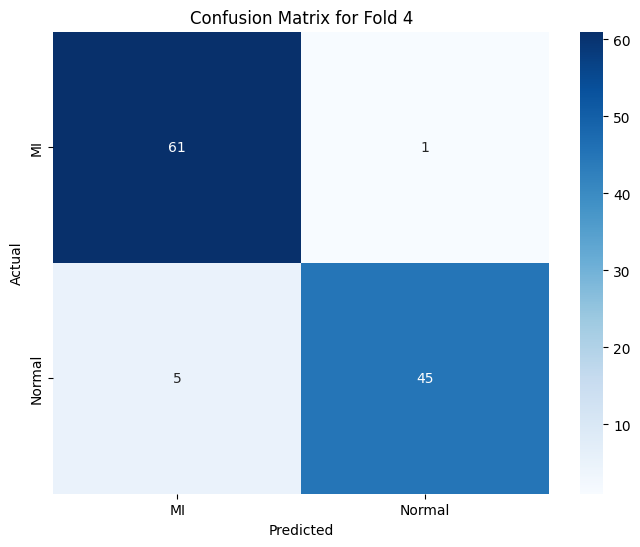

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

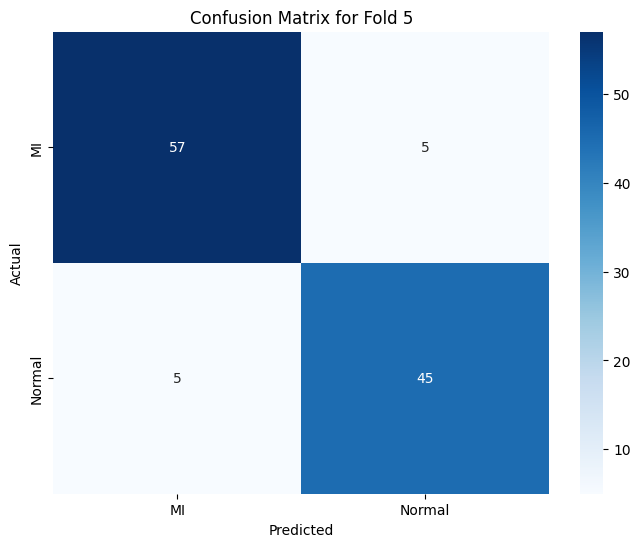

In [ ]:
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan X_test dan y_test adalah dataset yang digunakan untuk evaluasi
# Anda harus mengganti ini dengan data yang sesuai

# Jumlah fold yang digunakan selama cross-validation
n_folds = 5

# Mapping untuk label
label_mapping = {'MI': 0, 'Normal': 1}

# Konversi y_test menjadi integer berdasarkan mapping
y_test = np.array([label_mapping[label] for label in y_test])

# List untuk menyimpan confusion matrix dari setiap fold
confusion_matrices = []

for fold_no in range(1, n_folds + 1):
    # Membuat path ke model yang disimpan
    model_filename = f'models_tabpfn/tabpfn_model_fold_{fold_no}.pkl'

    # Memuat model
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Prediksi pada data uji
    y_eval, _ = classifier.predict(X_test, return_winning_probability=True)

    # Konversi y_eval menjadi integer berdasarkan mapping
    y_eval = np.array([label_mapping[label] for label in y_eval])

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_eval, labels=[0, 1])
    confusion_matrices.append(cm)

    # Menampilkan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


## TabNet

In [ ]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
df_combine_scaled
X = df_combine_scaled.drop('Label', axis=1).values
y = df_combine_scaled['Label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Menampilkan jumlah data dalam setiap set
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 448
Jumlah data uji: 112


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import time
import os
import pickle
import torch

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
accuracy_per_fold = []
prediction_time_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tabnet', exist_ok=True)

for train_index, val_index in kf.split(X_train):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # define the model
    classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                                  scheduler_params={"step_size": 10, "gamma": 0.9},
                                  scheduler_fn=torch.optim.lr_scheduler.StepLR)

    # fit the model
    classifier.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['auc', 'balanced_accuracy'],
        max_epochs=200, patience=60,
        batch_size=512, virtual_batch_size=512,
        num_workers=0,
        weights=1,
        drop_last=False
    )

    # Evaluasi model pada data validasi fold
    start_time = time.time()
    y_eval = classifier.predict(X_val_fold)
    prediction_time = time.time() - start_time

    accuracy = accuracy_score(y_val_fold, y_eval)

    print(f'Prediction time for fold {fold_no}: {prediction_time} seconds')
    print(f'Accuracy for fold {fold_no}: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Simpan model
    model_filename = f'models_tabnet/tabnet_model_fold_{fold_no}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(classifier, file)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')


Fold 1


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.91745 | train_auc: 0.61682 | train_balanced_accuracy: 0.57498 | valid_auc: 0.59921 | valid_balanced_accuracy: 0.57496 |  0:00:00s
epoch 1  | loss: 0.86781 | train_auc: 0.62901 | train_balanced_accuracy: 0.57723 | valid_auc: 0.5522  | valid_balanced_accuracy: 0.52944 |  0:00:00s
epoch 2  | loss: 0.72006 | train_auc: 0.565   | train_balanced_accuracy: 0.54531 | valid_auc: 0.5527  | valid_balanced_accuracy: 0.571   |  0:00:00s
epoch 3  | loss: 0.79116 | train_auc: 0.53979 | train_balanced_accuracy: 0.49694 | valid_auc: 0.51856 | valid_balanced_accuracy: 0.52647 |  0:00:00s
epoch 4  | loss: 0.7217  | train_auc: 0.53592 | train_balanced_accuracy: 0.49376 | valid_auc: 0.4948  | valid_balanced_accuracy: 0.52548 |  0:00:00s
epoch 5  | loss: 0.68186 | train_auc: 0.53642 | train_balanced_accuracy: 0.50638 | valid_auc: 0.52004 | valid_balanced_accuracy: 0.54008 |  0:00:00s
epoch 6  | loss: 0.64479 | train_auc: 0.53523 | train_balanced_accuracy: 0.52342 | valid_auc: 0.48095 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Model for fold 1 saved as models_tabnet/tabnet_model_fold_1.pkl
Fold 2
epoch 0  | loss: 0.83593 | train_auc: 0.65341 | train_balanced_accuracy: 0.60689 | valid_auc: 0.54033 | valid_balanced_accuracy: 0.47229 |  0:00:00s
epoch 1  | loss: 0.76699 | train_auc: 0.60378 | train_balanced_accuracy: 0.59419 | valid_auc: 0.53191 | valid_balanced_accuracy: 0.48689 |  0:00:00s
epoch 2  | loss: 0.79892 | train_auc: 0.58702 | train_balanced_accuracy: 0.58342 | valid_auc: 0.571   | valid_balanced_accuracy: 0.53043 |  0:00:00s
epoch 3  | loss: 0.80199 | train_auc: 0.58367 | train_balanced_accuracy: 0.5683  | valid_auc: 0.5329  | valid_balanced_accuracy: 0.54503 |  0:00:00s
epoch 4  | loss: 0.72638 | train_auc: 0.61482 | train_balanced_accuracy: 0.57907 | valid_auc: 0.51311 | valid_balanced_accuracy: 0.5188  |  0:00:00s
epoch 5  | loss: 0.75717 | train_auc: 0.61241 | train_balanced_accuracy: 0.57957 | valid_auc: 0.50619 | valid_balanced_accuracy: 0.51682 |  0:00:00s
epoch 6  | loss: 0.71544 | train_au

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Model for fold 2 saved as models_tabnet/tabnet_model_fold_2.pkl
Fold 3
epoch 0  | loss: 0.91868 | train_auc: 0.58432 | train_balanced_accuracy: 0.55604 | valid_auc: 0.72421 | valid_balanced_accuracy: 0.64286 |  0:00:00s
epoch 1  | loss: 0.75281 | train_auc: 0.57121 | train_balanced_accuracy: 0.56628 | valid_auc: 0.63194 | valid_balanced_accuracy: 0.59524 |  0:00:00s
epoch 2  | loss: 0.77495 | train_auc: 0.55429 | train_balanced_accuracy: 0.55416 | valid_auc: 0.65079 | valid_balanced_accuracy: 0.59226 |  0:00:00s
epoch 3  | loss: 0.77247 | train_auc: 0.57808 | train_balanced_accuracy: 0.58863 | valid_auc: 0.67212 | valid_balanced_accuracy: 0.60714 |  0:00:00s
epoch 4  | loss: 0.76523 | train_auc: 0.58167 | train_balanced_accuracy: 0.56693 | valid_auc: 0.67708 | valid_balanced_accuracy: 0.63542 |  0:00:00s
epoch 5  | loss: 0.73021 | train_auc: 0.60471 | train_balanced_accuracy: 0.55679 | valid_auc: 0.66171 | valid_balanced_accuracy: 0.58482 |  0:00:00s
epoch 6  | loss: 0.65868 | train_au

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Model for fold 3 saved as models_tabnet/tabnet_model_fold_3.pkl
Fold 4
epoch 0  | loss: 0.87135 | train_auc: 0.59923 | train_balanced_accuracy: 0.56823 | valid_auc: 0.61803 | valid_balanced_accuracy: 0.59372 |  0:00:00s
epoch 1  | loss: 0.76523 | train_auc: 0.57011 | train_balanced_accuracy: 0.5362  | valid_auc: 0.58815 | valid_balanced_accuracy: 0.59498 |  0:00:00s
epoch 2  | loss: 0.7069  | train_auc: 0.52605 | train_balanced_accuracy: 0.53675 | valid_auc: 0.55268 | valid_balanced_accuracy: 0.55243 |  0:00:00s
epoch 3  | loss: 0.73951 | train_auc: 0.47224 | train_balanced_accuracy: 0.47785 | valid_auc: 0.48582 | valid_balanced_accuracy: 0.50355 |  0:00:00s
epoch 4  | loss: 0.72174 | train_auc: 0.4687  | train_balanced_accuracy: 0.4855  | valid_auc: 0.42249 | valid_balanced_accuracy: 0.44782 |  0:00:00s
epoch 5  | loss: 0.72801 | train_auc: 0.45079 | train_balanced_accuracy: 0.48539 | valid_auc: 0.44276 | valid_balanced_accuracy: 0.45973 |  0:00:00s
epoch 6  | loss: 0.68812 | train_au

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 1  | loss: 0.93006 | train_auc: 0.56229 | train_balanced_accuracy: 0.54234 | valid_auc: 0.5949  | valid_balanced_accuracy: 0.59617 |  0:00:00s
epoch 2  | loss: 0.89069 | train_auc: 0.5617  | train_balanced_accuracy: 0.53723 | valid_auc: 0.63469 | valid_balanced_accuracy: 0.60077 |  0:00:00s
epoch 3  | loss: 0.78293 | train_auc: 0.55202 | train_balanced_accuracy: 0.50703 | valid_auc: 0.67194 | valid_balanced_accuracy: 0.60306 |  0:00:00s
epoch 4  | loss: 0.76295 | train_auc: 0.55885 | train_balanced_accuracy: 0.51827 | valid_auc: 0.6148  | valid_balanced_accuracy: 0.52934 |  0:00:00s
epoch 5  | loss: 0.68316 | train_auc: 0.57725 | train_balanced_accuracy: 0.51564 | valid_auc: 0.58673 | valid_balanced_accuracy: 0.51913 |  0:00:00s
epoch 6  | loss: 0.68126 | train_auc: 0.57549 | train_balanced_accuracy: 0.52669 | valid_auc: 0.53367 | valid_balanced_accuracy: 0.48622 |  0:00:00s
epoch 7  | loss: 0.67708 | train_auc: 0.5676  | train_balanced_accuracy: 0.52089 | valid_auc: 0.51276 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


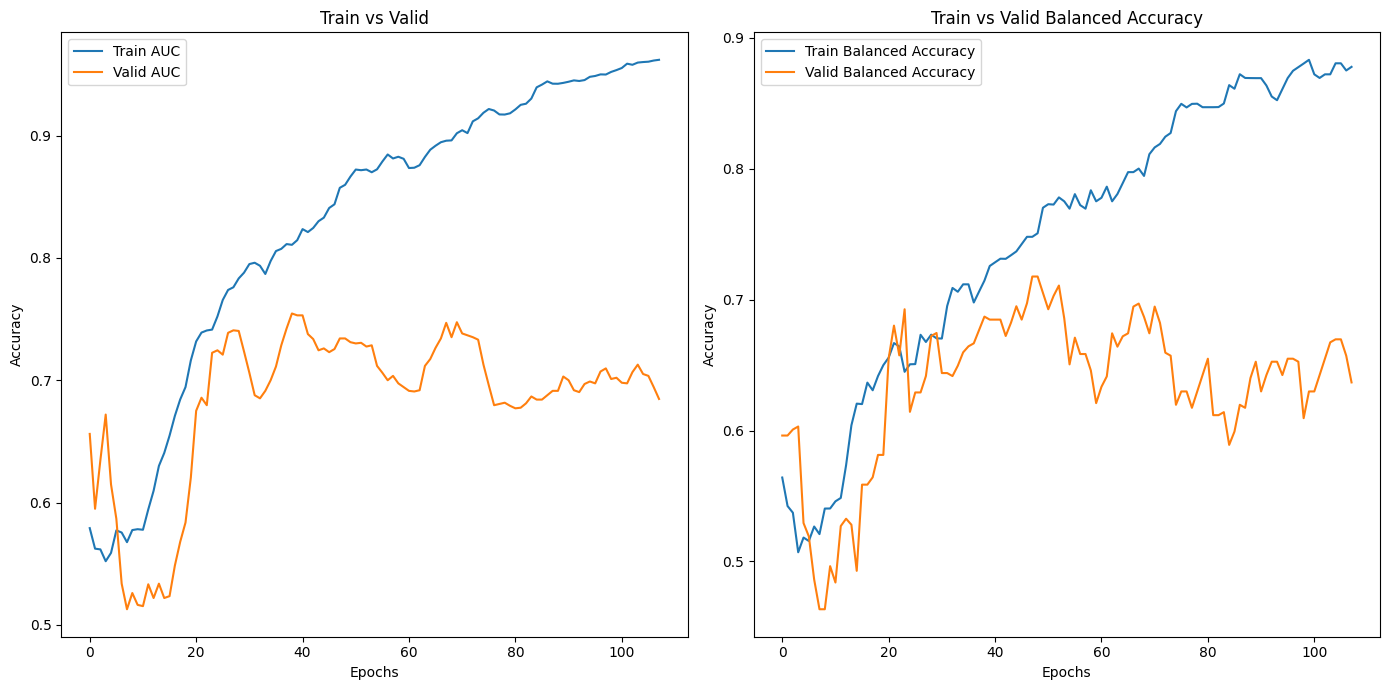

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan riwayat pelatihan dari classifier
history = classifier.history

# Menyiapkan data untuk plot
epochs = list(range(len(history['loss'])))
train_auc = history['train_auc']
valid_auc = history['valid_auc']
train_balanced_accuracy = history['train_balanced_accuracy']
valid_balanced_accuracy = history['valid_balanced_accuracy']

# Membuat plot untuk AUC
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_auc, label='Train AUC')
plt.plot(epochs, valid_auc, label='Valid AUC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Valid')
plt.legend()

# Membuat plot untuk Balanced Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_balanced_accuracy, label='Train Balanced Accuracy')
plt.plot(epochs, valid_balanced_accuracy, label='Valid Balanced Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Valid Balanced Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Berikut adalah penjelasan singkat tentang metrik yang muncul:

# loss: Menunjukkan seberapa baik model melakukan prediksi. Semakin kecil nilai loss, semakin baik.
# train_auc: Area Under the Curve (AUC) untuk set pelatihan, mengukur kemampuan model dalam membedakan antara kelas positif dan negatif.
# train_balanced_accuracy: Akurasi seimbang pada set pelatihan, yang mempertimbangkan distribusi kelas yang tidak seimbang.
# test_auc: AUC pada set pengujian.
# test_balanced_accuracy: Akurasi seimbang pada set pengujian.


In [ ]:
print(y_test)

['Normal' 'Normal' 'MI' 'MI' 'Normal' 'MI' 'MI' 'Normal' 'MI' 'Normal'
 'Normal' 'Normal' 'MI' 'MI' 'MI' 'MI' 'Normal' 'MI' 'MI' 'MI' 'Normal'
 'MI' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'Normal' 'MI' 'Normal' 'Normal'
 'MI' 'MI' 'MI' 'Normal' 'MI' 'Normal' 'Normal' 'MI' 'Normal' 'Normal'
 'MI' 'MI' 'MI' 'Normal' 'Normal' 'Normal' 'MI' 'MI' 'MI' 'MI' 'MI'
 'Normal' 'MI' 'MI' 'MI' 'Normal' 'MI' 'Normal' 'Normal' 'Normal' 'Normal'
 'MI' 'Normal' 'Normal' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'MI' 'MI'
 'MI' 'MI' 'Normal' 'Normal' 'MI' 'MI' 'MI' 'Normal' 'Normal' 'Normal'
 'MI' 'MI' 'Normal' 'MI' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'Normal' 'Normal' 'Normal' 'MI' 'Normal' 'MI' 'MI'
 'Normal' 'MI' 'MI' 'MI' 'MI' 'MI' 'Normal' 'MI' 'Normal']


In [ ]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, classification_report
import shutil

# Jumlah fold yang digunakan selama cross-validation
n_folds = 5

# List untuk menyimpan hasil evaluasi
accuracy_per_fold = []
prediction_time_per_fold = []

# Variabel untuk melacak model dengan akurasi terbaik
best_accuracy = 0.0
best_model_filename = None

for fold_no in range(1, n_folds + 1):
    # Membuat path ke model yang disimpan
    model_filename = f'models_tabnet/tabnet_model_fold_{fold_no}.pkl'

    # Memuat model
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Evaluasi model pada data uji
    start_time = time.time()
    y_eval = classifier.predict(X_test)
    prediction_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_eval)
    print(f'Fold {fold_no} - Prediction Time: {prediction_time} seconds - Accuracy: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Cek apakah model saat ini adalah yang terbaik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_filename = model_filename

    # Laporan klasifikasi
    print(f'Classification Report for fold {fold_no}:\n', classification_report(y_test, y_eval, target_names=['MI', 'Normal']))

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')

# Menyimpan model dengan akurasi terbaik
if best_model_filename:
    shutil.copy(best_model_filename, 'model_best.pkl')
    print(f'Model with the best accuracy saved as model_best.pkl with accuracy: {best_accuracy * 100}%')


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 1 - Prediction Time: 0.01014256477355957 seconds - Accuracy: 74.10714285714286%
Classification Report for fold 1:
               precision    recall  f1-score   support

          MI       0.76      0.77      0.77        62
      Normal       0.71      0.70      0.71        50

    accuracy                           0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.74      0.74      0.74       112

Fold 2 - Prediction Time: 0.009782791137695312 seconds - Accuracy: 79.46428571428571%
Classification Report for fold 2:
               precision    recall  f1-score   support

          MI       0.90      0.71      0.79        62
      Normal       0.71      0.90      0.80        50

    accuracy                           0.79       112
   macro avg       0.81      0.80      0.79       112
weighted avg       0.82      0.79      0.79       112

Fold 3 - Prediction Time: 0.009138107299804688 seconds - Accuracy: 83.92857142857143%
Classification Repo

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


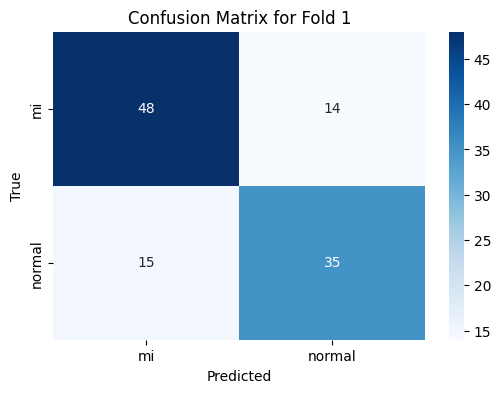

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


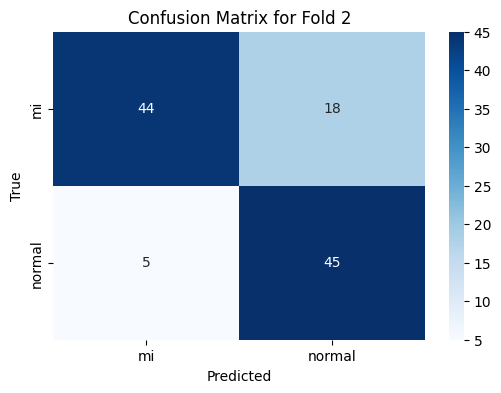

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


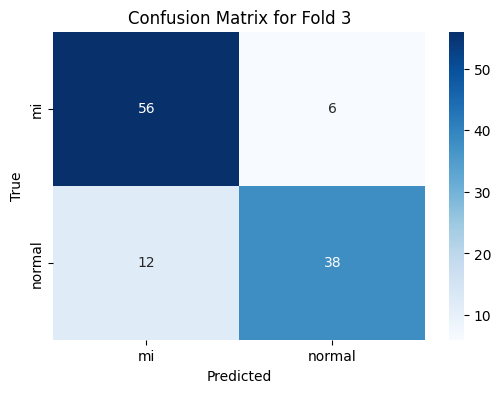

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


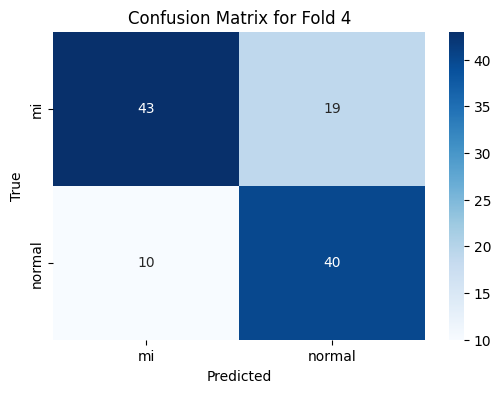

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


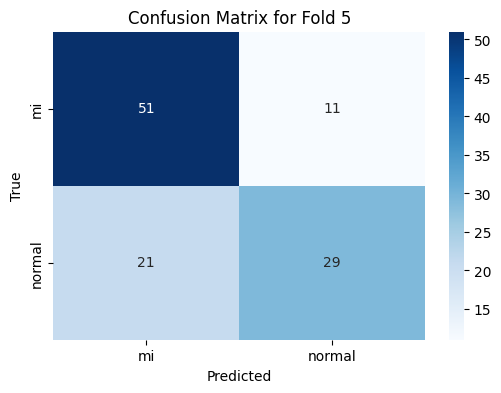

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

def plot_confusion_matrix(y_true, y_pred, fold_no):
    # Menghitung Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Label yang ingin digunakan
    labels = ['mi', 'normal']

    # Membuat visualisasi Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    # Menambahkan judul dan label
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Menampilkan Confusion Matrix
    plt.show()

# Mengganti 'models_tabnet/tabnet_model_fold_{fold_no}.pkl' dengan nomor fold yang sesuai
for fold_no in range(1, 6):
    # Memuat model yang telah disimpan
    model_filename = f'models_tabnet/tabnet_model_fold_{fold_no}.pkl'
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Melakukan prediksi pada data test
    y_test_pred = classifier.predict(X_test)

    # Tampilkan Confusion Matrix untuk fold ini
    plot_confusion_matrix(y_test, y_test_pred, fold_no)


## Transformer Encoder Tuning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import itertools

# Hyperparameter yang ingin dicoba
param_grid = {
    'batch_size': [8, 16, 32, 64],
    'num_epochs': [10, 20, 50, 100]
}

# Semua kombinasi hyperparameter
param_combinations = list(itertools.product(param_grid['batch_size'], param_grid['num_epochs']))

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk training model
def train_and_evaluate_model(batch_size, num_epochs):
    fold_no = 1
    val_accuracy_per_fold = []

    for train_index, val_index in kf.split(X_train_tensor):
        print(f'Fold {fold_no}')

        # Membagi data
        X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
        y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

        # Membuat TensorDataset untuk train dan validation fold
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Inisialisasi model dan optimizer
        model = TransformerModel(input_dim, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)  # Tetap gunakan lr yang sama

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            for X_batch, y_batch in train_loader_fold:
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluasi pada data validasi
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_accuracy = 100 * correct_val / total_val
        val_accuracy_per_fold.append(val_accuracy)
        fold_no += 1

    # Rata-rata akurasi validasi
    avg_val_accuracy = sum(val_accuracy_per_fold) / len(val_accuracy_per_fold)
    return avg_val_accuracy

# Melakukan Grid Search
best_accuracy = 0
best_params = None

for (batch_size, num_epochs) in param_combinations:
    print(f'Trying hyperparameters: batch_size={batch_size}, num_epochs={num_epochs}')
    val_accuracy = train_and_evaluate_model(batch_size, num_epochs)
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = (batch_size, num_epochs)

print('Best Hyperparameters:')
print(f'Batch Size: {best_params[0]}, Epochs: {best_params[1]}')
print(f'Best Validation Accuracy: {best_accuracy:.2f}%')


Trying hyperparameters: batch_size=8, num_epochs=10
Fold 1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 86.39%
Trying hyperparameters: batch_size=8, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.06%
Trying hyperparameters: batch_size=8, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 86.84%
Trying hyperparameters: batch_size=8, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.94%
Trying hyperparameters: batch_size=16, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.50%
Trying hyperparameters: batch_size=16, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.50%
Trying hyperparameters: batch_size=16, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 88.16%
Trying hyperparameters: batch_size=16, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 90.83%
Trying hyperparameters: batch_size=32, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.26%
Trying hyperparam

Fold 1
Epoch 1/100, Loss: 0.6732, Accuracy: 61.17%, Validation Loss: 0.4967, Validation Accuracy: 82.22%
Epoch 2/100, Loss: 0.4906, Accuracy: 73.18%, Validation Loss: 0.5152, Validation Accuracy: 75.56%
Epoch 3/100, Loss: 0.4785, Accuracy: 77.65%, Validation Loss: 0.4669, Validation Accuracy: 80.00%
Epoch 4/100, Loss: 0.3811, Accuracy: 81.56%, Validation Loss: 0.4798, Validation Accuracy: 74.44%
Epoch 5/100, Loss: 0.3649, Accuracy: 85.47%, Validation Loss: 0.4518, Validation Accuracy: 76.67%
Epoch 6/100, Loss: 0.3118, Accuracy: 87.71%, Validation Loss: 0.5672, Validation Accuracy: 74.44%
Epoch 7/100, Loss: 0.3236, Accuracy: 85.47%, Validation Loss: 0.4500, Validation Accuracy: 81.11%
Epoch 8/100, Loss: 0.2552, Accuracy: 88.27%, Validation Loss: 0.4506, Validation Accuracy: 81.11%
Epoch 9/100, Loss: 0.2133, Accuracy: 91.90%, Validation Loss: 0.4231, Validation Accuracy: 83.33%
Epoch 10/100, Loss: 0.2188, Accuracy: 91.90%, Validation Loss: 0.4155, Validation Accuracy: 84.44%
Epoch 11/100

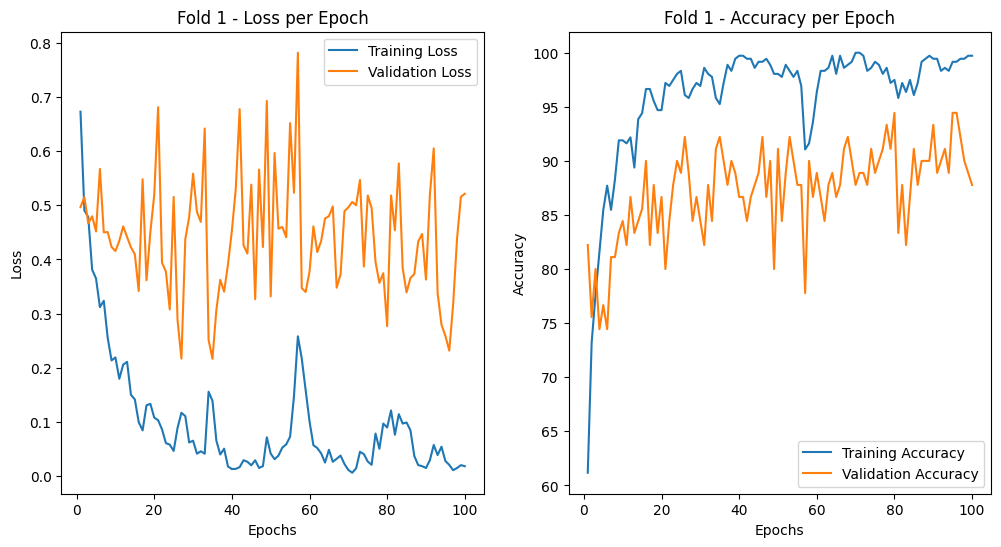

Fold 2
Epoch 1/100, Loss: 0.6594, Accuracy: 65.08%, Validation Loss: 0.5920, Validation Accuracy: 65.56%
Epoch 2/100, Loss: 0.5140, Accuracy: 74.30%, Validation Loss: 0.4894, Validation Accuracy: 76.67%
Epoch 3/100, Loss: 0.4421, Accuracy: 79.89%, Validation Loss: 0.4409, Validation Accuracy: 81.11%
Epoch 4/100, Loss: 0.3697, Accuracy: 84.92%, Validation Loss: 0.3873, Validation Accuracy: 78.89%
Epoch 5/100, Loss: 0.3065, Accuracy: 87.99%, Validation Loss: 0.2901, Validation Accuracy: 88.89%
Epoch 6/100, Loss: 0.2729, Accuracy: 87.43%, Validation Loss: 0.2879, Validation Accuracy: 87.78%
Epoch 7/100, Loss: 0.2479, Accuracy: 88.83%, Validation Loss: 0.3235, Validation Accuracy: 87.78%
Epoch 8/100, Loss: 0.2074, Accuracy: 89.66%, Validation Loss: 0.2672, Validation Accuracy: 90.00%
Epoch 9/100, Loss: 0.1854, Accuracy: 90.78%, Validation Loss: 0.2921, Validation Accuracy: 90.00%
Epoch 10/100, Loss: 0.1588, Accuracy: 93.58%, Validation Loss: 0.2431, Validation Accuracy: 91.11%
Epoch 11/100

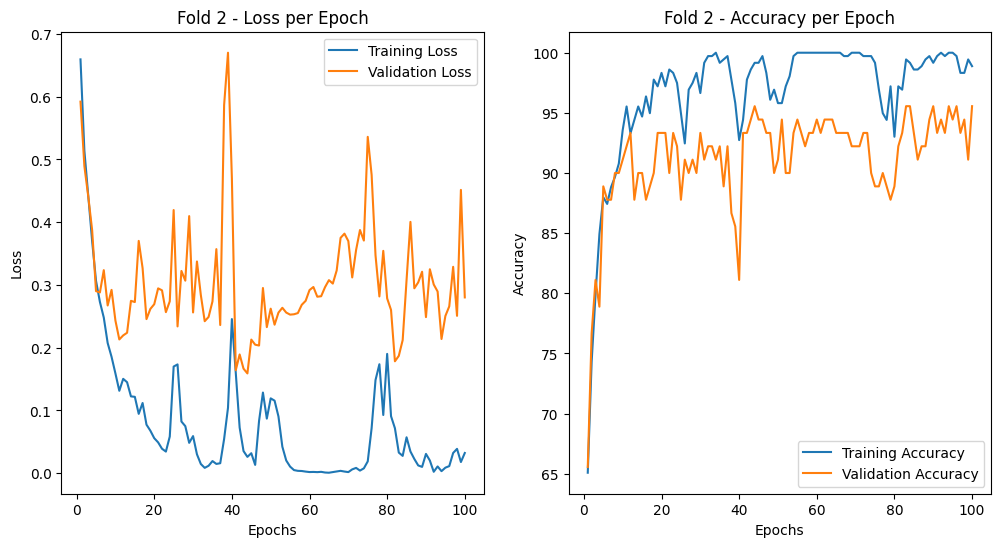

Fold 3
Epoch 1/100, Loss: 0.6141, Accuracy: 63.97%, Validation Loss: 0.7019, Validation Accuracy: 64.44%
Epoch 2/100, Loss: 0.5131, Accuracy: 74.86%, Validation Loss: 0.4833, Validation Accuracy: 75.56%
Epoch 3/100, Loss: 0.4537, Accuracy: 76.82%, Validation Loss: 0.5326, Validation Accuracy: 76.67%
Epoch 4/100, Loss: 0.3842, Accuracy: 82.96%, Validation Loss: 0.4411, Validation Accuracy: 78.89%
Epoch 5/100, Loss: 0.3309, Accuracy: 84.92%, Validation Loss: 0.4217, Validation Accuracy: 82.22%
Epoch 6/100, Loss: 0.2469, Accuracy: 90.50%, Validation Loss: 0.4103, Validation Accuracy: 84.44%
Epoch 7/100, Loss: 0.2405, Accuracy: 89.66%, Validation Loss: 0.3890, Validation Accuracy: 85.56%
Epoch 8/100, Loss: 0.2171, Accuracy: 92.74%, Validation Loss: 0.4365, Validation Accuracy: 84.44%
Epoch 9/100, Loss: 0.2547, Accuracy: 91.06%, Validation Loss: 0.3863, Validation Accuracy: 85.56%
Epoch 10/100, Loss: 0.2674, Accuracy: 92.74%, Validation Loss: 0.3466, Validation Accuracy: 85.56%
Epoch 11/100

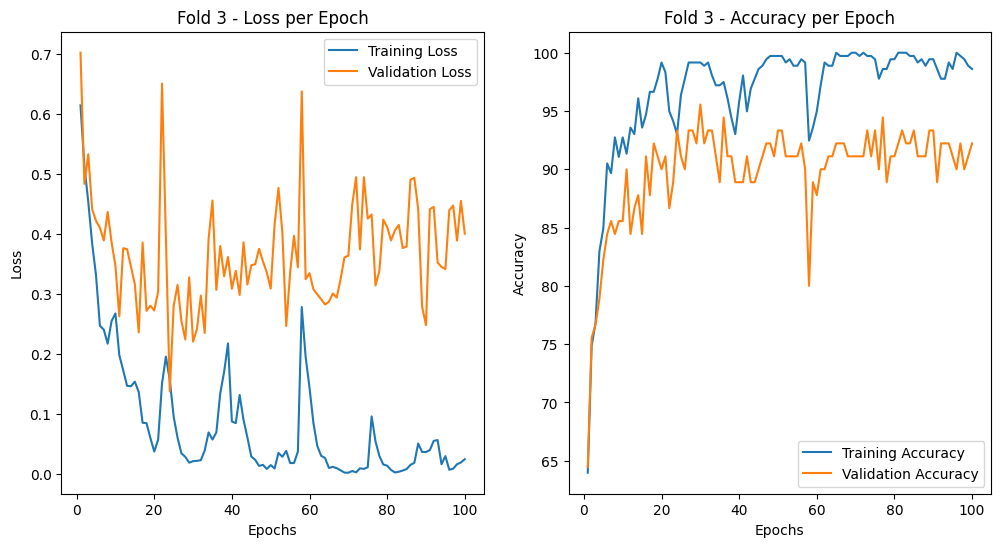

Fold 4
Epoch 1/100, Loss: 0.6687, Accuracy: 63.79%, Validation Loss: 0.5799, Validation Accuracy: 70.79%
Epoch 2/100, Loss: 0.5309, Accuracy: 74.93%, Validation Loss: 0.5190, Validation Accuracy: 66.29%
Epoch 3/100, Loss: 0.4702, Accuracy: 78.55%, Validation Loss: 0.5191, Validation Accuracy: 70.79%
Epoch 4/100, Loss: 0.4094, Accuracy: 81.34%, Validation Loss: 0.4546, Validation Accuracy: 80.90%
Epoch 5/100, Loss: 0.3515, Accuracy: 83.84%, Validation Loss: 0.4423, Validation Accuracy: 77.53%
Epoch 6/100, Loss: 0.3156, Accuracy: 86.91%, Validation Loss: 0.4779, Validation Accuracy: 82.02%
Epoch 7/100, Loss: 0.2537, Accuracy: 88.86%, Validation Loss: 0.5935, Validation Accuracy: 77.53%
Epoch 8/100, Loss: 0.3024, Accuracy: 89.97%, Validation Loss: 0.4229, Validation Accuracy: 84.27%
Epoch 9/100, Loss: 0.2408, Accuracy: 90.81%, Validation Loss: 0.4728, Validation Accuracy: 80.90%
Epoch 10/100, Loss: 0.2456, Accuracy: 88.30%, Validation Loss: 0.4210, Validation Accuracy: 78.65%
Epoch 11/100

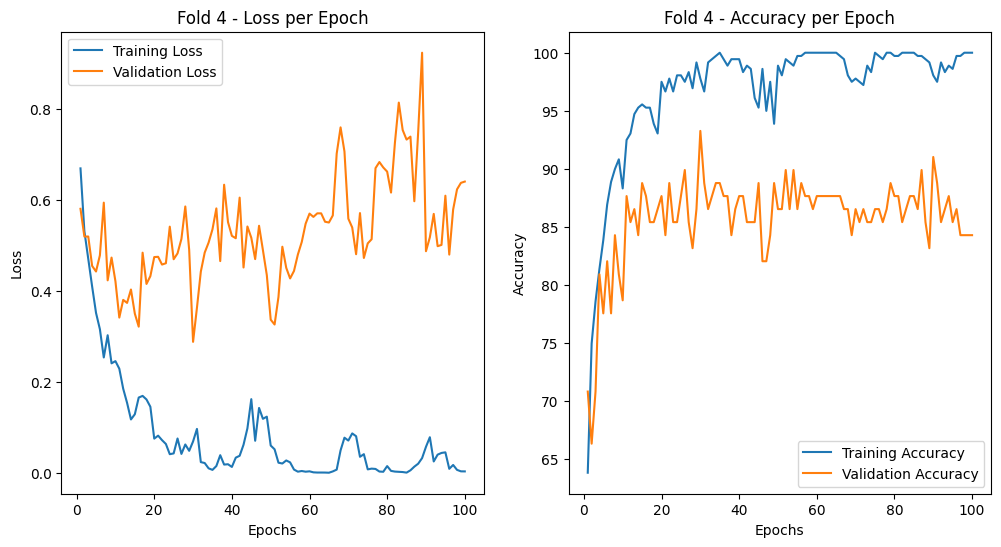

Fold 5
Epoch 1/100, Loss: 0.6328, Accuracy: 64.07%, Validation Loss: 0.5197, Validation Accuracy: 75.28%
Epoch 2/100, Loss: 0.4550, Accuracy: 76.32%, Validation Loss: 0.4596, Validation Accuracy: 74.16%
Epoch 3/100, Loss: 0.3939, Accuracy: 79.94%, Validation Loss: 0.4526, Validation Accuracy: 78.65%
Epoch 4/100, Loss: 0.3418, Accuracy: 86.07%, Validation Loss: 0.4308, Validation Accuracy: 77.53%
Epoch 5/100, Loss: 0.2713, Accuracy: 88.02%, Validation Loss: 0.3860, Validation Accuracy: 83.15%
Epoch 6/100, Loss: 0.2137, Accuracy: 92.20%, Validation Loss: 0.4837, Validation Accuracy: 79.78%
Epoch 7/100, Loss: 0.2173, Accuracy: 90.25%, Validation Loss: 0.4844, Validation Accuracy: 82.02%
Epoch 8/100, Loss: 0.1655, Accuracy: 93.59%, Validation Loss: 0.3350, Validation Accuracy: 84.27%
Epoch 9/100, Loss: 0.1450, Accuracy: 93.31%, Validation Loss: 0.5581, Validation Accuracy: 83.15%
Epoch 10/100, Loss: 0.2165, Accuracy: 93.87%, Validation Loss: 0.3263, Validation Accuracy: 86.52%
Epoch 11/100

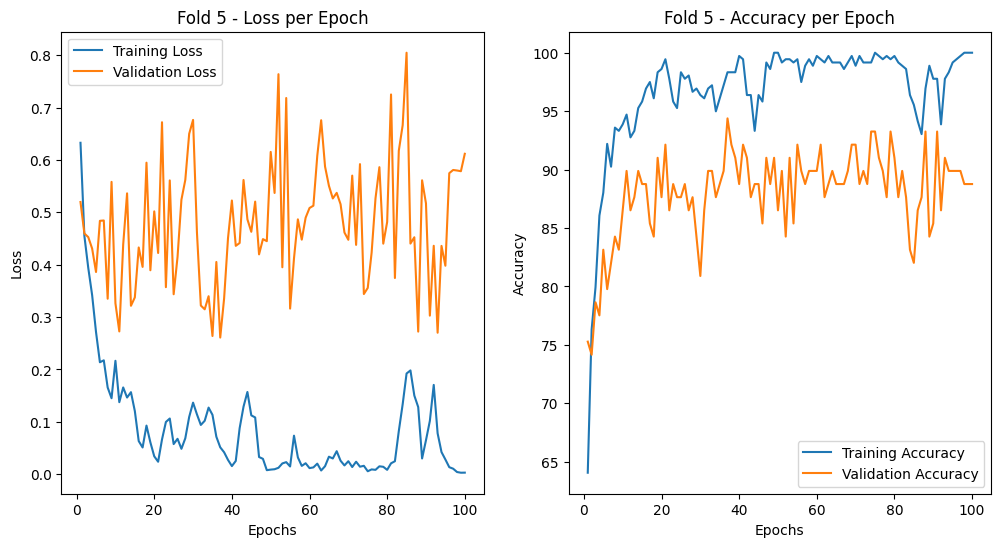

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.0178 - Train Accuracy: 99.72%
           - Validation Loss: 0.5213 - Validation Accuracy: 87.78%
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.0321 - Train Accuracy: 98.88%
           - Validation Loss: 0.2801 - Validation Accuracy: 95.56%
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.0246 - Train Accuracy: 98.60%
           - Validation Loss: 0.4002 - Validation Accuracy: 92.22%
------------------------------------------------------------------------
> Fold 4 - Train Loss: 0.0036 - Train Accuracy: 100.00%
           - Validation Loss: 0.6397 - Validation Accuracy: 84.27%
------------------------------------------------------------------------
> Fold 5 - Train Loss: 0.0029 - Train Accuracy: 100.00%
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tuning_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss dan akurasi per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop untuk fold ini
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = 100 * correct_train / total_train

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_loss /= len(val_loader_fold)
        val_accuracy = 100 * correct_val / total_val

        # Simpan loss dan akurasi per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)

    # Simpan model
    model_filename = f'models_tuning_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss dan akurasi
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.4f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f}%')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:-.4f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.4f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.4f}')
print('------------------------------------------------------------------------')


In [ ]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_tuning_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.91      0.85      0.88        47
      Normal       0.85      0.91      0.88        43

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.92      1.00      0.96        47
      Normal       1.00      0.91      0.95        43

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.96        90
weighted avg       0.96      0.96      0.96        90

--------------------------------------------------------------------------------
Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.86      1

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first

Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.80      0.88      0.84        42
      Normal       0.88      0.81      0.84        47

    accuracy                           0.84        89
   macro avg       0.84      0.84      0.84        89
weighted avg       0.85      0.84      0.84        89

--------------------------------------------------------------------------------
Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.94      0.80      0.86        40
      Normal       0.85      0.96      0.90        49

    accuracy                           0.89        89
   macro avg       0.90      0.88      0.88        89
weighted avg       0.89      0.89      0.89        89

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


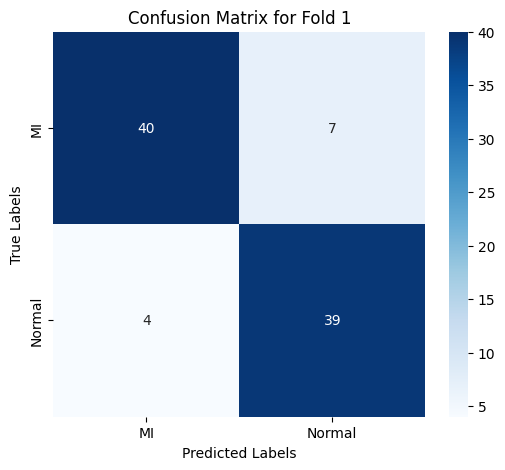

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


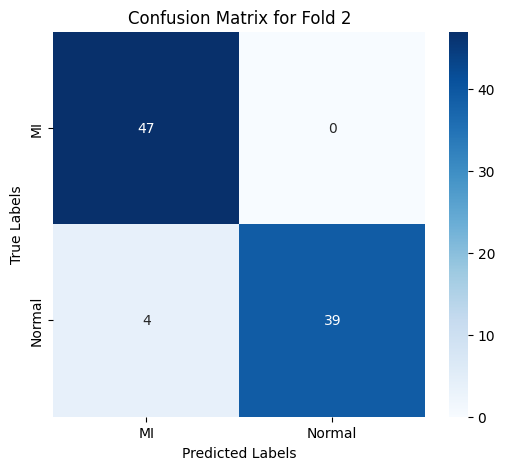

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


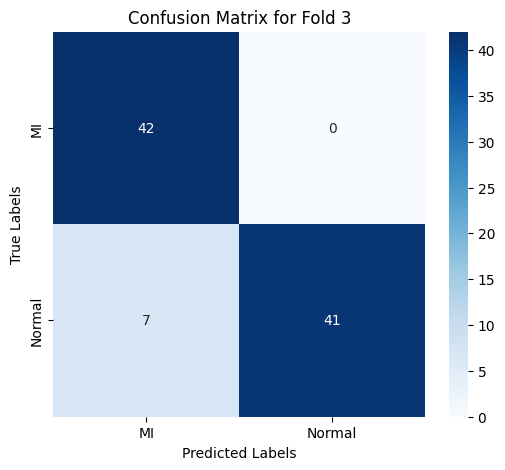

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


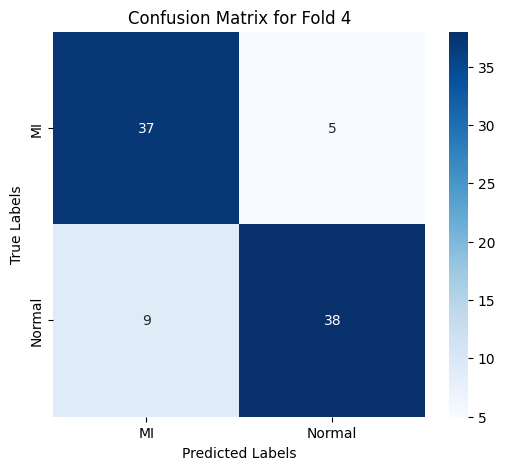

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


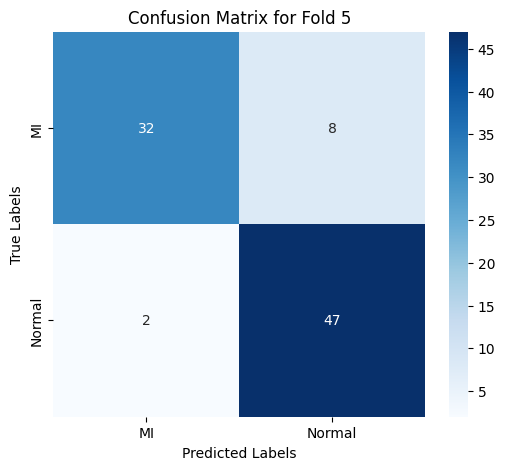

--------------------------------------------------------------------------------


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_tuning_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## Transformer Decoder Tuning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import itertools

# Hyperparameter yang ingin dicoba
param_grid = {
    'batch_size': [8, 16, 32, 64],
    'num_epochs': [10, 20, 50, 100]
}

# Semua kombinasi hyperparameter
param_combinations = list(itertools.product(param_grid['batch_size'], param_grid['num_epochs']))

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk training model
def train_and_evaluate_model(batch_size, num_epochs):
    fold_no = 1
    val_accuracy_per_fold = []

    for train_index, val_index in kf.split(X_train_tensor):
        print(f'Fold {fold_no}')

        # Membagi data
        X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
        y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

        # Membuat TensorDataset untuk train dan validation fold
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Inisialisasi model dan optimizer
        model = TransformerDecoderModel(input_dim, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)  # Tetap gunakan lr yang sama

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            for X_batch, y_batch in train_loader_fold:
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluasi pada data validasi
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_accuracy = 100 * correct_val / total_val
        val_accuracy_per_fold.append(val_accuracy)
        fold_no += 1

    # Rata-rata akurasi validasi
    avg_val_accuracy = sum(val_accuracy_per_fold) / len(val_accuracy_per_fold)
    return avg_val_accuracy

# Melakukan Grid Search
best_accuracy = 0
best_params = None

for (batch_size, num_epochs) in param_combinations:
    print(f'Trying hyperparameters: batch_size={batch_size}, num_epochs={num_epochs}')
    val_accuracy = train_and_evaluate_model(batch_size, num_epochs)
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = (batch_size, num_epochs)

print('Best Hyperparameters:')
print(f'Batch Size: {best_params[0]}, Epochs: {best_params[1]}')
print(f'Best Validation Accuracy: {best_accuracy:.2f}%')


Trying hyperparameters: batch_size=8, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 86.40%
Trying hyperparameters: batch_size=8, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.48%
Trying hyperparameters: batch_size=8, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 88.61%
Trying hyperparameters: batch_size=8, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 88.39%
Trying hyperparameters: batch_size=16, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 85.92%
Trying hyperparameters: batch_size=16, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 88.61%
Trying hyperparameters: batch_size=16, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 91.52%
Trying hyperparameters: batch_size=16, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 91.07%
Trying hyperparameters: batch_size=32, num_epochs=10
Fold 1
Fold 2
Fold 3


Fold 1
Epoch 1/50, Loss: 0.6489, Accuracy: 64.53%, Validation Loss: 0.6100, Validation Accuracy: 65.56%
Epoch 2/50, Loss: 0.5135, Accuracy: 73.18%, Validation Loss: 0.5303, Validation Accuracy: 74.44%
Epoch 3/50, Loss: 0.4559, Accuracy: 77.65%, Validation Loss: 0.4823, Validation Accuracy: 75.56%
Epoch 4/50, Loss: 0.4191, Accuracy: 80.73%, Validation Loss: 0.4861, Validation Accuracy: 82.22%
Epoch 5/50, Loss: 0.3248, Accuracy: 85.47%, Validation Loss: 0.5555, Validation Accuracy: 74.44%
Epoch 6/50, Loss: 0.2936, Accuracy: 88.27%, Validation Loss: 0.3798, Validation Accuracy: 84.44%
Epoch 7/50, Loss: 0.2725, Accuracy: 88.55%, Validation Loss: 0.3748, Validation Accuracy: 81.11%
Epoch 8/50, Loss: 0.2656, Accuracy: 88.27%, Validation Loss: 0.4577, Validation Accuracy: 81.11%
Epoch 9/50, Loss: 0.2248, Accuracy: 91.34%, Validation Loss: 0.4588, Validation Accuracy: 83.33%
Epoch 10/50, Loss: 0.2003, Accuracy: 92.46%, Validation Loss: 0.4555, Validation Accuracy: 83.33%
Epoch 11/50, Loss: 0.2

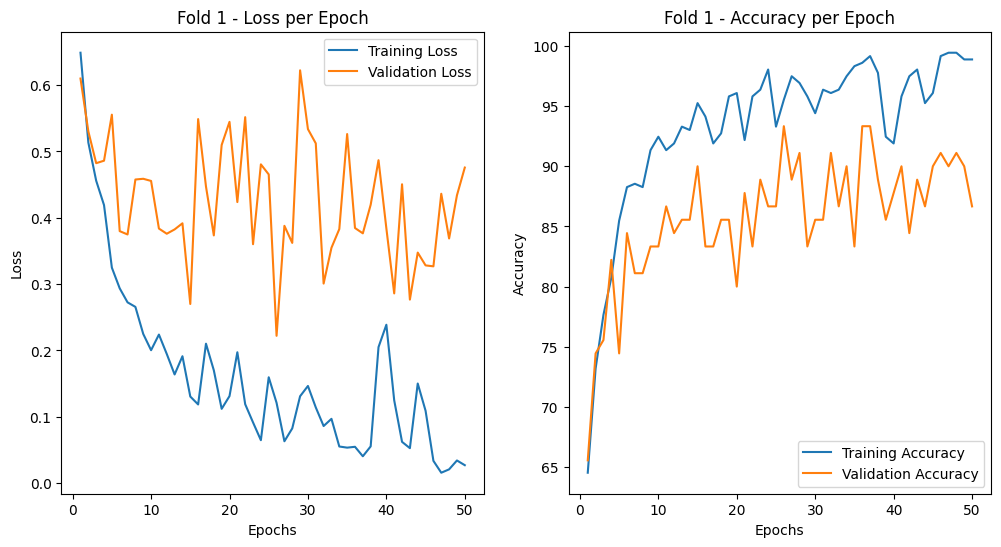

Fold 2
Epoch 1/50, Loss: 0.6371, Accuracy: 67.88%, Validation Loss: 0.6231, Validation Accuracy: 77.78%
Epoch 2/50, Loss: 0.4826, Accuracy: 76.82%, Validation Loss: 0.5041, Validation Accuracy: 75.56%
Epoch 3/50, Loss: 0.4142, Accuracy: 81.28%, Validation Loss: 0.3982, Validation Accuracy: 88.89%
Epoch 4/50, Loss: 0.3454, Accuracy: 86.59%, Validation Loss: 0.3559, Validation Accuracy: 84.44%
Epoch 5/50, Loss: 0.2594, Accuracy: 89.94%, Validation Loss: 0.3513, Validation Accuracy: 85.56%
Epoch 6/50, Loss: 0.2445, Accuracy: 89.94%, Validation Loss: 0.3100, Validation Accuracy: 86.67%
Epoch 7/50, Loss: 0.1636, Accuracy: 93.30%, Validation Loss: 0.2800, Validation Accuracy: 91.11%
Epoch 8/50, Loss: 0.2451, Accuracy: 89.39%, Validation Loss: 0.3452, Validation Accuracy: 83.33%
Epoch 9/50, Loss: 0.1702, Accuracy: 93.58%, Validation Loss: 0.2455, Validation Accuracy: 90.00%
Epoch 10/50, Loss: 0.1469, Accuracy: 94.97%, Validation Loss: 0.4036, Validation Accuracy: 84.44%
Epoch 11/50, Loss: 0.1

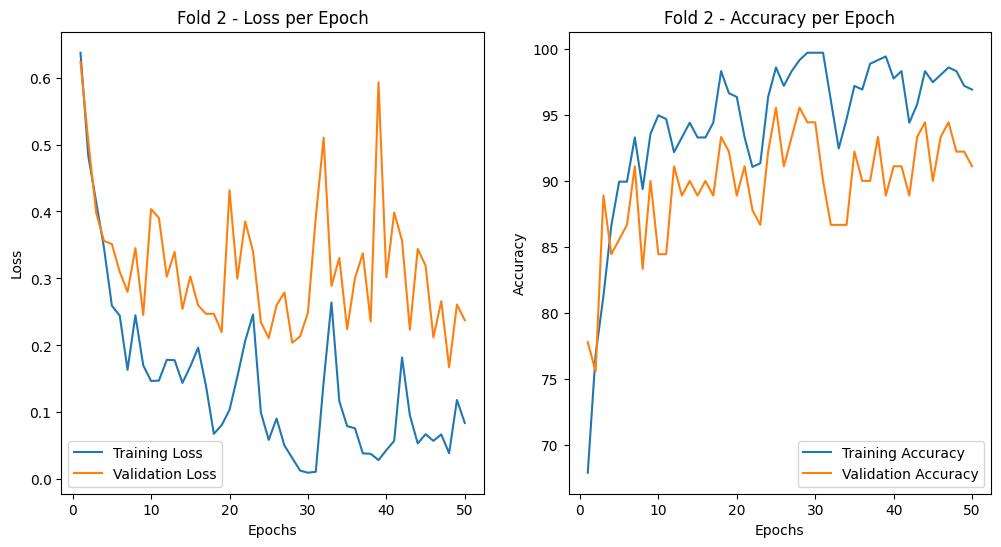

Fold 3
Epoch 1/50, Loss: 0.6310, Accuracy: 67.04%, Validation Loss: 0.5474, Validation Accuracy: 68.89%
Epoch 2/50, Loss: 0.5034, Accuracy: 74.30%, Validation Loss: 0.5392, Validation Accuracy: 74.44%
Epoch 3/50, Loss: 0.4126, Accuracy: 79.61%, Validation Loss: 0.4441, Validation Accuracy: 78.89%
Epoch 4/50, Loss: 0.3455, Accuracy: 87.43%, Validation Loss: 0.3662, Validation Accuracy: 83.33%
Epoch 5/50, Loss: 0.2900, Accuracy: 87.15%, Validation Loss: 0.3874, Validation Accuracy: 84.44%
Epoch 6/50, Loss: 0.3384, Accuracy: 86.03%, Validation Loss: 0.4109, Validation Accuracy: 80.00%
Epoch 7/50, Loss: 0.3045, Accuracy: 89.66%, Validation Loss: 0.3492, Validation Accuracy: 86.67%
Epoch 8/50, Loss: 0.2127, Accuracy: 93.30%, Validation Loss: 0.3149, Validation Accuracy: 87.78%
Epoch 9/50, Loss: 0.1821, Accuracy: 92.18%, Validation Loss: 0.2952, Validation Accuracy: 90.00%
Epoch 10/50, Loss: 0.1982, Accuracy: 93.85%, Validation Loss: 0.1825, Validation Accuracy: 91.11%
Epoch 11/50, Loss: 0.1

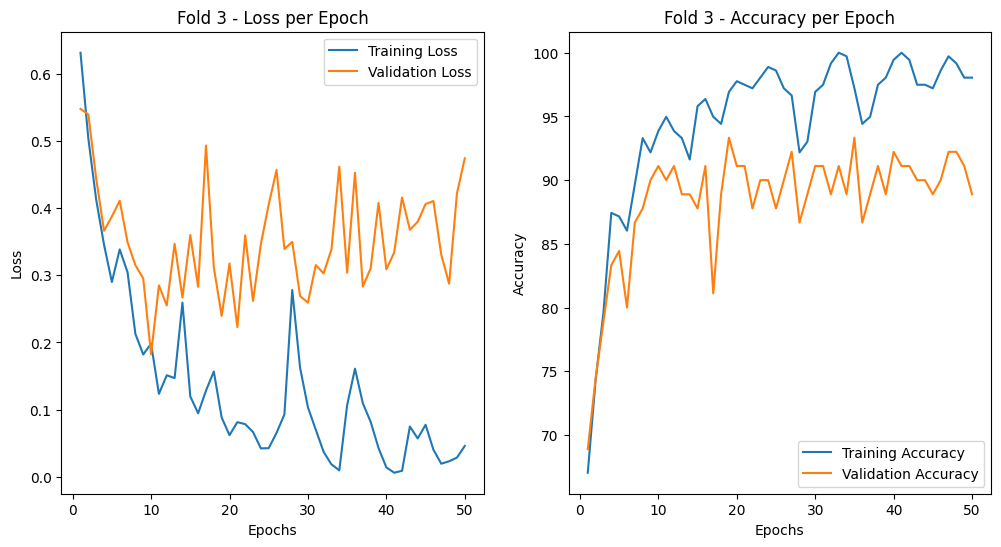

Fold 4
Epoch 1/50, Loss: 0.6288, Accuracy: 67.97%, Validation Loss: 0.6535, Validation Accuracy: 67.42%
Epoch 2/50, Loss: 0.5084, Accuracy: 71.03%, Validation Loss: 0.5743, Validation Accuracy: 67.42%
Epoch 3/50, Loss: 0.4335, Accuracy: 78.27%, Validation Loss: 0.6000, Validation Accuracy: 74.16%
Epoch 4/50, Loss: 0.2960, Accuracy: 88.02%, Validation Loss: 0.5651, Validation Accuracy: 77.53%
Epoch 5/50, Loss: 0.2774, Accuracy: 87.74%, Validation Loss: 0.4884, Validation Accuracy: 77.53%
Epoch 6/50, Loss: 0.2094, Accuracy: 92.20%, Validation Loss: 0.5319, Validation Accuracy: 78.65%
Epoch 7/50, Loss: 0.2055, Accuracy: 91.09%, Validation Loss: 0.5477, Validation Accuracy: 79.78%
Epoch 8/50, Loss: 0.2055, Accuracy: 91.92%, Validation Loss: 0.5246, Validation Accuracy: 82.02%
Epoch 9/50, Loss: 0.1649, Accuracy: 93.04%, Validation Loss: 0.4494, Validation Accuracy: 84.27%
Epoch 10/50, Loss: 0.1676, Accuracy: 93.87%, Validation Loss: 0.5075, Validation Accuracy: 80.90%
Epoch 11/50, Loss: 0.2

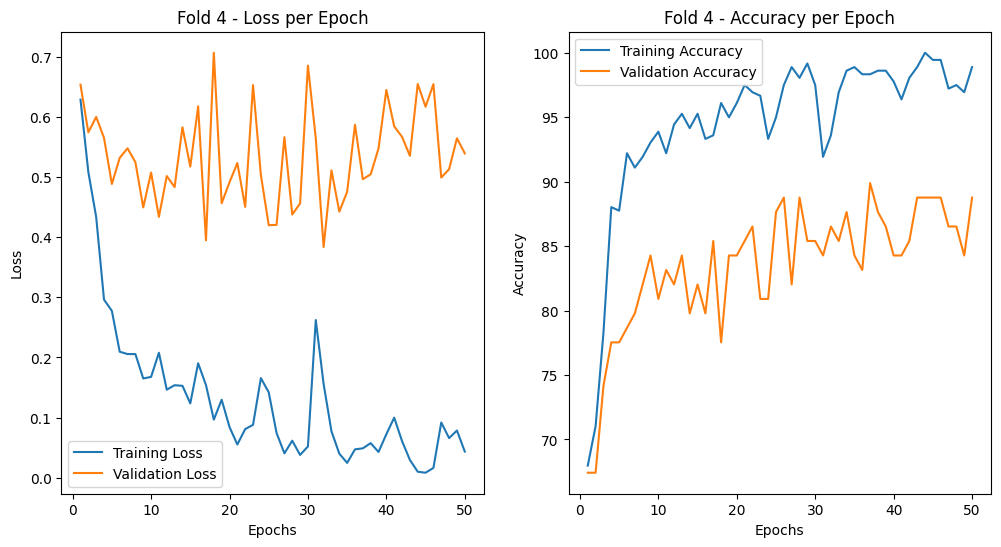

Fold 5
Epoch 1/50, Loss: 0.6645, Accuracy: 58.50%, Validation Loss: 0.5476, Validation Accuracy: 66.29%
Epoch 2/50, Loss: 0.4876, Accuracy: 74.93%, Validation Loss: 0.5084, Validation Accuracy: 71.91%
Epoch 3/50, Loss: 0.4206, Accuracy: 77.99%, Validation Loss: 0.5123, Validation Accuracy: 76.40%
Epoch 4/50, Loss: 0.3622, Accuracy: 84.96%, Validation Loss: 0.3887, Validation Accuracy: 83.15%
Epoch 5/50, Loss: 0.3329, Accuracy: 85.79%, Validation Loss: 0.3328, Validation Accuracy: 84.27%
Epoch 6/50, Loss: 0.2689, Accuracy: 89.42%, Validation Loss: 0.3704, Validation Accuracy: 83.15%
Epoch 7/50, Loss: 0.2095, Accuracy: 92.76%, Validation Loss: 0.3456, Validation Accuracy: 85.39%
Epoch 8/50, Loss: 0.2421, Accuracy: 89.97%, Validation Loss: 0.4073, Validation Accuracy: 85.39%
Epoch 9/50, Loss: 0.2061, Accuracy: 90.81%, Validation Loss: 0.3678, Validation Accuracy: 85.39%
Epoch 10/50, Loss: 0.1820, Accuracy: 93.59%, Validation Loss: 0.6392, Validation Accuracy: 82.02%
Epoch 11/50, Loss: 0.2

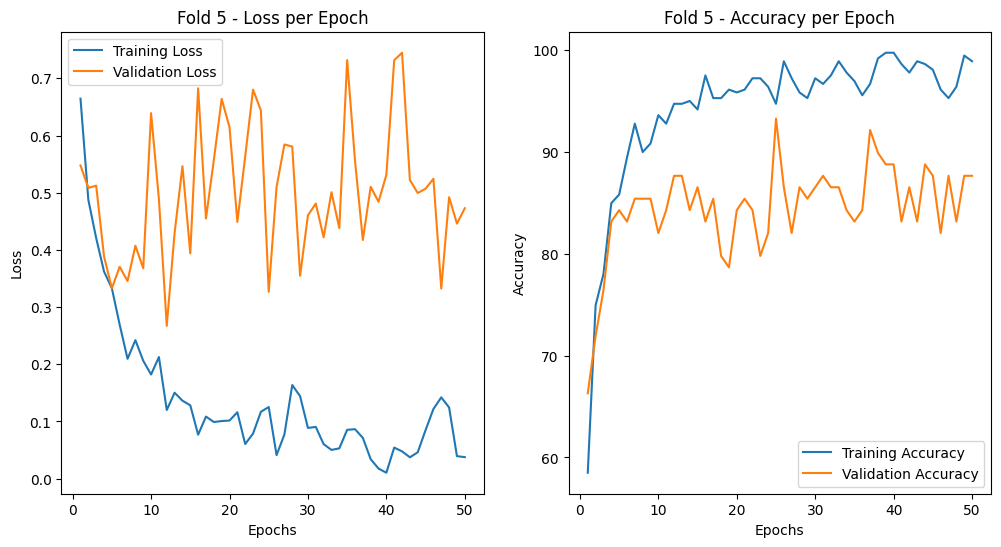

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.0269 - Train Accuracy: 98.88%
           - Validation Loss: 0.4757 - Validation Accuracy: 86.67%
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.0842 - Train Accuracy: 96.93%
           - Validation Loss: 0.2377 - Validation Accuracy: 91.11%
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.0461 - Train Accuracy: 98.04%
           - Validation Loss: 0.4739 - Validation Accuracy: 88.89%
------------------------------------------------------------------------
> Fold 4 - Train Loss: 0.0434 - Train Accuracy: 98.89%
           - Validation Loss: 0.5394 - Validation Accuracy: 88.76%
------------------------------------------------------------------------
> Fold 5 - Train Loss: 0.0375 - Train Accuracy: 98.89%
    

In [ ]:
# Initialize KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results for each fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

# Create directory to save models if not exists
os.makedirs('models_tuning_transformer_decoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Split data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Create TensorDataset for train and validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=16, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=16, shuffle=False)

    # Initialize model and optimizer for each fold
    model = TransformerDecoderModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Store loss and accuracy per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop for this fold
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = 100 * correct_train / total_train

        # Evaluate on validation data
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_loss /= len(val_loader_fold)
        val_accuracy = 100 * correct_val / total_val

        # Save loss and accuracy per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)

    # Save model
    model_filename = f'models_tuning_transformer_decoder/transformer_decoder_model_tuning_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot loss and accuracy graphs
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Display final results
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.4f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f}%')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:-.4f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.4f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.4f}')
print('------------------------------------------------------------------------')

# Evaluate on the test set with the last model
# model.eval()
# test_loss = 0.0
# correct_test = 0
# total_test = 0
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         test_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total_test += y_batch.size(0)
#         correct_test += (predicted == y_batch).sum().item()

# test_loss /= len(test_loader)
# test_accuracy = 100 * correct_test / total_test

# print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

In [ ]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_tuning_transformer_decoder/transformer_decoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerDecoderModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


<ipython-input-80-d934fb8e1d73>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))
<ipython-input-80-d934fb8e1d73>:9: FutureW

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.86      0.89      0.88        47
      Normal       0.88      0.84      0.86        43

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.88      0.96      0.92        47
      Normal       0.95      0.86      0.90        43

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90

--------------------------------------------------------------------------------


<ipython-input-80-d934fb8e1d73>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))
<ipython-input-80-d934fb8e1d73>:9: FutureW

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.86      0.90      0.88        42
      Normal       0.91      0.88      0.89        48

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.86      0.90      0.88        42
      Normal       0.91      0.87      0.89        47

    accuracy                           0.89        89
   macro avg       0.89      0.89      0.89        89
weighted avg       0.89      0.89      0.89        89

--------------------------------------------------------------------------------
Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.89      0

<ipython-input-80-d934fb8e1d73>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


<ipython-input-81-c57d123f1aaf>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


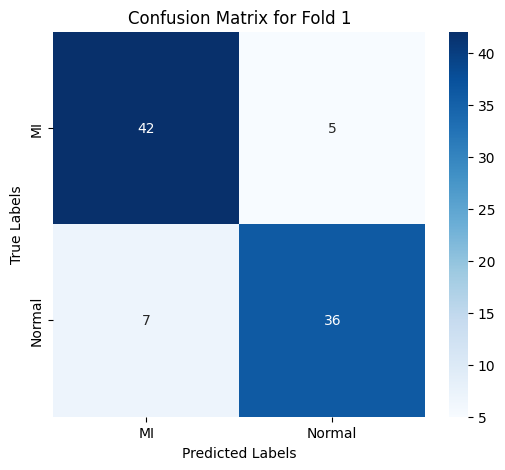

--------------------------------------------------------------------------------


<ipython-input-81-c57d123f1aaf>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


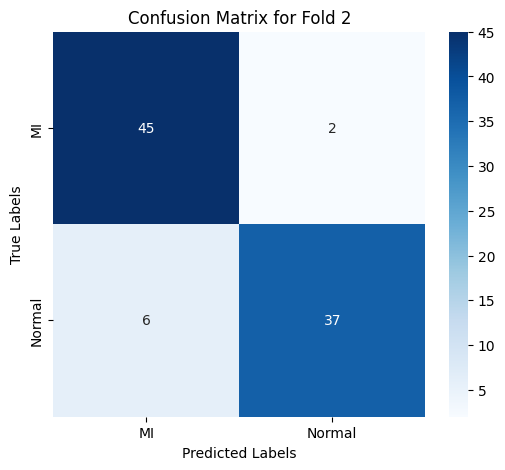

--------------------------------------------------------------------------------


<ipython-input-81-c57d123f1aaf>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


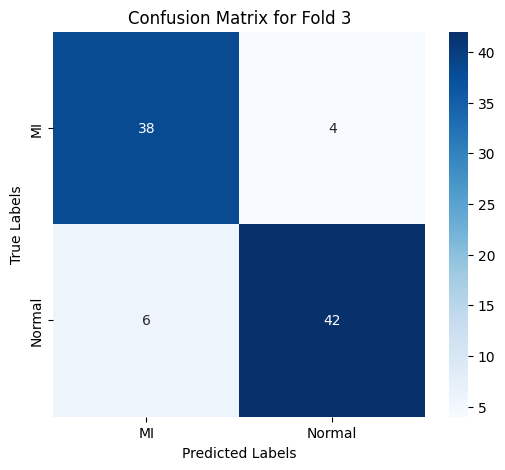

--------------------------------------------------------------------------------


<ipython-input-81-c57d123f1aaf>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


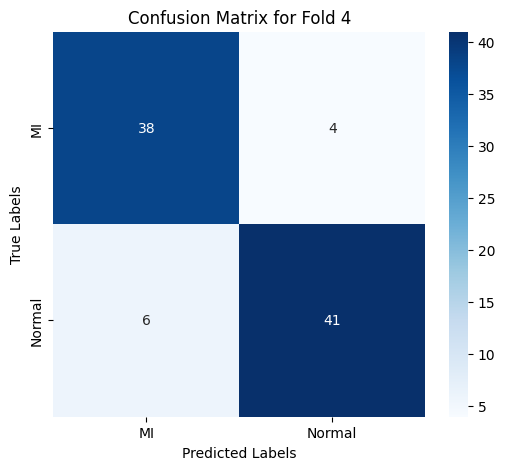

--------------------------------------------------------------------------------


<ipython-input-81-c57d123f1aaf>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))


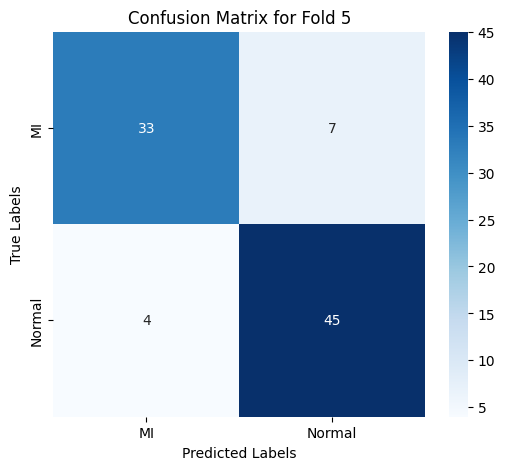

--------------------------------------------------------------------------------


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'models_tuning_transformer_decoder/transformer_decoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerDecoderModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)

## Transformer Encoder Decoder Tuning

In [ ]:
# Hyperparameter yang ingin dicoba
param_grid = {
    'batch_size': [8, 16, 32, 64],
    'num_epochs': [10, 20, 50, 100]
}

# Semua kombinasi hyperparameter
param_combinations = list(itertools.product(param_grid['batch_size'], param_grid['num_epochs']))

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk training dan evaluasi model
def train_and_evaluate_model(batch_size, num_epochs):
    fold_no = 1
    val_accuracy_per_fold = []

    for train_index, val_index in kf.split(X_train_tensor):
        print(f'Fold {fold_no}')

        # Membagi data
        X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
        y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

        # Membuat TensorDataset untuk train dan validation fold
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

        # DataLoader
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Inisialisasi model dan optimizer untuk setiap fold
        model = TransformerEncoderDecoderModel(input_dim, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Training loop untuk fold ini
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for X_batch, y_batch in train_loader_fold:
                optimizer.zero_grad()
                # Untuk decoder, kita perlu target juga. Kita gunakan y_batch sebagai target untuk decoder di sini.
                outputs = model(X_batch, X_batch)  # X_batch sebagai input dan target untuk contoh ini
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_train += y_batch.size(0)
                correct_train += (predicted == y_batch).sum().item()

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                # Untuk decoder, kita perlu target juga. Kita gunakan y_batch sebagai target untuk decoder di sini.
                outputs = model(X_batch, X_batch)  # X_batch sebagai input dan target untuk contoh ini
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_accuracy = 100 * correct_val / total_val
        val_accuracy_per_fold.append(val_accuracy)
        fold_no += 1

    # Rata-rata akurasi validasi per fold
    avg_val_accuracy = np.mean(val_accuracy_per_fold)

    return avg_val_accuracy

# Melakukan Grid Search
best_accuracy = 0
best_params = None

start_time = time.time()

for (batch_size, num_epochs) in param_combinations:
    print(f'Trying hyperparameters: batch_size={batch_size}, num_epochs={num_epochs}')
    val_accuracy = train_and_evaluate_model(batch_size, num_epochs)
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = (batch_size, num_epochs)

end_time = time.time()

print('Best Hyperparameters:')
print(f'Batch Size: {best_params[0]}, Epochs: {best_params[1]}')
print(f'Best Validation Accuracy: {best_accuracy:.2f}%')
print(f'Total Time Taken: {end_time - start_time:.2f} seconds')

Trying hyperparameters: batch_size=8, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 77.00%
Trying hyperparameters: batch_size=8, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 77.88%
Trying hyperparameters: batch_size=8, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.05%
Trying hyperparameters: batch_size=8, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.50%
Trying hyperparameters: batch_size=16, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 82.14%
Trying hyperparameters: batch_size=16, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 84.83%
Trying hyperparameters: batch_size=16, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 86.82%
Trying hyperparameters: batch_size=16, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.28%
Trying hyperparameters: batch_size=32, num_epochs=10
Fold 1
Fold 2
Fold 3


Fold 1
Epoch 1/100, Loss: 0.7543, Accuracy: 56.70%, Validation Loss: 0.6978, Validation Accuracy: 47.78%
Epoch 2/100, Loss: 0.6204, Accuracy: 63.97%, Validation Loss: 0.5609, Validation Accuracy: 66.67%
Epoch 3/100, Loss: 0.5357, Accuracy: 72.07%, Validation Loss: 0.4450, Validation Accuracy: 72.22%
Epoch 4/100, Loss: 0.4843, Accuracy: 75.70%, Validation Loss: 0.4260, Validation Accuracy: 80.00%
Epoch 5/100, Loss: 0.4139, Accuracy: 79.61%, Validation Loss: 0.5593, Validation Accuracy: 74.44%
Epoch 6/100, Loss: 0.4231, Accuracy: 80.73%, Validation Loss: 0.4954, Validation Accuracy: 78.89%
Epoch 7/100, Loss: 0.3399, Accuracy: 84.92%, Validation Loss: 0.3810, Validation Accuracy: 83.33%
Epoch 8/100, Loss: 0.3544, Accuracy: 85.20%, Validation Loss: 0.5846, Validation Accuracy: 75.56%
Epoch 9/100, Loss: 0.2846, Accuracy: 87.15%, Validation Loss: 0.4015, Validation Accuracy: 83.33%
Epoch 10/100, Loss: 0.2998, Accuracy: 86.87%, Validation Loss: 0.5419, Validation Accuracy: 81.11%
Epoch 11/100

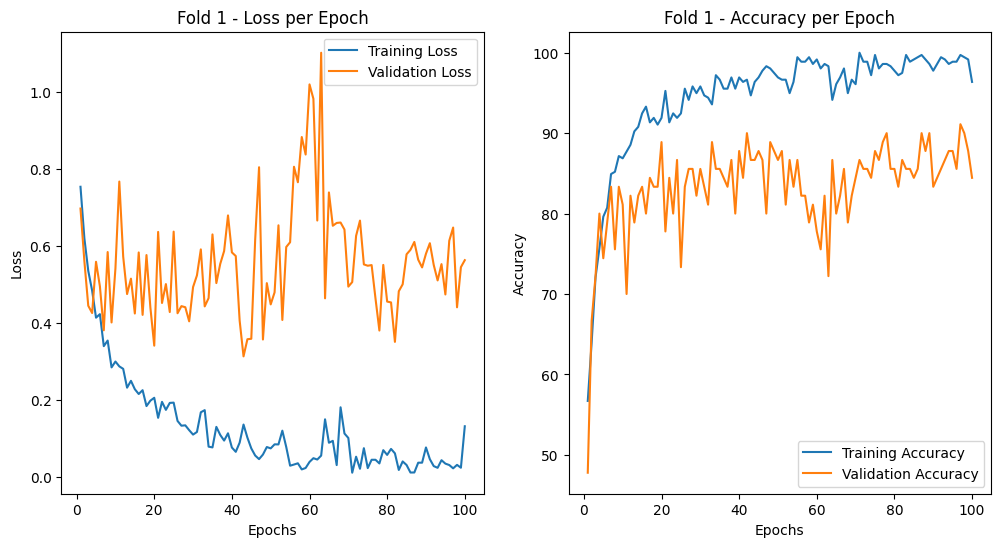

Fold 2
Epoch 1/100, Loss: 0.7343, Accuracy: 53.91%, Validation Loss: 0.7084, Validation Accuracy: 52.22%
Epoch 2/100, Loss: 0.6563, Accuracy: 61.73%, Validation Loss: 0.6818, Validation Accuracy: 64.44%
Epoch 3/100, Loss: 0.6925, Accuracy: 58.66%, Validation Loss: 0.5974, Validation Accuracy: 71.11%
Epoch 4/100, Loss: 0.5283, Accuracy: 70.95%, Validation Loss: 0.4956, Validation Accuracy: 74.44%
Epoch 5/100, Loss: 0.4867, Accuracy: 75.14%, Validation Loss: 0.4916, Validation Accuracy: 72.22%
Epoch 6/100, Loss: 0.4690, Accuracy: 75.14%, Validation Loss: 0.4497, Validation Accuracy: 78.89%
Epoch 7/100, Loss: 0.3832, Accuracy: 82.96%, Validation Loss: 0.4631, Validation Accuracy: 78.89%
Epoch 8/100, Loss: 0.3795, Accuracy: 81.56%, Validation Loss: 0.4288, Validation Accuracy: 76.67%
Epoch 9/100, Loss: 0.3224, Accuracy: 88.27%, Validation Loss: 0.4774, Validation Accuracy: 80.00%
Epoch 10/100, Loss: 0.3130, Accuracy: 86.87%, Validation Loss: 0.4172, Validation Accuracy: 83.33%
Epoch 11/100

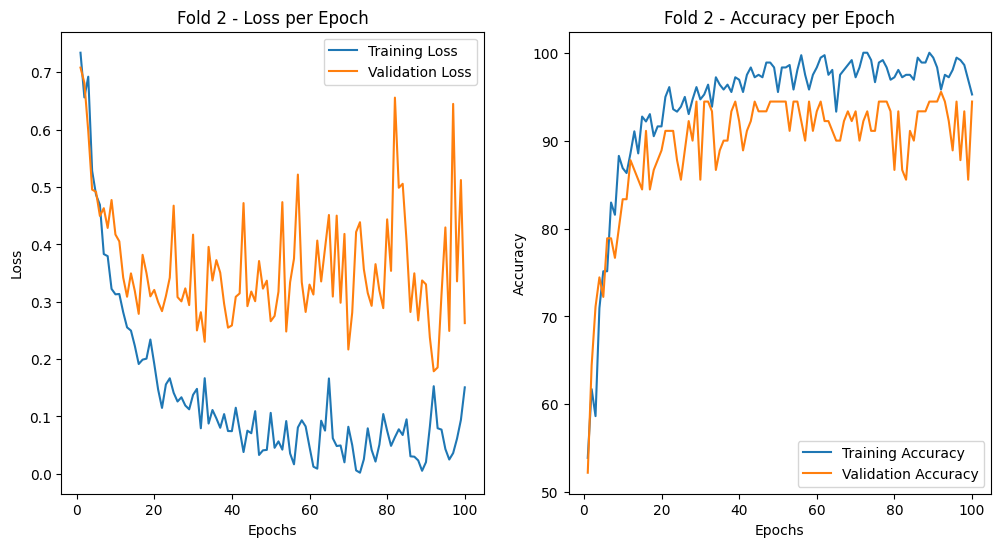

Fold 3
Epoch 1/100, Loss: 0.7206, Accuracy: 55.03%, Validation Loss: 0.6120, Validation Accuracy: 63.33%
Epoch 2/100, Loss: 0.5401, Accuracy: 70.11%, Validation Loss: 0.6445, Validation Accuracy: 64.44%
Epoch 3/100, Loss: 0.5229, Accuracy: 73.74%, Validation Loss: 0.5614, Validation Accuracy: 67.78%
Epoch 4/100, Loss: 0.4641, Accuracy: 79.05%, Validation Loss: 0.6678, Validation Accuracy: 70.00%
Epoch 5/100, Loss: 0.4137, Accuracy: 81.56%, Validation Loss: 0.3780, Validation Accuracy: 77.78%
Epoch 6/100, Loss: 0.4080, Accuracy: 81.01%, Validation Loss: 0.5521, Validation Accuracy: 77.78%
Epoch 7/100, Loss: 0.3576, Accuracy: 86.31%, Validation Loss: 0.3296, Validation Accuracy: 86.67%
Epoch 8/100, Loss: 0.3327, Accuracy: 87.15%, Validation Loss: 0.3076, Validation Accuracy: 87.78%
Epoch 9/100, Loss: 0.3160, Accuracy: 88.27%, Validation Loss: 0.4744, Validation Accuracy: 78.89%
Epoch 10/100, Loss: 0.3106, Accuracy: 87.43%, Validation Loss: 0.3910, Validation Accuracy: 81.11%
Epoch 11/100

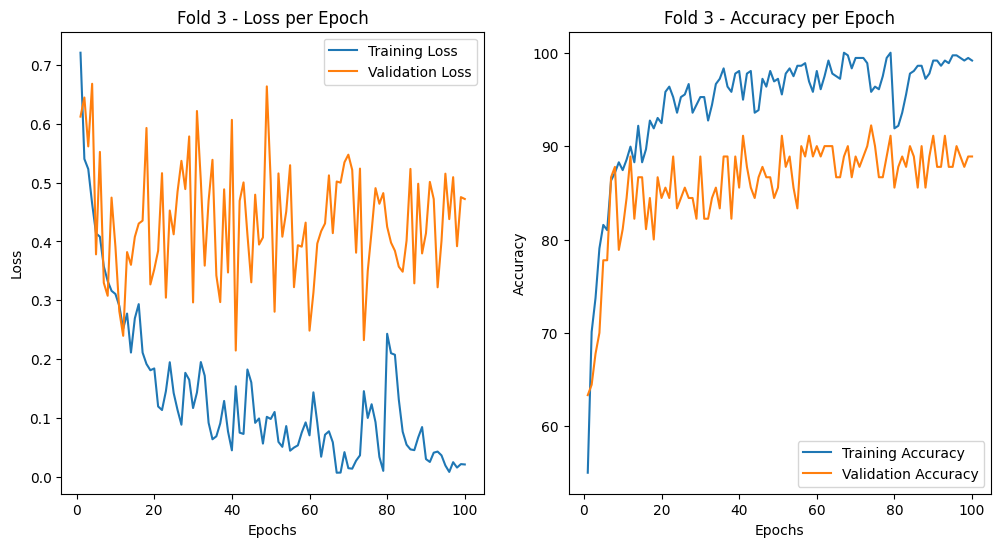

Fold 4
Epoch 1/100, Loss: 0.7774, Accuracy: 52.65%, Validation Loss: 0.6467, Validation Accuracy: 56.18%
Epoch 2/100, Loss: 0.6199, Accuracy: 62.95%, Validation Loss: 0.5270, Validation Accuracy: 71.91%
Epoch 3/100, Loss: 0.5236, Accuracy: 73.82%, Validation Loss: 0.5270, Validation Accuracy: 74.16%
Epoch 4/100, Loss: 0.4916, Accuracy: 69.36%, Validation Loss: 0.5643, Validation Accuracy: 71.91%
Epoch 5/100, Loss: 0.5449, Accuracy: 73.26%, Validation Loss: 0.5139, Validation Accuracy: 73.03%
Epoch 6/100, Loss: 0.4221, Accuracy: 77.99%, Validation Loss: 0.6729, Validation Accuracy: 67.42%
Epoch 7/100, Loss: 0.4311, Accuracy: 81.06%, Validation Loss: 0.5695, Validation Accuracy: 71.91%
Epoch 8/100, Loss: 0.3761, Accuracy: 83.01%, Validation Loss: 0.6556, Validation Accuracy: 74.16%
Epoch 9/100, Loss: 0.3956, Accuracy: 81.89%, Validation Loss: 0.5240, Validation Accuracy: 78.65%
Epoch 10/100, Loss: 0.4039, Accuracy: 83.01%, Validation Loss: 0.4591, Validation Accuracy: 80.90%
Epoch 11/100

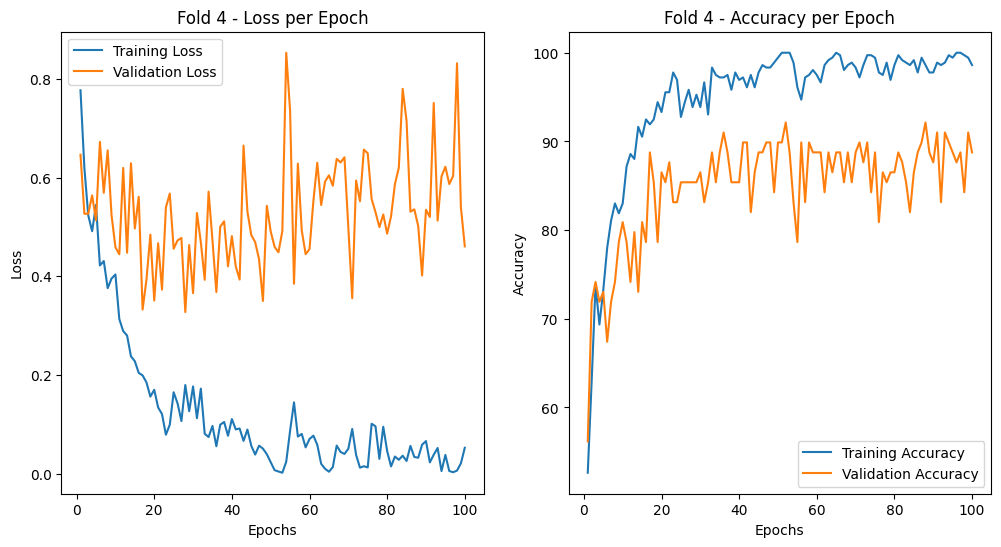

Fold 5
Epoch 1/100, Loss: 0.6968, Accuracy: 58.22%, Validation Loss: 0.5963, Validation Accuracy: 61.80%
Epoch 2/100, Loss: 0.6015, Accuracy: 66.57%, Validation Loss: 0.5672, Validation Accuracy: 70.79%
Epoch 3/100, Loss: 0.5197, Accuracy: 72.98%, Validation Loss: 0.5161, Validation Accuracy: 71.91%
Epoch 4/100, Loss: 0.4513, Accuracy: 75.49%, Validation Loss: 0.4399, Validation Accuracy: 80.90%
Epoch 5/100, Loss: 0.4773, Accuracy: 79.67%, Validation Loss: 0.4267, Validation Accuracy: 79.78%
Epoch 6/100, Loss: 0.3981, Accuracy: 81.89%, Validation Loss: 0.4673, Validation Accuracy: 77.53%
Epoch 7/100, Loss: 0.3234, Accuracy: 85.79%, Validation Loss: 0.4948, Validation Accuracy: 78.65%
Epoch 8/100, Loss: 0.3085, Accuracy: 86.91%, Validation Loss: 0.4646, Validation Accuracy: 83.15%
Epoch 9/100, Loss: 0.3185, Accuracy: 85.79%, Validation Loss: 0.5076, Validation Accuracy: 80.90%
Epoch 10/100, Loss: 0.3024, Accuracy: 87.74%, Validation Loss: 0.4648, Validation Accuracy: 79.78%
Epoch 11/100

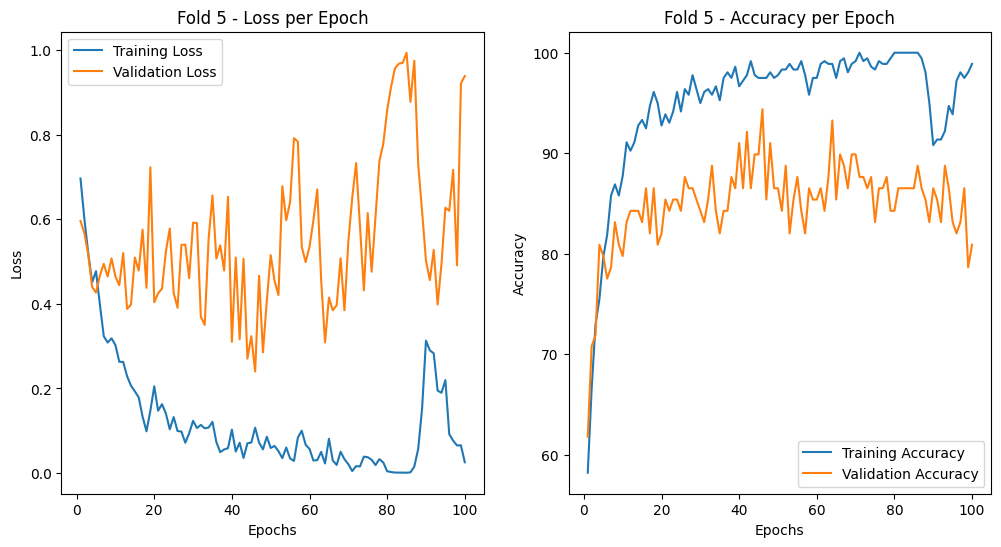

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.1315 - Train Accuracy: 96.37%
           - Validation Loss: 0.5635 - Validation Accuracy: 84.44%
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.1507 - Train Accuracy: 95.25%
           - Validation Loss: 0.2628 - Validation Accuracy: 94.44%
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.0210 - Train Accuracy: 99.16%
           - Validation Loss: 0.4720 - Validation Accuracy: 88.89%
------------------------------------------------------------------------
> Fold 4 - Train Loss: 0.0524 - Train Accuracy: 98.61%
           - Validation Loss: 0.4609 - Validation Accuracy: 88.76%
------------------------------------------------------------------------
> Fold 5 - Train Loss: 0.0252 - Train Accuracy: 98.89%
    

In [ ]:
# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tuning_transformer_encoder_decoder', exist_ok=True)

# Data Dummy (untuk mengganti dengan data asli)
# input_dim = 128  # Misal jumlah fitur
# num_classes = 10  # Misal jumlah kelas
input_dim = X_train.shape[1]
num_classes = len(set(y_train))
# X_train_tensor = torch.randn(500, input_dim)  # 500 sampel training
# y_train_tensor = torch.randint(0, num_classes, (500,))  # 500 label training

# Loop KFold
for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    # DataLoader
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=16, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=16, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerEncoderDecoderModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss dan akurasi per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Training loop untuk fold ini
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            # Untuk decoder, kita perlu target juga. Kita gunakan y_batch sebagai target untuk decoder di sini.
            outputs = model(X_batch, X_batch)  # X_batch sebagai input dan target untuk contoh ini
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = 100 * correct_train / total_train

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                # Untuk decoder, kita perlu target juga. Kita gunakan y_batch sebagai target untuk decoder di sini.
                outputs = model(X_batch, X_batch)  # X_batch sebagai input dan target untuk contoh ini
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_loss /= len(val_loader_fold)
        val_accuracy = 100 * correct_val / total_val

        # Simpan loss dan akurasi per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)

    # Simpan model
    model_filename = f'models_tuning_transformer_encoder_decoder/transformer_encoder_decoder_model_tuning_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss dan akurasi
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.4f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f}%')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:-.4f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.4f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.4f}')
print('------------------------------------------------------------------------')


In [ ]:
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader, TensorDataset

# Loop untuk menampilkan classification report untuk setiap fold
for fold_no in range(1, 6):  # Jika Anda menggunakan 5 fold
    # Load model untuk fold ini
    model_filename = f'models_tuning_transformer_encoder_decoder/transformer_encoder_decoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerEncoderDecoderModel(input_dim, num_classes)  # Inisialisasi model yang sama
    model.load_state_dict(torch.load(model_filename))

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Membuat DataLoader untuk fold ini
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Evaluasi pada data validasi untuk fold ini
    model.eval()
    val_outputs = []
    val_labels = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader_fold:
            outputs = model(X_batch, X_batch)
            _, predicted = torch.max(outputs.data, 1)

            # Simpan prediksi dan label asli
            val_outputs.extend(predicted.tolist())
            val_labels.extend(y_batch.tolist())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}:')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


<ipython-input-85-6ca69d02a075>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))
/usr/local/lib/python3.10/dist-packages/t

Classification Report for Fold 1:
              precision    recall  f1-score   support

          MI       0.88      0.81      0.84        47
      Normal       0.81      0.88      0.84        43

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90

--------------------------------------------------------------------------------
Classification Report for Fold 2:
              precision    recall  f1-score   support

          MI       0.92      0.98      0.95        47
      Normal       0.97      0.91      0.94        43

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90

--------------------------------------------------------------------------------
Classification Report for Fold 3:
              precision    recall  f1-score   support

          MI       0.90    

<ipython-input-85-6ca69d02a075>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_filename))
/usr/local/lib/python3.10/dist-packages/t

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
<ipython-input-86-8bf1380a932a>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless t

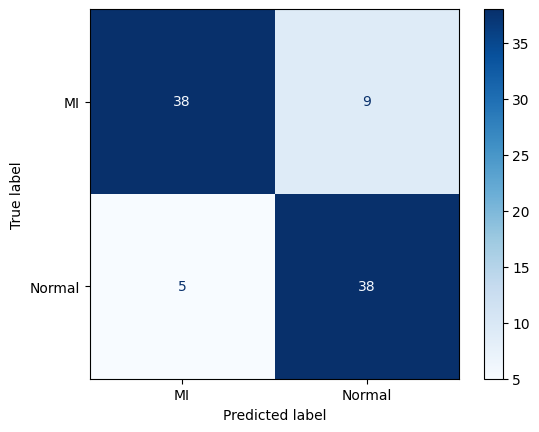

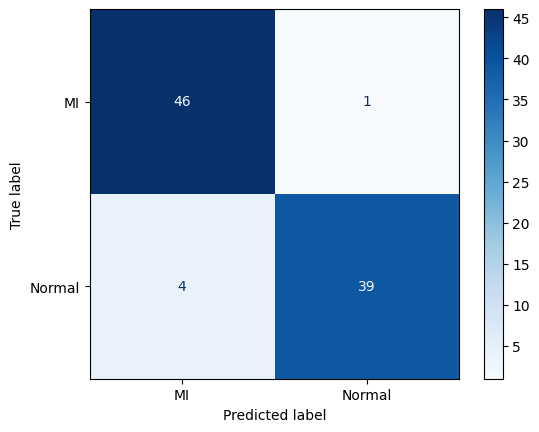

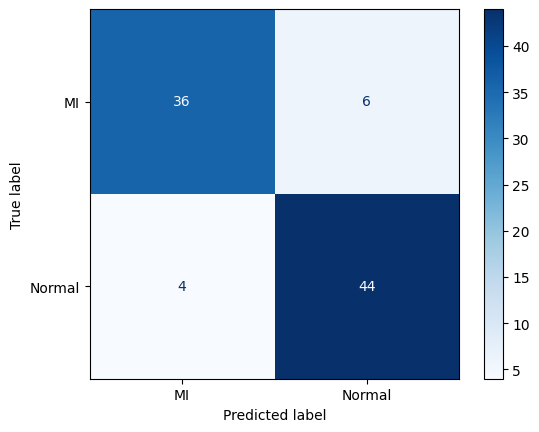

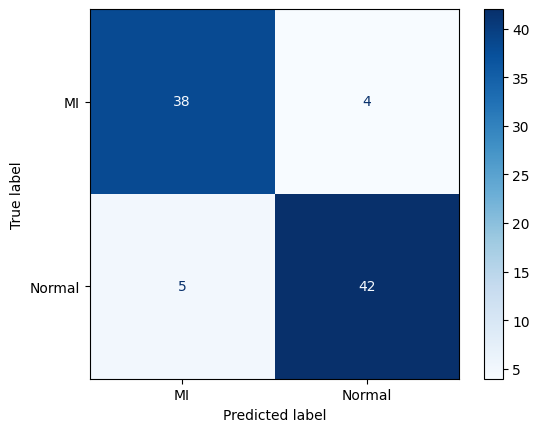

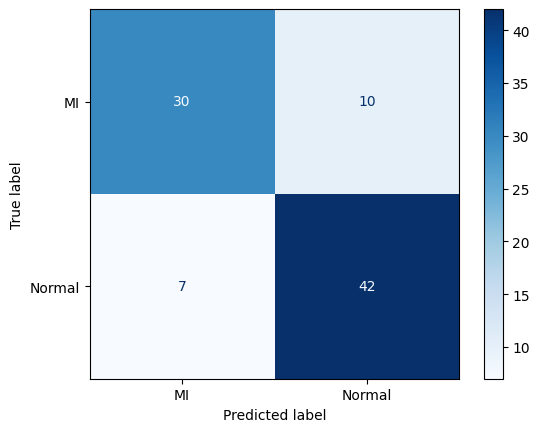

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

# Loop untuk menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, 6):  # Jika Anda menggunakan 5 fold
    # Load model untuk fold ini
    model_filename = f'models_tuning_transformer_encoder_decoder/transformer_encoder_decoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerEncoderDecoderModel(input_dim, num_classes)  # Inisialisasi model yang sama
    model.load_state_dict(torch.load(model_filename))

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Membuat DataLoader untuk fold ini
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Evaluasi pada data validasi untuk fold ini
    model.eval()
    val_outputs = []
    val_labels = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader_fold:
            outputs = model(X_batch, X_batch)
            _, predicted = torch.max(outputs.data, 1)

            # Simpan prediksi dan label asli
            val_outputs.extend(predicted.tolist())
            val_labels.extend(y_batch.tolist())

    # Menghitung confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs, labels=[0, 1])  # Misalnya label 0 dan 1 untuk 'MI' dan 'Normal'

    # Menampilkan confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['MI', 'Normal'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')


## TabPFN Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from tabpfn import TabPFNClassifier

# Definisikan parameter grid untuk grid search
param_grid = {
    'N_ensemble_configurations': [4, 8, 16, 32],
    'device': ['cpu', 'cuda']
}

In [ ]:
# Inisialisasi model tanpa parameter
classifier = TabPFNClassifier()

# Lakukan grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/

GridSearchCV(cv=5, estimator=TabPFNClassifier(),
             param_grid={'N_ensemble_configurations': [4, 8, 16, 32],
                         'device': ['cpu', 'cuda']})

In [ ]:
# Tampilkan hasil terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters found:  {'N_ensemble_configurations': 16, 'device': 'cpu'}
Best accuracy:  0.9463670411985019


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import time
import os
import pickle
from tabpfn import TabPFNClassifier

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
accuracy_per_fold = []
prediction_time_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tabpfn_tuning', exist_ok=True)

for train_index, val_index in kf.split(X_train):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Inisialisasi TabPFNClassifier untuk setiap fold
    classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=16)

    # Melatih model
    start_time = time.time()
    classifier.fit(X_train_fold, y_train_fold)
    prediction_time = time.time() - start_time

    # Evaluasi model pada data validasi fold
    y_eval, p_eval = classifier.predict(X_val_fold, return_winning_probability=True)
    accuracy = accuracy_score(y_val_fold, y_eval)

    print(f'Prediction time for fold {fold_no}: {prediction_time} seconds')
    print(f'Accuracy for fold {fold_no}: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Simpan model
    model_filename = f'models_tabpfn_tuning/tabpfn_model_tuning_fold_{fold_no}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(classifier, file)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')


Fold 1


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 1: 0.0016510486602783203 seconds
Accuracy for fold 1: 91.11111111111111%
Model for fold 1 saved as models_tabpfn_tuning/tabpfn_model_tuning_fold_1.pkl
Fold 2


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 2: 0.001142263412475586 seconds
Accuracy for fold 2: 93.33333333333333%
Model for fold 2 saved as models_tabpfn_tuning/tabpfn_model_tuning_fold_2.pkl
Fold 3


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 3: 0.001079559326171875 seconds
Accuracy for fold 3: 92.22222222222223%
Model for fold 3 saved as models_tabpfn_tuning/tabpfn_model_tuning_fold_3.pkl
Fold 4


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 4: 0.002833843231201172 seconds
Accuracy for fold 4: 91.01123595505618%
Model for fold 4 saved as models_tabpfn_tuning/tabpfn_model_tuning_fold_4.pkl
Fold 5


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Prediction time for fold 5: 0.001178741455078125 seconds
Accuracy for fold 5: 87.64044943820225%
Model for fold 5 saved as models_tabpfn_tuning/tabpfn_model_tuning_fold_5.pkl
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Prediction Time: 0.0016510486602783203 seconds - Accuracy: 91.11111111111111%
------------------------------------------------------------------------
> Fold 2 - Prediction Time: 0.001142263412475586 seconds - Accuracy: 93.33333333333333%
------------------------------------------------------------------------
> Fold 3 - Prediction Time: 0.001079559326171875 seconds - Accuracy: 92.22222222222223%
------------------------------------------------------------------------
> Fold 4 - Prediction Time: 0.002833843231201172 seconds - Accuracy: 91.01123595505618%
------------------------------------------------------------------------
> Fold 5 - Predicti

In [ ]:
# Menampilkan akurasi per fold
print('Data Training Accuracy per fold:')
for i in range(len(accuracy_per_fold)):
    print(f'Fold {i+1}: {accuracy_per_fold[i]}%')

Data Training Accuracy per fold:
Fold 1: 91.11111111111111%
Fold 2: 93.33333333333333%
Fold 3: 92.22222222222223%
Fold 4: 91.01123595505618%
Fold 5: 87.64044943820225%


In [ ]:
import numpy as np
import pickle
import time
from sklearn.metrics import accuracy_score, classification_report
import shutil

# Asumsikan X_test dan y_test adalah dataset yang digunakan untuk evaluasi
# Anda harus mengganti ini dengan data yang sesuai
# Misalnya: X_test = np.array([...])
#           y_test = np.array([...])

# Jumlah fold yang digunakan selama cross-validation
n_folds = 5

# List untuk menyimpan hasil evaluasi
accuracy_per_fold = []
prediction_time_per_fold = []

# Variabel untuk melacak model dengan akurasi terbaik
best_accuracy = 0.0
best_model_filename = None

for fold_no in range(1, n_folds + 1):
    # Membuat path ke model yang disimpan
    model_filename = f'models_tabpfn_tuning/tabpfn_model_tuning_fold_{fold_no}.pkl'

    # Memuat model
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Evaluasi model pada data uji
    start_time = time.time()
    y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
    prediction_time = time.time() - start_time

    # Mengubah y_test dan y_eval menjadi format yang konsisten
    # Ubah label menjadi string jika y_eval berupa string
    if isinstance(y_eval[0], str):
        label_map = {0: 'MI', 1: 'Normal'}
        y_test_str = np.array([label_map[label] for label in y_test])
        y_eval_str = y_eval
    else:
        label_map = {'MI': 0, 'Normal': 1}
        y_test_str = np.array([label_map[label] for label in y_test])
        y_eval_str = np.array([label_map[label] for label in y_eval])

    # Hitung akurasi
    accuracy = accuracy_score(y_test_str, y_eval_str)
    print(f'Fold {fold_no} - Prediction Time: {prediction_time} seconds - Accuracy: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Cek apakah model saat ini adalah yang terbaik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_filename = model_filename

    # Laporan klasifikasi
    print(f'Classification Report for fold {fold_no}:\n', classification_report(y_test_str, y_eval_str, target_names=['MI', 'Normal']))

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')

# Menyimpan model dengan akurasi terbaik
if best_model_filename:
    shutil.copy(best_model_filename, 'model_best.pkl')
    print(f'Model with the best accuracy saved as model_best.pkl with accuracy: {best_accuracy * 100}%')


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 1 - Prediction Time: 5.715284824371338 seconds - Accuracy: 94.64285714285714%
Classification Report for fold 1:
               precision    recall  f1-score   support

          MI       0.94      0.97      0.95        62
      Normal       0.96      0.92      0.94        50

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 2 - Prediction Time: 9.79661512374878 seconds - Accuracy: 97.32142857142857%
Classification Report for fold 2:
               precision    recall  f1-score   support

          MI       0.95      1.00      0.98        62
      Normal       1.00      0.94      0.97        50

    accuracy                           0.97       112
   macro avg       0.98      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 3 - Prediction Time: 5.627586603164673 seconds - Accuracy: 95.53571428571429%
Classification Report for fold 3:
               precision    recall  f1-score   support

          MI       0.95      0.97      0.96        62
      Normal       0.96      0.94      0.95        50

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112



/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 4 - Prediction Time: 7.076333284378052 seconds - Accuracy: 92.85714285714286%
Classification Report for fold 4:
               precision    recall  f1-score   support

          MI       0.91      0.97      0.94        62
      Normal       0.96      0.88      0.92        50

    accuracy                           0.93       112
   macro avg       0.93      0.92      0.93       112
weighted avg       0.93      0.93      0.93       112



/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 5 - Prediction Time: 5.648150444030762 seconds - Accuracy: 91.07142857142857%
Classification Report for fold 5:
               precision    recall  f1-score   support

          MI       0.92      0.92      0.92        62
      Normal       0.90      0.90      0.90        50

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112

------------------------------------------------------------------------
Score per fold
> Fold 1 - Prediction Time: 5.715284824371338 seconds - Accuracy: 94.64285714285714%
> Fold 2 - Prediction Time: 9.79661512374878 seconds - Accuracy: 97.32142857142857%
> Fold 3 - Prediction Time: 5.627586603164673 seconds - Accuracy: 95.53571428571429%
> Fold 4 - Prediction Time: 7.076333284378052 seconds - Accuracy: 92.85714285714286%
> Fold 5 - Prediction Time: 5.648150444030762 seconds - Accuracy: 91.07142857142857%
-------------------------------------------

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

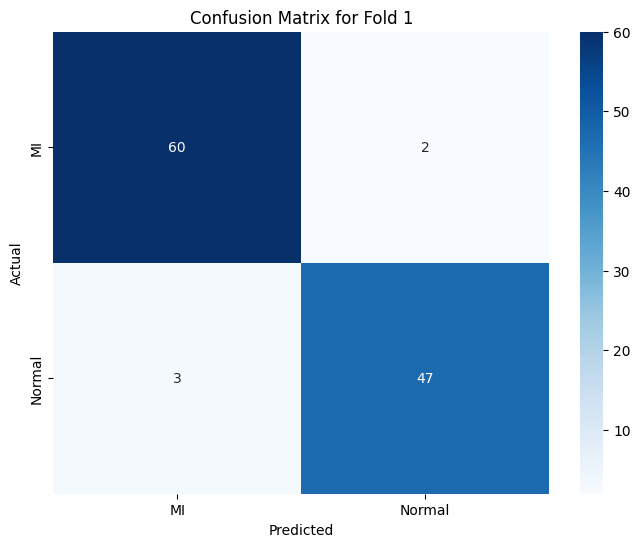

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

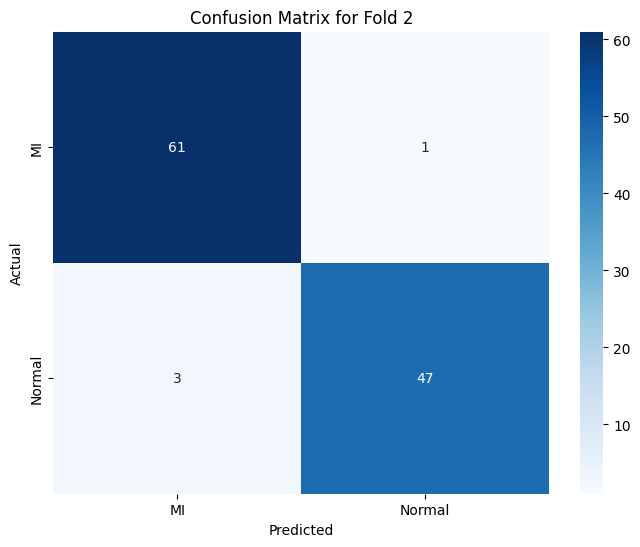

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

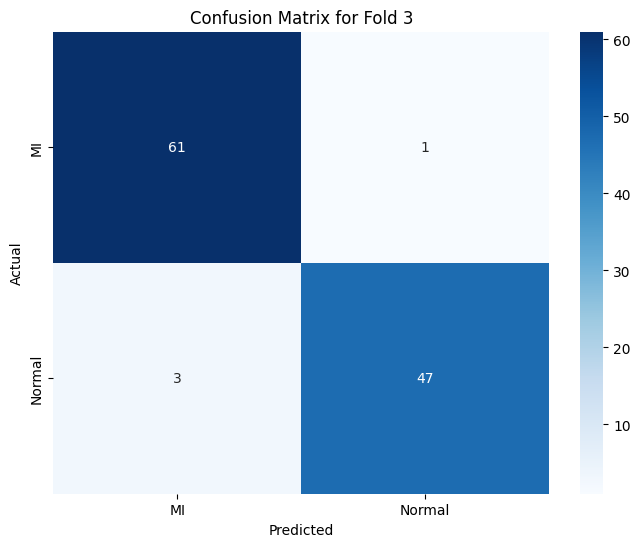

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

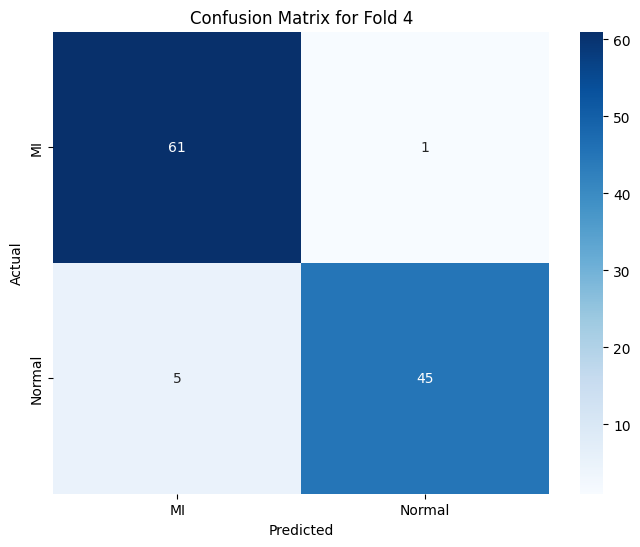

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

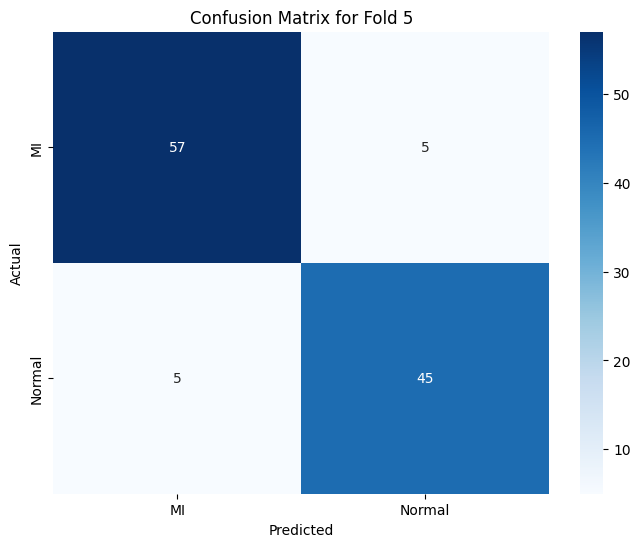

In [ ]:
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan X_test dan y_test adalah dataset yang digunakan untuk evaluasi
# Anda harus mengganti ini dengan data yang sesuai

# Jumlah fold yang digunakan selama cross-validation
n_folds = 5

# # Mapping untuk label
# label_mapping = {'MI': 0, 'Normal': 1}

# # Konversi y_test menjadi integer berdasarkan mapping
# y_test = np.array([label_mapping[label] for label in y_test])

# List untuk menyimpan confusion matrix dari setiap fold
confusion_matrices = []

for fold_no in range(1, n_folds + 1):
    # Membuat path ke model yang disimpan
    model_filename = f'models_tabpfn/tabpfn_model_fold_{fold_no}.pkl'

    # Memuat model
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Prediksi pada data uji
    y_eval, _ = classifier.predict(X_test, return_winning_probability=True)

    # Konversi y_eval menjadi integer berdasarkan mapping
    y_eval = np.array([label_mapping[label] for label in y_eval])

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_eval, labels=[0, 1])
    confusion_matrices.append(cm)

    # Menampilkan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


## Tabnet Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import torch


In [ ]:
# Definisikan parameter grid untuk grid search
param_grid = {
    'max_epochs': [50, 100, 200],
    'patience': [10, 30, 60],
    'batch_size': [128, 256, 512],
    'virtual_batch_size': [64, 128, 256],
    'optimizer_fn': [torch.optim.Adam, torch.optim.SGD],  # Contoh optimizer
    'scheduler_fn': [torch.optim.lr_scheduler.StepLR, torch.optim.lr_scheduler.ReduceLROnPlateau]  # Contoh scheduler
}

In [ ]:
# Definisikan model tanpa parameter
classifier = TabNetClassifier()

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
pip install optuna pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
pip install pytorch-tabnet scikit-learn


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

class TabNetClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer_fn=torch.optim.Adam, scheduler_params=None, scheduler_fn=None,
                 n_d=8, n_a=8, n_steps=3, gamma=1.0, cat_emb_dim=1):
        self.optimizer_fn = optimizer_fn
        self.scheduler_params = scheduler_params
        self.scheduler_fn = scheduler_fn
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.cat_emb_dim = cat_emb_dim

    def fit(self, X, y):
        self.model = TabNetClassifier(
            optimizer_fn=self.optimizer_fn,
            scheduler_params=self.scheduler_params,
            scheduler_fn=self.scheduler_fn,
            n_d=self.n_d,
            n_a=self.n_a,
            n_steps=self.n_steps,
            gamma=self.gamma,
            cat_emb_dim=self.cat_emb_dim
        )
        self.model.fit(X_train=X, y_train=y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch

# Load dataset
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'optimizer_fn': [torch.optim.Adam, torch.optim.SGD],
    'scheduler_params': [{'step_size': 10, 'gamma': 0.9}, {'step_size': 20, 'gamma': 0.8}, {'step_size': 20, 'gamma': 0.6}],
    'scheduler_fn': [torch.optim.lr_scheduler.StepLR, torch.optim.lr_scheduler.ExponentialLR],
    'n_d': [8, 16],
    'n_a': [8, 16],
    'n_steps': [3, 5],
    'gamma': [1.0, 1.2],
    'cat_emb_dim': [1, 2]
}

# Create TabNetClassifierWrapper instance
tabnet_wrapper = TabNetClassifierWrapper()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=tabnet_wrapper, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate on test data
# test_score = grid_search.score(X_test, y_test)
# print(f"Test Score: {test_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
576 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-47-48aabe8b9fa4>", line 28, in fit
  File "/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py", line 244, in fit
    self._set_callbacks(callbacks)
  File "/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py", line 692, in _set_callbacks
    sche

epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import time
import os
import pickle
import torch

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
accuracy_per_fold = []
prediction_time_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tabnet_tuning', exist_ok=True)

for train_index, val_index in kf.split(X_train):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # define the model
    classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                                  scheduler_params={"step_size": 10, "gamma": 0.9},
                                  scheduler_fn=torch.optim.lr_scheduler.StepLR)

    # fit the model
    classifier.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['auc', 'balanced_accuracy'],
        max_epochs=100, patience=60,
        batch_size=8, virtual_batch_size=8,
        num_workers=0,
        weights=1,
        drop_last=False
    )

    # Evaluasi model pada data validasi fold
    start_time = time.time()
    y_eval = classifier.predict(X_val_fold)
    prediction_time = time.time() - start_time

    accuracy = accuracy_score(y_val_fold, y_eval)

    print(f'Prediction time for fold {fold_no}: {prediction_time} seconds')
    print(f'Accuracy for fold {fold_no}: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Simpan model
    model_filename = f'models_tabnet_tuning/tabnet_model_tuning_fold_{fold_no}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(classifier, file)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')


Fold 1


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.74402 | train_auc: 0.6373  | train_balanced_accuracy: 0.59513 | valid_auc: 0.64325 | valid_balanced_accuracy: 0.62642 |  0:00:04s
epoch 1  | loss: 0.69135 | train_auc: 0.68987 | train_balanced_accuracy: 0.61282 | valid_auc: 0.70905 | valid_balanced_accuracy: 0.56804 |  0:00:07s
epoch 2  | loss: 0.6682  | train_auc: 0.65947 | train_balanced_accuracy: 0.59042 | valid_auc: 0.67145 | valid_balanced_accuracy: 0.58733 |  0:00:09s
epoch 3  | loss: 0.65608 | train_auc: 0.75739 | train_balanced_accuracy: 0.69245 | valid_auc: 0.77734 | valid_balanced_accuracy: 0.66972 |  0:00:12s
epoch 4  | loss: 0.60442 | train_auc: 0.79792 | train_balanced_accuracy: 0.69411 | valid_auc: 0.74419 | valid_balanced_accuracy: 0.65611 |  0:00:14s
epoch 5  | loss: 0.67066 | train_auc: 0.8114  | train_balanced_accuracy: 0.69628 | valid_auc: 0.77288 | valid_balanced_accuracy: 0.66576 |  0:00:18s
epoch 6  | loss: 0.64007 | train_auc: 0.73487 | train_balanced_accuracy: 0.66504 | valid_auc: 0.74072 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Prediction time for fold 1: 0.10603761672973633 seconds
Accuracy for fold 1: 86.66666666666667%
Model for fold 1 saved as models_tabnet_tuning/tabnet_model_tuning_fold_1.pkl
Fold 2


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.76227 | train_auc: 0.66173 | train_balanced_accuracy: 0.57371 | valid_auc: 0.6289  | valid_balanced_accuracy: 0.49827 |  0:00:01s
epoch 1  | loss: 0.68026 | train_auc: 0.66958 | train_balanced_accuracy: 0.66105 | valid_auc: 0.53142 | valid_balanced_accuracy: 0.53934 |  0:00:02s
epoch 2  | loss: 0.6919  | train_auc: 0.66307 | train_balanced_accuracy: 0.59795 | valid_auc: 0.60218 | valid_balanced_accuracy: 0.571   |  0:00:03s
epoch 3  | loss: 0.65944 | train_auc: 0.68674 | train_balanced_accuracy: 0.6024  | valid_auc: 0.63187 | valid_balanced_accuracy: 0.59649 |  0:00:04s
epoch 4  | loss: 0.64976 | train_auc: 0.68631 | train_balanced_accuracy: 0.6247  | valid_auc: 0.60564 | valid_balanced_accuracy: 0.53439 |  0:00:05s
epoch 5  | loss: 0.63477 | train_auc: 0.74536 | train_balanced_accuracy: 0.67649 | valid_auc: 0.59401 | valid_balanced_accuracy: 0.56235 |  0:00:07s
epoch 6  | loss: 0.67025 | train_auc: 0.73872 | train_balanced_accuracy: 0.66538 | valid_auc: 0.6096  | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Prediction time for fold 2: 0.07588934898376465 seconds
Accuracy for fold 2: 83.33333333333334%
Model for fold 2 saved as models_tabnet_tuning/tabnet_model_tuning_fold_2.pkl
Fold 3


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.74868 | train_auc: 0.6589  | train_balanced_accuracy: 0.60377 | valid_auc: 0.66468 | valid_balanced_accuracy: 0.58929 |  0:00:01s
epoch 1  | loss: 0.69331 | train_auc: 0.69106 | train_balanced_accuracy: 0.65032 | valid_auc: 0.56399 | valid_balanced_accuracy: 0.57738 |  0:00:02s
epoch 2  | loss: 0.65794 | train_auc: 0.71984 | train_balanced_accuracy: 0.66387 | valid_auc: 0.63988 | valid_balanced_accuracy: 0.64286 |  0:00:03s
epoch 3  | loss: 0.63478 | train_auc: 0.73642 | train_balanced_accuracy: 0.66262 | valid_auc: 0.6751  | valid_balanced_accuracy: 0.64286 |  0:00:04s
epoch 4  | loss: 0.64871 | train_auc: 0.74148 | train_balanced_accuracy: 0.69674 | valid_auc: 0.63145 | valid_balanced_accuracy: 0.6622  |  0:00:05s
epoch 5  | loss: 0.62288 | train_auc: 0.77376 | train_balanced_accuracy: 0.70211 | valid_auc: 0.76935 | valid_balanced_accuracy: 0.71726 |  0:00:07s
epoch 6  | loss: 0.62833 | train_auc: 0.71831 | train_balanced_accuracy: 0.63861 | valid_auc: 0.61111 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Prediction time for fold 3: 0.12091517448425293 seconds
Accuracy for fold 3: 76.66666666666667%
Model for fold 3 saved as models_tabnet_tuning/tabnet_model_tuning_fold_3.pkl
Fold 4


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.75564 | train_auc: 0.58243 | train_balanced_accuracy: 0.57183 | valid_auc: 0.62259 | valid_balanced_accuracy: 0.5656  |  0:00:01s
epoch 1  | loss: 0.69905 | train_auc: 0.51801 | train_balanced_accuracy: 0.49433 | valid_auc: 0.63374 | valid_balanced_accuracy: 0.50684 |  0:00:03s
epoch 2  | loss: 0.69089 | train_auc: 0.65847 | train_balanced_accuracy: 0.6291  | valid_auc: 0.69858 | valid_balanced_accuracy: 0.67882 |  0:00:04s
epoch 3  | loss: 0.71376 | train_auc: 0.73888 | train_balanced_accuracy: 0.68003 | valid_auc: 0.7305  | valid_balanced_accuracy: 0.7001  |  0:00:06s
epoch 4  | loss: 0.68499 | train_auc: 0.78834 | train_balanced_accuracy: 0.69914 | valid_auc: 0.8075  | valid_balanced_accuracy: 0.75152 |  0:00:07s
epoch 5  | loss: 0.67964 | train_auc: 0.78186 | train_balanced_accuracy: 0.69279 | valid_auc: 0.74924 | valid_balanced_accuracy: 0.65831 |  0:00:08s
epoch 6  | loss: 0.65243 | train_auc: 0.62938 | train_balanced_accuracy: 0.56737 | valid_auc: 0.59169 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Prediction time for fold 4: 0.1147758960723877 seconds
Accuracy for fold 4: 82.02247191011236%
Model for fold 4 saved as models_tabnet_tuning/tabnet_model_tuning_fold_4.pkl
Fold 5


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.80739 | train_auc: 0.48672 | train_balanced_accuracy: 0.48822 | valid_auc: 0.65153 | valid_balanced_accuracy: 0.6199  |  0:00:01s
epoch 1  | loss: 0.70136 | train_auc: 0.64057 | train_balanced_accuracy: 0.5938  | valid_auc: 0.69745 | valid_balanced_accuracy: 0.66633 |  0:00:03s
epoch 2  | loss: 0.68331 | train_auc: 0.60845 | train_balanced_accuracy: 0.53439 | valid_auc: 0.65306 | valid_balanced_accuracy: 0.58214 |  0:00:04s
epoch 3  | loss: 0.65748 | train_auc: 0.63073 | train_balanced_accuracy: 0.57932 | valid_auc: 0.73673 | valid_balanced_accuracy: 0.54184 |  0:00:05s
epoch 4  | loss: 0.65974 | train_auc: 0.71345 | train_balanced_accuracy: 0.65606 | valid_auc: 0.56224 | valid_balanced_accuracy: 0.55408 |  0:00:06s
epoch 5  | loss: 0.6055  | train_auc: 0.77094 | train_balanced_accuracy: 0.73678 | valid_auc: 0.74694 | valid_balanced_accuracy: 0.68342 |  0:00:08s
epoch 6  | loss: 0.62893 | train_auc: 0.79477 | train_balanced_accuracy: 0.68496 | valid_auc: 0.79235 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Prediction time for fold 5: 0.0814065933227539 seconds
Accuracy for fold 5: 82.02247191011236%
Model for fold 5 saved as models_tabnet_tuning/tabnet_model_tuning_fold_5.pkl
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Prediction Time: 0.10603761672973633 seconds - Accuracy: 86.66666666666667%
------------------------------------------------------------------------
> Fold 2 - Prediction Time: 0.07588934898376465 seconds - Accuracy: 83.33333333333334%
------------------------------------------------------------------------
> Fold 3 - Prediction Time: 0.12091517448425293 seconds - Accuracy: 76.66666666666667%
------------------------------------------------------------------------
> Fold 4 - Prediction Time: 0.1147758960723877 seconds - Accuracy: 82.02247191011236%
------------------------------------------------------------------------
> Fold 5 - Prediction Time:

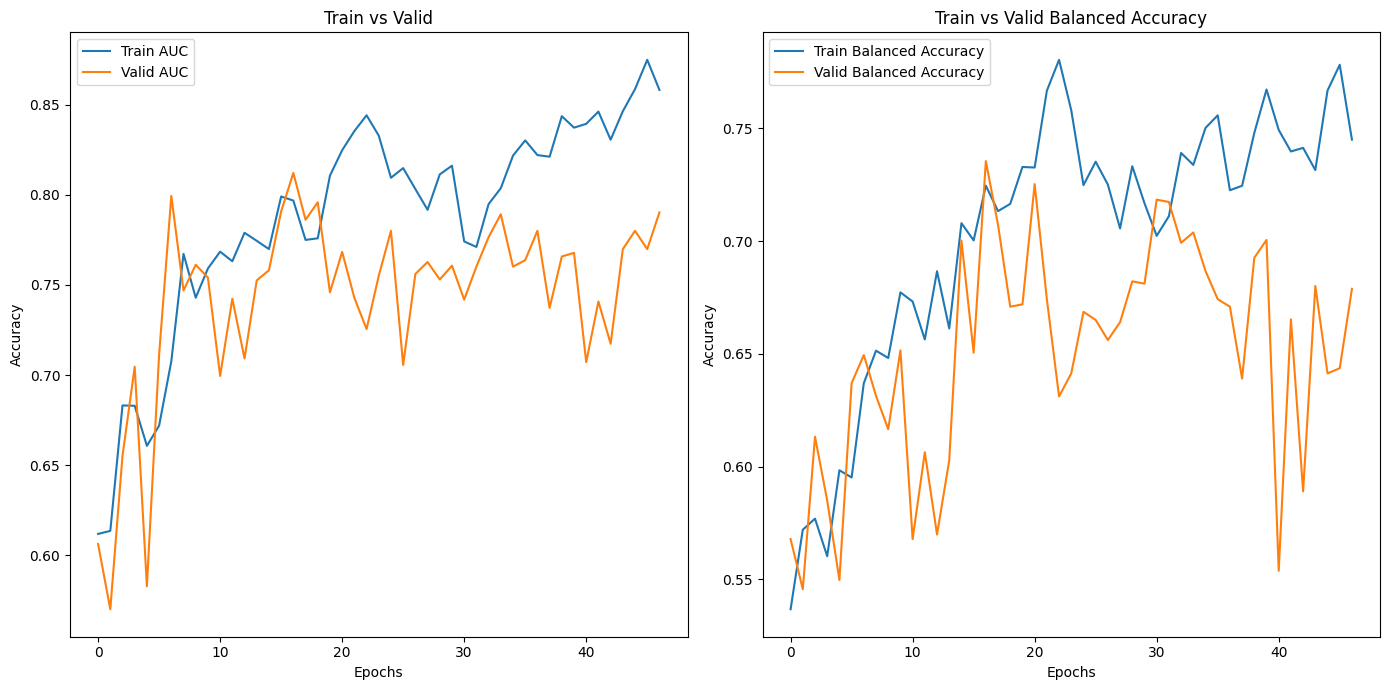

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan riwayat pelatihan dari classifier
history = classifier.history

# Menyiapkan data untuk plot
epochs = list(range(len(history['loss'])))
train_auc = history['train_auc']
valid_auc = history['valid_auc']
train_balanced_accuracy = history['train_balanced_accuracy']
valid_balanced_accuracy = history['valid_balanced_accuracy']

# Membuat plot untuk AUC
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_auc, label='Train AUC')
plt.plot(epochs, valid_auc, label='Valid AUC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Valid')
plt.legend()

# Membuat plot untuk Balanced Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_balanced_accuracy, label='Train Balanced Accuracy')
plt.plot(epochs, valid_balanced_accuracy, label='Valid Balanced Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Valid Balanced Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, classification_report
import shutil

# Jumlah fold yang digunakan selama cross-validation
n_folds = 5

# List untuk menyimpan hasil evaluasi
accuracy_per_fold = []
prediction_time_per_fold = []

# Variabel untuk melacak model dengan akurasi terbaik
best_accuracy = 0.0
best_model_filename = None

for fold_no in range(1, n_folds + 1):
    # Membuat path ke model yang disimpan
    model_filename = f'models_tabnet_tuning/tabnet_model_tuning_fold_{fold_no}.pkl'

    # Memuat model
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Evaluasi model pada data uji
    start_time = time.time()
    y_eval = classifier.predict(X_test)
    prediction_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_eval)
    print(f'Fold {fold_no} - Prediction Time: {prediction_time} seconds - Accuracy: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Cek apakah model saat ini adalah yang terbaik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_filename = model_filename

    # Laporan klasifikasi
    print(f'Classification Report for fold {fold_no}:\n', classification_report(y_test, y_eval, target_names=['MI', 'Normal']))

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')

# Menyimpan model dengan akurasi terbaik
if best_model_filename:
    shutil.copy(best_model_filename, 'model_best.pkl')
    print(f'Model with the best accuracy saved as model_best.pkl with accuracy: {best_accuracy * 100}%')


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 1 - Prediction Time: 0.043647050857543945 seconds - Accuracy: 87.5%
Classification Report for fold 1:
               precision    recall  f1-score   support

          MI       0.88      0.90      0.89        62
      Normal       0.88      0.84      0.86        50

    accuracy                           0.88       112
   macro avg       0.88      0.87      0.87       112
weighted avg       0.88      0.88      0.87       112

Fold 2 - Prediction Time: 0.04948997497558594 seconds - Accuracy: 86.60714285714286%
Classification Report for fold 2:
               precision    recall  f1-score   support

          MI       0.89      0.87      0.88        62
      Normal       0.84      0.86      0.85        50

    accuracy                           0.87       112
   macro avg       0.86      0.87      0.86       112
weighted avg       0.87      0.87      0.87       112



/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/usr/local/lib/python3.10/dist-p

Fold 3 - Prediction Time: 0.03771042823791504 seconds - Accuracy: 88.39285714285714%
Classification Report for fold 3:
               precision    recall  f1-score   support

          MI       0.90      0.89      0.89        62
      Normal       0.86      0.88      0.87        50

    accuracy                           0.88       112
   macro avg       0.88      0.88      0.88       112
weighted avg       0.88      0.88      0.88       112

Fold 4 - Prediction Time: 0.04410839080810547 seconds - Accuracy: 83.92857142857143%
Classification Report for fold 4:
               precision    recall  f1-score   support

          MI       0.85      0.85      0.85        62
      Normal       0.82      0.82      0.82        50

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112

Fold 5 - Prediction Time: 0.03896379470825195 seconds - Accuracy: 70.53571428571429%
Classification Report

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


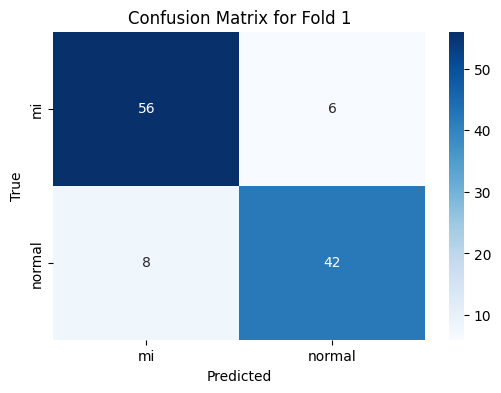

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


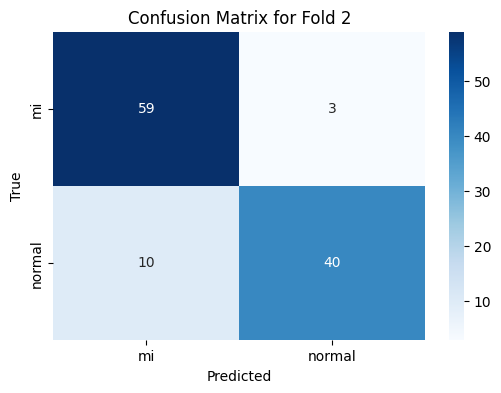

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


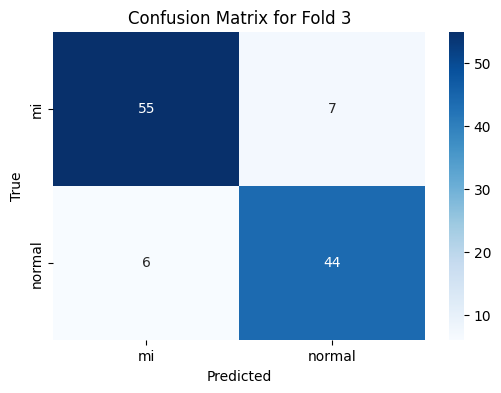

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


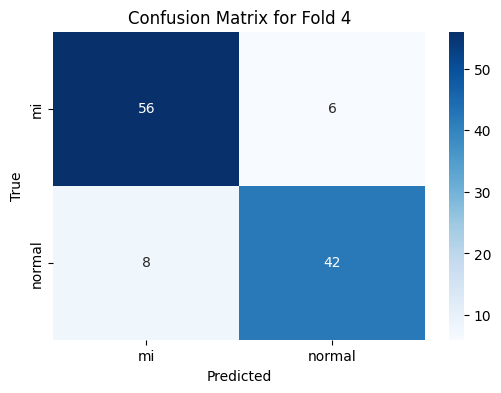

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


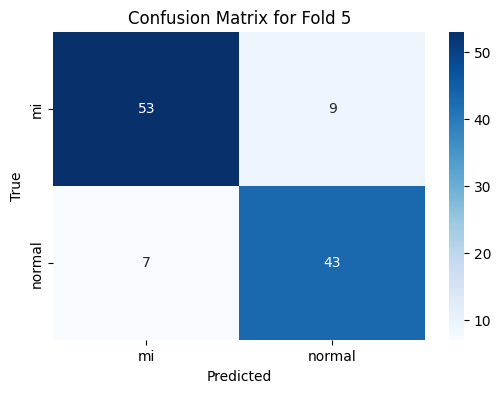

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

def plot_confusion_matrix(y_true, y_pred, fold_no):
    # Menghitung Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Label yang ingin digunakan
    labels = ['mi', 'normal']

    # Membuat visualisasi Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    # Menambahkan judul dan label
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Menampilkan Confusion Matrix
    plt.show()

# Mengganti 'models_tabnet/tabnet_model_fold_{fold_no}.pkl' dengan nomor fold yang sesuai
for fold_no in range(1, 6):
    # Memuat model yang telah disimpan
    model_filename = f'models_tabnet_tuning/tabnet_model_tuning_fold_{fold_no}.pkl'
    with open(model_filename, 'rb') as file:
        classifier = pickle.load(file)

    # Melakukan prediksi pada data test
    y_test_pred = classifier.predict(X_test)

    # Tampilkan Confusion Matrix untuk fold ini
    plot_confusion_matrix(y_test, y_test_pred, fold_no)


## Tabnet Tuning 2

In [ ]:
# Definisikan parameter grid untuk grid search
param_grid = {
    'max_epochs': [50, 100, 200],
    'batch_size': [128, 256, 512]
}

In [ ]:
# Definisikan model tanpa parameter
classifier = TabNetClassifier()

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    # Mendapatkan parameter dari Optuna trial
    max_epochs = trial.suggest_int('max_epochs', 50, 200)
    batch_size = trial.suggest_categorical('batch_size', [64, 128, 256, 512])

    # Inisialisasi model
    model = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        n_d=8,
        n_a=8,
        n_steps=3,
        gamma=1.0,
        cat_emb_dim=1
    )

    # Fit model
    model.fit(
        X_train=X_train, y_train=y_train,
        max_epochs=max_epochs,
        batch_size=batch_size,
        virtual_batch_size=batch_size,
        num_workers=0,
        weights=1,
        drop_last=False
    )

    # Predict dan evaluasi
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Load dataset
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df_combine_scaled.drop('Label', axis=1).values
y = df_combine_scaled['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters
print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")


[I 2024-09-14 03:12:16,309] A new study created in memory with name: no-name-3522417f-ba97-4cb6-b673-4cf2c58574c7
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86377 |  0:00:00s
epoch 1  | loss: 0.87467 |  0:00:00s
epoch 2  | loss: 0.83459 |  0:00:00s
epoch 3  | loss: 0.69931 |  0:00:00s
epoch 4  | loss: 0.71759 |  0:00:00s
epoch 5  | loss: 0.64461 |  0:00:00s
epoch 6  | loss: 0.66545 |  0:00:01s
epoch 7  | loss: 0.68045 |  0:00:01s
epoch 8  | loss: 0.67358 |  0:00:01s
epoch 9  | loss: 0.63029 |  0:00:01s
epoch 10 | loss: 0.6114  |  0:00:01s
epoch 11 | loss: 0.65034 |  0:00:01s
epoch 12 | loss: 0.65314 |  0:00:01s
epoch 13 | loss: 0.59441 |  0:00:01s
epoch 14 | loss: 0.64169 |  0:00:02s
epoch 15 | loss: 0.60948 |  0:00:02s
epoch 16 | loss: 0.59451 |  0:00:02s
epoch 17 | loss: 0.59478 |  0:00:02s
epoch 18 | loss: 0.55682 |  0:00:02s
epoch 19 | loss: 0.52278 |  0:00:02s
epoch 20 | loss: 0.5532  |  0:00:02s
epoch 21 | loss: 0.56151 |  0:00:02s
epoch 22 | loss: 0.51652 |  0:00:02s
epoch 23 | loss: 0.51358 |  0:00:03s
epoch 24 | loss: 0.52832 |  0:00:03s
epoch 25 | loss: 0.55771 |  0:00:03s
epoch 26 | loss: 0.55079 |  0:00:03s
e

[I 2024-09-14 03:12:33,358] Trial 0 finished with value: 0.875 and parameters: {'max_epochs': 150, 'batch_size': 512}. Best is trial 0 with value: 0.875.


epoch 149| loss: 0.13673 |  0:00:16s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82191 |  0:00:00s
epoch 1  | loss: 0.72173 |  0:00:00s
epoch 2  | loss: 0.67592 |  0:00:00s
epoch 3  | loss: 0.66565 |  0:00:01s
epoch 4  | loss: 0.63114 |  0:00:01s
epoch 5  | loss: 0.62966 |  0:00:01s
epoch 6  | loss: 0.62024 |  0:00:01s
epoch 7  | loss: 0.57549 |  0:00:02s
epoch 8  | loss: 0.58244 |  0:00:02s
epoch 9  | loss: 0.55507 |  0:00:02s
epoch 10 | loss: 0.55508 |  0:00:03s
epoch 11 | loss: 0.57637 |  0:00:03s
epoch 12 | loss: 0.47675 |  0:00:03s
epoch 13 | loss: 0.51622 |  0:00:03s
epoch 14 | loss: 0.4972  |  0:00:04s
epoch 15 | loss: 0.47187 |  0:00:04s
epoch 16 | loss: 0.4594  |  0:00:04s
epoch 17 | loss: 0.49535 |  0:00:04s
epoch 18 | loss: 0.48262 |  0:00:04s
epoch 19 | loss: 0.50009 |  0:00:04s
epoch 20 | loss: 0.48036 |  0:00:05s
epoch 21 | loss: 0.4967  |  0:00:05s
epoch 22 | loss: 0.45624 |  0:00:05s
epoch 23 | loss: 0.45687 |  0:00:05s
epoch 24 | loss: 0.47137 |  0:00:05s
epoch 25 | loss: 0.42747 |  0:00:05s
epoch 26 | loss: 0.41855 |  0:00:06s
e

[I 2024-09-14 03:12:45,469] Trial 1 finished with value: 0.8660714285714286 and parameters: {'max_epochs': 90, 'batch_size': 128}. Best is trial 0 with value: 0.875.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:12:58,135] Trial 2 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 78, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86377 |  0:00:00s
epoch 1  | loss: 0.87467 |  0:00:00s
epoch 2  | loss: 0.83459 |  0:00:00s
epoch 3  | loss: 0.69931 |  0:00:00s
epoch 4  | loss: 0.71759 |  0:00:00s
epoch 5  | loss: 0.64461 |  0:00:00s
epoch 6  | loss: 0.66545 |  0:00:00s
epoch 7  | loss: 0.68045 |  0:00:00s
epoch 8  | loss: 0.67358 |  0:00:00s
epoch 9  | loss: 0.63029 |  0:00:00s
epoch 10 | loss: 0.6114  |  0:00:00s
epoch 11 | loss: 0.65034 |  0:00:00s
epoch 12 | loss: 0.65314 |  0:00:00s
epoch 13 | loss: 0.59441 |  0:00:00s
epoch 14 | loss: 0.64169 |  0:00:00s
epoch 15 | loss: 0.60948 |  0:00:00s
epoch 16 | loss: 0.59451 |  0:00:00s
epoch 17 | loss: 0.59478 |  0:00:00s
epoch 18 | loss: 0.55682 |  0:00:00s
epoch 19 | loss: 0.52278 |  0:00:00s
epoch 20 | loss: 0.5532  |  0:00:00s
epoch 21 | loss: 0.56151 |  0:00:00s
epoch 22 | loss: 0.51652 |  0:00:00s
epoch 23 | loss: 0.51358 |  0:00:00s
epoch 24 | loss: 0.52832 |  0:00:00s
epoch 25 | loss: 0.55771 |  0:00:00s
epoch 26 | loss: 0.55079 |  0:00:00s
e

[I 2024-09-14 03:13:02,189] Trial 3 finished with value: 0.7857142857142857 and parameters: {'max_epochs': 123, 'batch_size': 512}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:02s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:13:30,637] Trial 4 finished with value: 0.9107142857142857 and parameters: {'max_epochs': 194, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85431 |  0:00:00s
epoch 1  | loss: 0.78994 |  0:00:00s
epoch 2  | loss: 0.76107 |  0:00:00s
epoch 3  | loss: 0.68854 |  0:00:00s
epoch 4  | loss: 0.68873 |  0:00:00s
epoch 5  | loss: 0.6978  |  0:00:00s
epoch 6  | loss: 0.64944 |  0:00:00s
epoch 7  | loss: 0.62294 |  0:00:00s
epoch 8  | loss: 0.65341 |  0:00:00s
epoch 9  | loss: 0.59011 |  0:00:00s
epoch 10 | loss: 0.58132 |  0:00:00s
epoch 11 | loss: 0.6033  |  0:00:00s
epoch 12 | loss: 0.55501 |  0:00:00s
epoch 13 | loss: 0.57461 |  0:00:00s
epoch 14 | loss: 0.53243 |  0:00:00s
epoch 15 | loss: 0.48087 |  0:00:00s
epoch 16 | loss: 0.50111 |  0:00:00s
epoch 17 | loss: 0.52348 |  0:00:00s
epoch 18 | loss: 0.47823 |  0:00:00s
epoch 19 | loss: 0.50888 |  0:00:00s
epoch 20 | loss: 0.48188 |  0:00:00s
epoch 21 | loss: 0.45297 |  0:00:01s
epoch 22 | loss: 0.48848 |  0:00:01s
epoch 23 | loss: 0.50711 |  0:00:01s
epoch 24 | loss: 0.44346 |  0:00:01s
epoch 25 | loss: 0.42454 |  0:00:01s
epoch 26 | loss: 0.44134 |  0:00:01s
e

[I 2024-09-14 03:13:35,967] Trial 5 finished with value: 0.8214285714285714 and parameters: {'max_epochs': 113, 'batch_size': 256}. Best is trial 2 with value: 0.9285714285714286.


epoch 110| loss: 0.28992 |  0:00:05s
epoch 111| loss: 0.2732  |  0:00:05s
epoch 112| loss: 0.18068 |  0:00:05s
epoch 0  | loss: 0.85431 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.78994 |  0:00:00s
epoch 2  | loss: 0.76107 |  0:00:00s
epoch 3  | loss: 0.68854 |  0:00:00s
epoch 4  | loss: 0.68873 |  0:00:00s
epoch 5  | loss: 0.6978  |  0:00:00s
epoch 6  | loss: 0.64944 |  0:00:00s
epoch 7  | loss: 0.62294 |  0:00:00s
epoch 8  | loss: 0.65341 |  0:00:00s
epoch 9  | loss: 0.59011 |  0:00:00s
epoch 10 | loss: 0.58132 |  0:00:00s
epoch 11 | loss: 0.6033  |  0:00:00s
epoch 12 | loss: 0.55501 |  0:00:00s
epoch 13 | loss: 0.57461 |  0:00:00s
epoch 14 | loss: 0.53243 |  0:00:00s
epoch 15 | loss: 0.48087 |  0:00:00s
epoch 16 | loss: 0.50111 |  0:00:00s
epoch 17 | loss: 0.52348 |  0:00:00s
epoch 18 | loss: 0.47823 |  0:00:00s
epoch 19 | loss: 0.50888 |  0:00:00s
epoch 20 | loss: 0.48188 |  0:00:00s
epoch 21 | loss: 0.45297 |  0:00:01s
epoch 22 | loss: 0.48848 |  0:00:01s
epoch 23 | loss: 0.50711 |  0:00:01s
epoch 24 | loss: 0.44346 |  0:00:01s
epoch 25 | loss: 0.42454 |  0:00:01s
epoch 26 | loss: 0.44134 |  0:00:01s
epoch 27 | loss: 0.43206 |  0:00:01s
e

[I 2024-09-14 03:13:45,071] Trial 6 finished with value: 0.8660714285714286 and parameters: {'max_epochs': 174, 'batch_size': 256}. Best is trial 2 with value: 0.9285714285714286.


epoch 173| loss: 0.19217 |  0:00:09s
epoch 0  | loss: 0.82191 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.72173 |  0:00:00s
epoch 2  | loss: 0.67592 |  0:00:00s
epoch 3  | loss: 0.66565 |  0:00:00s
epoch 4  | loss: 0.63114 |  0:00:00s
epoch 5  | loss: 0.62966 |  0:00:00s
epoch 6  | loss: 0.62024 |  0:00:00s
epoch 7  | loss: 0.57549 |  0:00:00s
epoch 8  | loss: 0.58244 |  0:00:00s
epoch 9  | loss: 0.55507 |  0:00:00s
epoch 10 | loss: 0.55508 |  0:00:00s
epoch 11 | loss: 0.57637 |  0:00:00s
epoch 12 | loss: 0.47675 |  0:00:01s
epoch 13 | loss: 0.51622 |  0:00:01s
epoch 14 | loss: 0.4972  |  0:00:01s
epoch 15 | loss: 0.47187 |  0:00:01s
epoch 16 | loss: 0.4594  |  0:00:01s
epoch 17 | loss: 0.49535 |  0:00:01s
epoch 18 | loss: 0.48262 |  0:00:01s
epoch 19 | loss: 0.50009 |  0:00:01s
epoch 20 | loss: 0.48036 |  0:00:01s
epoch 21 | loss: 0.4967  |  0:00:01s
epoch 22 | loss: 0.45624 |  0:00:01s
epoch 23 | loss: 0.45687 |  0:00:01s
epoch 24 | loss: 0.47137 |  0:00:02s
epoch 25 | loss: 0.42747 |  0:00:02s
epoch 26 | loss: 0.41855 |  0:00:02s
epoch 27 | loss: 0.45888 |  0:00:02s
e

[I 2024-09-14 03:13:59,316] Trial 7 finished with value: 0.9017857142857143 and parameters: {'max_epochs': 159, 'batch_size': 128}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86377 |  0:00:00s
epoch 1  | loss: 0.87467 |  0:00:00s
epoch 2  | loss: 0.83459 |  0:00:00s
epoch 3  | loss: 0.69931 |  0:00:00s
epoch 4  | loss: 0.71759 |  0:00:00s
epoch 5  | loss: 0.64461 |  0:00:00s
epoch 6  | loss: 0.66545 |  0:00:00s
epoch 7  | loss: 0.68045 |  0:00:00s
epoch 8  | loss: 0.67358 |  0:00:00s
epoch 9  | loss: 0.63029 |  0:00:00s
epoch 10 | loss: 0.6114  |  0:00:00s
epoch 11 | loss: 0.65034 |  0:00:00s
epoch 12 | loss: 0.65314 |  0:00:00s
epoch 13 | loss: 0.59441 |  0:00:00s
epoch 14 | loss: 0.64169 |  0:00:00s
epoch 15 | loss: 0.60948 |  0:00:00s
epoch 16 | loss: 0.59451 |  0:00:00s
epoch 17 | loss: 0.59478 |  0:00:00s
epoch 18 | loss: 0.55682 |  0:00:00s
epoch 19 | loss: 0.52278 |  0:00:00s
epoch 20 | loss: 0.5532  |  0:00:00s
epoch 21 | loss: 0.56151 |  0:00:00s
epoch 22 | loss: 0.51652 |  0:00:00s
epoch 23 | loss: 0.51358 |  0:00:00s
epoch 24 | loss: 0.52832 |  0:00:00s
epoch 25 | loss: 0.55771 |  0:00:00s
epoch 26 | loss: 0.55079 |  0:00:00s
e

[I 2024-09-14 03:14:04,756] Trial 8 finished with value: 0.7946428571428571 and parameters: {'max_epochs': 124, 'batch_size': 512}. Best is trial 2 with value: 0.9285714285714286.


epoch 121| loss: 0.26873 |  0:00:05s
epoch 122| loss: 0.15285 |  0:00:05s
epoch 123| loss: 0.21544 |  0:00:05s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:14:31,011] Trial 9 finished with value: 0.8839285714285714 and parameters: {'max_epochs': 180, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:14:39,847] Trial 10 finished with value: 0.7857142857142857 and parameters: {'max_epochs': 57, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 55 | loss: 0.3082  |  0:00:08s
epoch 56 | loss: 0.31053 |  0:00:08s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:15:11,994] Trial 11 finished with value: 0.9196428571428571 and parameters: {'max_epochs': 200, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 199| loss: 0.0903  |  0:00:32s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:04s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:15:21,849] Trial 12 finished with value: 0.9107142857142857 and parameters: {'max_epochs': 64, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 62 | loss: 0.32954 |  0:00:09s
epoch 63 | loss: 0.26833 |  0:00:09s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:15:35,674] Trial 13 finished with value: 0.9196428571428571 and parameters: {'max_epochs': 95, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:15:48,432] Trial 14 finished with value: 0.875 and parameters: {'max_epochs': 85, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 84 | loss: 0.24981 |  0:00:12s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:01s
epoch 4  | loss: 0.59955 |  0:00:01s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:02s
epoch 8  | loss: 0.55139 |  0:00:02s
epoch 9  | loss: 0.4979  |  0:00:02s
epoch 10 | loss: 0.51376 |  0:00:02s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:03s
epoch 16 | loss: 0.49144 |  0:00:03s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:04s
epoch 23 | loss: 0.50408 |  0:00:04s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:16:11,375] Trial 15 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 145, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:16:32,572] Trial 16 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 148, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 147| loss: 0.18274 |  0:00:21s
epoch 0  | loss: 0.85431 |  0:00:00s
epoch 1  | loss: 0.78994 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 2  | loss: 0.76107 |  0:00:00s
epoch 3  | loss: 0.68854 |  0:00:00s
epoch 4  | loss: 0.68873 |  0:00:00s
epoch 5  | loss: 0.6978  |  0:00:00s
epoch 6  | loss: 0.64944 |  0:00:00s
epoch 7  | loss: 0.62294 |  0:00:00s
epoch 8  | loss: 0.65341 |  0:00:00s
epoch 9  | loss: 0.59011 |  0:00:00s
epoch 10 | loss: 0.58132 |  0:00:00s
epoch 11 | loss: 0.6033  |  0:00:00s
epoch 12 | loss: 0.55501 |  0:00:00s
epoch 13 | loss: 0.57461 |  0:00:00s
epoch 14 | loss: 0.53243 |  0:00:00s
epoch 15 | loss: 0.48087 |  0:00:01s
epoch 16 | loss: 0.50111 |  0:00:01s
epoch 17 | loss: 0.52348 |  0:00:01s
epoch 18 | loss: 0.47823 |  0:00:01s
epoch 19 | loss: 0.50888 |  0:00:01s
epoch 20 | loss: 0.48188 |  0:00:01s
epoch 21 | loss: 0.45297 |  0:00:01s
epoch 22 | loss: 0.48848 |  0:00:01s
epoch 23 | loss: 0.50711 |  0:00:01s
epoch 24 | loss: 0.44346 |  0:00:01s
epoch 25 | loss: 0.42454 |  0:00:01s
epoch 26 | loss: 0.44134 |  0:00:01s
epoch 27 | loss: 0.43206 |  0:00:01s
epoch 28 | loss: 0.42171 |  0:00:01s
e

[I 2024-09-14 03:16:38,734] Trial 17 finished with value: 0.8571428571428571 and parameters: {'max_epochs': 106, 'batch_size': 256}. Best is trial 2 with value: 0.9285714285714286.


epoch 103| loss: 0.27129 |  0:00:05s
epoch 104| loss: 0.24479 |  0:00:06s
epoch 105| loss: 0.27555 |  0:00:06s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82191 |  0:00:00s
epoch 1  | loss: 0.72173 |  0:00:00s
epoch 2  | loss: 0.67592 |  0:00:00s
epoch 3  | loss: 0.66565 |  0:00:00s
epoch 4  | loss: 0.63114 |  0:00:00s
epoch 5  | loss: 0.62966 |  0:00:00s
epoch 6  | loss: 0.62024 |  0:00:00s
epoch 7  | loss: 0.57549 |  0:00:00s
epoch 8  | loss: 0.58244 |  0:00:00s
epoch 9  | loss: 0.55507 |  0:00:00s
epoch 10 | loss: 0.55508 |  0:00:00s
epoch 11 | loss: 0.57637 |  0:00:01s
epoch 12 | loss: 0.47675 |  0:00:01s
epoch 13 | loss: 0.51622 |  0:00:01s
epoch 14 | loss: 0.4972  |  0:00:01s
epoch 15 | loss: 0.47187 |  0:00:01s
epoch 16 | loss: 0.4594  |  0:00:01s
epoch 17 | loss: 0.49535 |  0:00:01s
epoch 18 | loss: 0.48262 |  0:00:01s
epoch 19 | loss: 0.50009 |  0:00:01s
epoch 20 | loss: 0.48036 |  0:00:01s
epoch 21 | loss: 0.4967  |  0:00:01s
epoch 22 | loss: 0.45624 |  0:00:02s
epoch 23 | loss: 0.45687 |  0:00:02s
epoch 24 | loss: 0.47137 |  0:00:02s
epoch 25 | loss: 0.42747 |  0:00:02s
epoch 26 | loss: 0.41855 |  0:00:02s
e

[I 2024-09-14 03:16:45,211] Trial 18 finished with value: 0.8214285714285714 and parameters: {'max_epochs': 75, 'batch_size': 128}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:03s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:04s
epoch 22 | loss: 0.46345 |  0:00:04s
epoch 23 | loss: 0.50408 |  0:00:04s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:17:07,236] Trial 19 finished with value: 0.9196428571428571 and parameters: {'max_epochs': 138, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:17:23,020] Trial 20 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 107, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 106| loss: 0.17439 |  0:00:15s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:17:44,956] Trial 21 finished with value: 0.9107142857142857 and parameters: {'max_epochs': 143, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.


epoch 142| loss: 0.15694 |  0:00:21s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:18:09,089] Trial 22 finished with value: 0.8928571428571429 and parameters: {'max_epochs': 162, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:18:28,732] Trial 23 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 134, 'batch_size': 64}. Best is trial 2 with value: 0.9285714285714286.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:04s
epoch 22 | loss: 0.46345 |  0:00:04s
epoch 23 | loss: 0.50408 |  0:00:04s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:05s
e

[I 2024-09-14 03:18:53,205] Trial 24 finished with value: 0.9464285714285714 and parameters: {'max_epochs': 154, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:19:29,374] Trial 25 finished with value: 0.9017857142857143 and parameters: {'max_epochs': 175, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82191 |  0:00:00s
epoch 1  | loss: 0.72173 |  0:00:00s
epoch 2  | loss: 0.67592 |  0:00:00s
epoch 3  | loss: 0.66565 |  0:00:00s
epoch 4  | loss: 0.63114 |  0:00:00s
epoch 5  | loss: 0.62966 |  0:00:00s
epoch 6  | loss: 0.62024 |  0:00:00s
epoch 7  | loss: 0.57549 |  0:00:00s
epoch 8  | loss: 0.58244 |  0:00:00s
epoch 9  | loss: 0.55507 |  0:00:00s
epoch 10 | loss: 0.55508 |  0:00:00s
epoch 11 | loss: 0.57637 |  0:00:00s
epoch 12 | loss: 0.47675 |  0:00:01s
epoch 13 | loss: 0.51622 |  0:00:01s
epoch 14 | loss: 0.4972  |  0:00:01s
epoch 15 | loss: 0.47187 |  0:00:01s
epoch 16 | loss: 0.4594  |  0:00:01s
epoch 17 | loss: 0.49535 |  0:00:01s
epoch 18 | loss: 0.48262 |  0:00:01s
epoch 19 | loss: 0.50009 |  0:00:01s
epoch 20 | loss: 0.48036 |  0:00:01s
epoch 21 | loss: 0.4967  |  0:00:01s
epoch 22 | loss: 0.45624 |  0:00:01s
epoch 23 | loss: 0.45687 |  0:00:02s
epoch 24 | loss: 0.47137 |  0:00:02s
epoch 25 | loss: 0.42747 |  0:00:02s
epoch 26 | loss: 0.41855 |  0:00:02s
e

[I 2024-09-14 03:19:47,188] Trial 26 finished with value: 0.8928571428571429 and parameters: {'max_epochs': 160, 'batch_size': 128}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85431 |  0:00:00s
epoch 1  | loss: 0.78994 |  0:00:00s
epoch 2  | loss: 0.76107 |  0:00:00s
epoch 3  | loss: 0.68854 |  0:00:00s
epoch 4  | loss: 0.68873 |  0:00:00s
epoch 5  | loss: 0.6978  |  0:00:00s
epoch 6  | loss: 0.64944 |  0:00:00s
epoch 7  | loss: 0.62294 |  0:00:00s
epoch 8  | loss: 0.65341 |  0:00:00s
epoch 9  | loss: 0.59011 |  0:00:00s
epoch 10 | loss: 0.58132 |  0:00:00s
epoch 11 | loss: 0.6033  |  0:00:00s
epoch 12 | loss: 0.55501 |  0:00:00s
epoch 13 | loss: 0.57461 |  0:00:00s
epoch 14 | loss: 0.53243 |  0:00:00s
epoch 15 | loss: 0.48087 |  0:00:00s
epoch 16 | loss: 0.50111 |  0:00:00s
epoch 17 | loss: 0.52348 |  0:00:00s
epoch 18 | loss: 0.47823 |  0:00:00s
epoch 19 | loss: 0.50888 |  0:00:00s
epoch 20 | loss: 0.48188 |  0:00:01s
epoch 21 | loss: 0.45297 |  0:00:01s
epoch 22 | loss: 0.48848 |  0:00:01s
epoch 23 | loss: 0.50711 |  0:00:01s
epoch 24 | loss: 0.44346 |  0:00:01s
epoch 25 | loss: 0.42454 |  0:00:01s
epoch 26 | loss: 0.44134 |  0:00:01s
e

[I 2024-09-14 03:19:50,782] Trial 27 finished with value: 0.8392857142857143 and parameters: {'max_epochs': 73, 'batch_size': 256}. Best is trial 24 with value: 0.9464285714285714.


epoch 69 | loss: 0.36106 |  0:00:03s
epoch 70 | loss: 0.27298 |  0:00:03s
epoch 71 | loss: 0.24984 |  0:00:03s
epoch 72 | loss: 0.28263 |  0:00:03s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86377 |  0:00:00s
epoch 1  | loss: 0.87467 |  0:00:00s
epoch 2  | loss: 0.83459 |  0:00:00s
epoch 3  | loss: 0.69931 |  0:00:00s
epoch 4  | loss: 0.71759 |  0:00:00s
epoch 5  | loss: 0.64461 |  0:00:00s
epoch 6  | loss: 0.66545 |  0:00:00s
epoch 7  | loss: 0.68045 |  0:00:00s
epoch 8  | loss: 0.67358 |  0:00:00s
epoch 9  | loss: 0.63029 |  0:00:00s
epoch 10 | loss: 0.6114  |  0:00:00s
epoch 11 | loss: 0.65034 |  0:00:00s
epoch 12 | loss: 0.65314 |  0:00:00s
epoch 13 | loss: 0.59441 |  0:00:00s
epoch 14 | loss: 0.64169 |  0:00:00s
epoch 15 | loss: 0.60948 |  0:00:00s
epoch 16 | loss: 0.59451 |  0:00:00s
epoch 17 | loss: 0.59478 |  0:00:00s
epoch 18 | loss: 0.55682 |  0:00:00s
epoch 19 | loss: 0.52278 |  0:00:00s
epoch 20 | loss: 0.5532  |  0:00:00s
epoch 21 | loss: 0.56151 |  0:00:00s
epoch 22 | loss: 0.51652 |  0:00:00s
epoch 23 | loss: 0.51358 |  0:00:00s
epoch 24 | loss: 0.52832 |  0:00:00s
epoch 25 | loss: 0.55771 |  0:00:00s
epoch 26 | loss: 0.55079 |  0:00:00s
e

[I 2024-09-14 03:19:55,349] Trial 28 finished with value: 0.8035714285714286 and parameters: {'max_epochs': 133, 'batch_size': 512}. Best is trial 24 with value: 0.9464285714285714.


epoch 131| loss: 0.15922 |  0:00:04s
epoch 132| loss: 0.20517 |  0:00:04s
epoch 0  | loss: 0.86377 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.87467 |  0:00:00s
epoch 2  | loss: 0.83459 |  0:00:00s
epoch 3  | loss: 0.69931 |  0:00:00s
epoch 4  | loss: 0.71759 |  0:00:00s
epoch 5  | loss: 0.64461 |  0:00:00s
epoch 6  | loss: 0.66545 |  0:00:00s
epoch 7  | loss: 0.68045 |  0:00:00s
epoch 8  | loss: 0.67358 |  0:00:00s
epoch 9  | loss: 0.63029 |  0:00:00s
epoch 10 | loss: 0.6114  |  0:00:00s
epoch 11 | loss: 0.65034 |  0:00:00s
epoch 12 | loss: 0.65314 |  0:00:00s
epoch 13 | loss: 0.59441 |  0:00:00s
epoch 14 | loss: 0.64169 |  0:00:00s
epoch 15 | loss: 0.60948 |  0:00:00s
epoch 16 | loss: 0.59451 |  0:00:00s
epoch 17 | loss: 0.59478 |  0:00:00s
epoch 18 | loss: 0.55682 |  0:00:00s
epoch 19 | loss: 0.52278 |  0:00:00s
epoch 20 | loss: 0.5532  |  0:00:00s
epoch 21 | loss: 0.56151 |  0:00:00s
epoch 22 | loss: 0.51652 |  0:00:01s
epoch 23 | loss: 0.51358 |  0:00:01s
epoch 24 | loss: 0.52832 |  0:00:01s
epoch 25 | loss: 0.55771 |  0:00:01s
epoch 26 | loss: 0.55079 |  0:00:01s
epoch 27 | loss: 0.53518 |  0:00:01s
e

[I 2024-09-14 03:20:00,806] Trial 29 finished with value: 0.8303571428571429 and parameters: {'max_epochs': 157, 'batch_size': 512}. Best is trial 24 with value: 0.9464285714285714.


epoch 156| loss: 0.1187  |  0:00:05s
epoch 0  | loss: 0.76789 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
epoch 27 | loss: 0.46816 |  0:00:03s
e

[I 2024-09-14 03:20:17,737] Trial 30 finished with value: 0.9196428571428571 and parameters: {'max_epochs': 116, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:20:40,082] Trial 31 finished with value: 0.9017857142857143 and parameters: {'max_epochs': 147, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 146| loss: 0.11621 |  0:00:22s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:21:01,267] Trial 32 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 145, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 144| loss: 0.14562 |  0:00:21s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:01s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:02s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:21:24,906] Trial 33 finished with value: 0.9107142857142857 and parameters: {'max_epochs': 152, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 150| loss: 0.16561 |  0:00:23s
epoch 151| loss: 0.20102 |  0:00:23s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:21:49,852] Trial 34 finished with value: 0.9464285714285714 and parameters: {'max_epochs': 167, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82191 |  0:00:00s
epoch 1  | loss: 0.72173 |  0:00:00s
epoch 2  | loss: 0.67592 |  0:00:00s
epoch 3  | loss: 0.66565 |  0:00:00s
epoch 4  | loss: 0.63114 |  0:00:00s
epoch 5  | loss: 0.62966 |  0:00:00s
epoch 6  | loss: 0.62024 |  0:00:00s
epoch 7  | loss: 0.57549 |  0:00:00s
epoch 8  | loss: 0.58244 |  0:00:00s
epoch 9  | loss: 0.55507 |  0:00:00s
epoch 10 | loss: 0.55508 |  0:00:00s
epoch 11 | loss: 0.57637 |  0:00:01s
epoch 12 | loss: 0.47675 |  0:00:01s
epoch 13 | loss: 0.51622 |  0:00:01s
epoch 14 | loss: 0.4972  |  0:00:01s
epoch 15 | loss: 0.47187 |  0:00:01s
epoch 16 | loss: 0.4594  |  0:00:01s
epoch 17 | loss: 0.49535 |  0:00:01s
epoch 18 | loss: 0.48262 |  0:00:01s
epoch 19 | loss: 0.50009 |  0:00:01s
epoch 20 | loss: 0.48036 |  0:00:01s
epoch 21 | loss: 0.4967  |  0:00:01s
epoch 22 | loss: 0.45624 |  0:00:01s
epoch 23 | loss: 0.45687 |  0:00:01s
epoch 24 | loss: 0.47137 |  0:00:02s
epoch 25 | loss: 0.42747 |  0:00:02s
epoch 26 | loss: 0.41855 |  0:00:02s
e

[I 2024-09-14 03:22:06,349] Trial 35 finished with value: 0.8571428571428571 and parameters: {'max_epochs': 185, 'batch_size': 128}. Best is trial 24 with value: 0.9464285714285714.


epoch 184| loss: 0.08551 |  0:00:16s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:04s
epoch 23 | loss: 0.50408 |  0:00:04s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:22:31,675] Trial 36 finished with value: 0.8928571428571429 and parameters: {'max_epochs': 172, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 171| loss: 0.09158 |  0:00:25s
epoch 0  | loss: 0.85431 |  0:00:00s
epoch 1  | loss: 0.78994 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 2  | loss: 0.76107 |  0:00:00s
epoch 3  | loss: 0.68854 |  0:00:00s
epoch 4  | loss: 0.68873 |  0:00:00s
epoch 5  | loss: 0.6978  |  0:00:00s
epoch 6  | loss: 0.64944 |  0:00:00s
epoch 7  | loss: 0.62294 |  0:00:00s
epoch 8  | loss: 0.65341 |  0:00:00s
epoch 9  | loss: 0.59011 |  0:00:00s
epoch 10 | loss: 0.58132 |  0:00:00s
epoch 11 | loss: 0.6033  |  0:00:00s
epoch 12 | loss: 0.55501 |  0:00:00s
epoch 13 | loss: 0.57461 |  0:00:00s
epoch 14 | loss: 0.53243 |  0:00:00s
epoch 15 | loss: 0.48087 |  0:00:00s
epoch 16 | loss: 0.50111 |  0:00:00s
epoch 17 | loss: 0.52348 |  0:00:00s
epoch 18 | loss: 0.47823 |  0:00:00s
epoch 19 | loss: 0.50888 |  0:00:00s
epoch 20 | loss: 0.48188 |  0:00:01s
epoch 21 | loss: 0.45297 |  0:00:01s
epoch 22 | loss: 0.48848 |  0:00:01s
epoch 23 | loss: 0.50711 |  0:00:01s
epoch 24 | loss: 0.44346 |  0:00:01s
epoch 25 | loss: 0.42454 |  0:00:01s
epoch 26 | loss: 0.44134 |  0:00:01s
epoch 27 | loss: 0.43206 |  0:00:01s
epoch 28 | loss: 0.42171 |  0:00:01s
e

[I 2024-09-14 03:22:34,298] Trial 37 finished with value: 0.7678571428571429 and parameters: {'max_epochs': 50, 'batch_size': 256}. Best is trial 24 with value: 0.9464285714285714.


epoch 49 | loss: 0.40025 |  0:00:02s
epoch 0  | loss: 0.86377 |  0:00:00s
epoch 1  | loss: 0.87467 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 2  | loss: 0.83459 |  0:00:00s
epoch 3  | loss: 0.69931 |  0:00:00s
epoch 4  | loss: 0.71759 |  0:00:00s
epoch 5  | loss: 0.64461 |  0:00:00s
epoch 6  | loss: 0.66545 |  0:00:00s
epoch 7  | loss: 0.68045 |  0:00:00s
epoch 8  | loss: 0.67358 |  0:00:00s
epoch 9  | loss: 0.63029 |  0:00:00s
epoch 10 | loss: 0.6114  |  0:00:00s
epoch 11 | loss: 0.65034 |  0:00:00s
epoch 12 | loss: 0.65314 |  0:00:00s
epoch 13 | loss: 0.59441 |  0:00:00s
epoch 14 | loss: 0.64169 |  0:00:00s
epoch 15 | loss: 0.60948 |  0:00:00s
epoch 16 | loss: 0.59451 |  0:00:00s
epoch 17 | loss: 0.59478 |  0:00:00s
epoch 18 | loss: 0.55682 |  0:00:00s
epoch 19 | loss: 0.52278 |  0:00:00s
epoch 20 | loss: 0.5532  |  0:00:00s
epoch 21 | loss: 0.56151 |  0:00:00s
epoch 22 | loss: 0.51652 |  0:00:00s
epoch 23 | loss: 0.51358 |  0:00:01s
epoch 24 | loss: 0.52832 |  0:00:01s
epoch 25 | loss: 0.55771 |  0:00:01s
epoch 26 | loss: 0.55079 |  0:00:01s
epoch 27 | loss: 0.53518 |  0:00:01s
epoch 28 | loss: 0.48826 |  0:00:01s
e

[I 2024-09-14 03:22:40,238] Trial 38 finished with value: 0.8214285714285714 and parameters: {'max_epochs': 165, 'batch_size': 512}. Best is trial 24 with value: 0.9464285714285714.


epoch 163| loss: 0.20498 |  0:00:05s
epoch 164| loss: 0.21389 |  0:00:05s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:22:58,803] Trial 39 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 127, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:04s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:23:28,157] Trial 40 finished with value: 0.9375 and parameters: {'max_epochs': 190, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 189| loss: 0.12719 |  0:00:29s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:01s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:02s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:23:56,224] Trial 41 finished with value: 0.9196428571428571 and parameters: {'max_epochs': 186, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 185| loss: 0.15466 |  0:00:27s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:24:20,693] Trial 42 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 168, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:01s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:02s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:04s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:24:49,686] Trial 43 finished with value: 0.9375 and parameters: {'max_epochs': 191, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.


epoch 190| loss: 0.12642 |  0:00:28s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:25:18,385] Trial 44 finished with value: 0.9285714285714286 and parameters: {'max_epochs': 195, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:02s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:25:47,226] Trial 45 finished with value: 0.9375 and parameters: {'max_epochs': 187, 'batch_size': 64}. Best is trial 24 with value: 0.9464285714285714.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:00s
epoch 5  | loss: 0.62774 |  0:00:00s
epoch 6  | loss: 0.63888 |  0:00:00s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:01s
epoch 11 | loss: 0.55387 |  0:00:01s
epoch 12 | loss: 0.50034 |  0:00:01s
epoch 13 | loss: 0.54318 |  0:00:01s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:02s
epoch 18 | loss: 0.50761 |  0:00:02s
epoch 19 | loss: 0.46692 |  0:00:02s
epoch 20 | loss: 0.4925  |  0:00:02s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:03s
epoch 26 | loss: 0.43816 |  0:00:03s
e

[I 2024-09-14 03:26:15,169] Trial 46 finished with value: 0.9553571428571429 and parameters: {'max_epochs': 189, 'batch_size': 64}. Best is trial 46 with value: 0.9553571428571429.


epoch 188| loss: 0.1434  |  0:00:27s
epoch 0  | loss: 0.82191 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.72173 |  0:00:00s
epoch 2  | loss: 0.67592 |  0:00:00s
epoch 3  | loss: 0.66565 |  0:00:00s
epoch 4  | loss: 0.63114 |  0:00:00s
epoch 5  | loss: 0.62966 |  0:00:00s
epoch 6  | loss: 0.62024 |  0:00:00s
epoch 7  | loss: 0.57549 |  0:00:00s
epoch 8  | loss: 0.58244 |  0:00:00s
epoch 9  | loss: 0.55507 |  0:00:00s
epoch 10 | loss: 0.55508 |  0:00:00s
epoch 11 | loss: 0.57637 |  0:00:01s
epoch 12 | loss: 0.47675 |  0:00:01s
epoch 13 | loss: 0.51622 |  0:00:01s
epoch 14 | loss: 0.4972  |  0:00:01s
epoch 15 | loss: 0.47187 |  0:00:01s
epoch 16 | loss: 0.4594  |  0:00:01s
epoch 17 | loss: 0.49535 |  0:00:01s
epoch 18 | loss: 0.48262 |  0:00:01s
epoch 19 | loss: 0.50009 |  0:00:01s
epoch 20 | loss: 0.48036 |  0:00:01s
epoch 21 | loss: 0.4967  |  0:00:01s
epoch 22 | loss: 0.45624 |  0:00:01s
epoch 23 | loss: 0.45687 |  0:00:02s
epoch 24 | loss: 0.47137 |  0:00:02s
epoch 25 | loss: 0.42747 |  0:00:02s
epoch 26 | loss: 0.41855 |  0:00:02s
epoch 27 | loss: 0.45888 |  0:00:02s
e

[I 2024-09-14 03:26:33,565] Trial 47 finished with value: 0.8839285714285714 and parameters: {'max_epochs': 199, 'batch_size': 128}. Best is trial 46 with value: 0.9553571428571429.


epoch 197| loss: 0.15942 |  0:00:18s
epoch 198| loss: 0.11453 |  0:00:18s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76789 |  0:00:00s
epoch 1  | loss: 0.70935 |  0:00:00s
epoch 2  | loss: 0.70413 |  0:00:00s
epoch 3  | loss: 0.63785 |  0:00:00s
epoch 4  | loss: 0.59955 |  0:00:01s
epoch 5  | loss: 0.62774 |  0:00:01s
epoch 6  | loss: 0.63888 |  0:00:01s
epoch 7  | loss: 0.58034 |  0:00:01s
epoch 8  | loss: 0.55139 |  0:00:01s
epoch 9  | loss: 0.4979  |  0:00:01s
epoch 10 | loss: 0.51376 |  0:00:02s
epoch 11 | loss: 0.55387 |  0:00:02s
epoch 12 | loss: 0.50034 |  0:00:02s
epoch 13 | loss: 0.54318 |  0:00:02s
epoch 14 | loss: 0.49059 |  0:00:02s
epoch 15 | loss: 0.54114 |  0:00:02s
epoch 16 | loss: 0.49144 |  0:00:02s
epoch 17 | loss: 0.51146 |  0:00:03s
epoch 18 | loss: 0.50761 |  0:00:03s
epoch 19 | loss: 0.46692 |  0:00:03s
epoch 20 | loss: 0.4925  |  0:00:03s
epoch 21 | loss: 0.48617 |  0:00:03s
epoch 22 | loss: 0.46345 |  0:00:03s
epoch 23 | loss: 0.50408 |  0:00:03s
epoch 24 | loss: 0.45715 |  0:00:03s
epoch 25 | loss: 0.46414 |  0:00:04s
epoch 26 | loss: 0.43816 |  0:00:04s
e

[I 2024-09-14 03:27:00,497] Trial 48 finished with value: 0.8839285714285714 and parameters: {'max_epochs': 179, 'batch_size': 64}. Best is trial 46 with value: 0.9553571428571429.


epoch 178| loss: 0.12563 |  0:00:26s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85431 |  0:00:00s
epoch 1  | loss: 0.78994 |  0:00:00s
epoch 2  | loss: 0.76107 |  0:00:00s
epoch 3  | loss: 0.68854 |  0:00:00s
epoch 4  | loss: 0.68873 |  0:00:00s
epoch 5  | loss: 0.6978  |  0:00:00s
epoch 6  | loss: 0.64944 |  0:00:00s
epoch 7  | loss: 0.62294 |  0:00:00s
epoch 8  | loss: 0.65341 |  0:00:00s
epoch 9  | loss: 0.59011 |  0:00:00s
epoch 10 | loss: 0.58132 |  0:00:00s
epoch 11 | loss: 0.6033  |  0:00:00s
epoch 12 | loss: 0.55501 |  0:00:00s
epoch 13 | loss: 0.57461 |  0:00:00s
epoch 14 | loss: 0.53243 |  0:00:01s
epoch 15 | loss: 0.48087 |  0:00:01s
epoch 16 | loss: 0.50111 |  0:00:01s
epoch 17 | loss: 0.52348 |  0:00:01s
epoch 18 | loss: 0.47823 |  0:00:01s
epoch 19 | loss: 0.50888 |  0:00:01s
epoch 20 | loss: 0.48188 |  0:00:01s
epoch 21 | loss: 0.45297 |  0:00:01s
epoch 22 | loss: 0.48848 |  0:00:01s
epoch 23 | loss: 0.50711 |  0:00:01s
epoch 24 | loss: 0.44346 |  0:00:01s
epoch 25 | loss: 0.42454 |  0:00:01s
epoch 26 | loss: 0.44134 |  0:00:01s
e

[I 2024-09-14 03:27:10,028] Trial 49 finished with value: 0.8660714285714286 and parameters: {'max_epochs': 191, 'batch_size': 256}. Best is trial 46 with value: 0.9553571428571429.


epoch 187| loss: 0.1587  |  0:00:09s
epoch 188| loss: 0.16755 |  0:00:09s
epoch 189| loss: 0.15449 |  0:00:09s
epoch 190| loss: 0.18225 |  0:00:09s
Best Parameters: {'max_epochs': 189, 'batch_size': 64}
Best Score: 0.9553571428571429


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import time
import os
import pickle
import torch

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
accuracy_per_fold = []
prediction_time_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('models_tabnet_tuning', exist_ok=True)

for train_index, val_index in kf.split(X_train):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # define the model
    classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                                  scheduler_params={"step_size": 10, "gamma": 0.9},
                                  scheduler_fn=torch.optim.lr_scheduler.StepLR)

    # fit the model
    classifier.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['auc', 'balanced_accuracy'],
        max_epochs=189, patience=60,
        batch_size=64, virtual_batch_size=64,
        num_workers=0,
        weights=1,
        drop_last=False
    )

    # Evaluasi model pada data validasi fold
    start_time = time.time()
    y_eval = classifier.predict(X_val_fold)
    prediction_time = time.time() - start_time

    accuracy = accuracy_score(y_val_fold, y_eval)

    print(f'Prediction time for fold {fold_no}: {prediction_time} seconds')
    print(f'Accuracy for fold {fold_no}: {accuracy * 100}%')

    accuracy_per_fold.append(accuracy * 100)
    prediction_time_per_fold.append(prediction_time)

    # Simpan model
    model_filename = f'models_tabnet_tuning/tabnet_model_tuning_fold_{fold_no}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(classifier, file)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(accuracy_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Prediction Time: {prediction_time_per_fold[i]} seconds - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Average Prediction Time: {np.mean(prediction_time_per_fold)} seconds')
print('------------------------------------------------------------------------')


Fold 1


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83261 | train_auc: 0.50408 | train_balanced_accuracy: 0.5033  | valid_auc: 0.51757 | valid_balanced_accuracy: 0.54305 |  0:00:00s
epoch 1  | loss: 0.69833 | train_auc: 0.51734 | train_balanced_accuracy: 0.50297 | valid_auc: 0.5522  | valid_balanced_accuracy: 0.5141  |  0:00:00s
epoch 2  | loss: 0.66164 | train_auc: 0.63805 | train_balanced_accuracy: 0.56849 | valid_auc: 0.62147 | valid_balanced_accuracy: 0.54527 |  0:00:00s
epoch 3  | loss: 0.64661 | train_auc: 0.71508 | train_balanced_accuracy: 0.66421 | valid_auc: 0.66799 | valid_balanced_accuracy: 0.59723 |  0:00:01s
epoch 4  | loss: 0.59871 | train_auc: 0.74256 | train_balanced_accuracy: 0.68784 | valid_auc: 0.65611 | valid_balanced_accuracy: 0.59797 |  0:00:01s
epoch 5  | loss: 0.6489  | train_auc: 0.7622  | train_balanced_accuracy: 0.68885 | valid_auc: 0.66007 | valid_balanced_accuracy: 0.56235 |  0:00:01s
epoch 6  | loss: 0.66224 | train_auc: 0.74535 | train_balanced_accuracy: 0.66296 | valid_auc: 0.66106 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Prediction time for fold 1: 0.015557289123535156 seconds
Accuracy for fold 1: 87.77777777777777%
Model for fold 1 saved as models_tabnet_tuning/tabnet_model_tuning_fold_1.pkl
Fold 2
epoch 0  | loss: 0.79652 | train_auc: 0.5888  | train_balanced_accuracy: 0.54722 | valid_auc: 0.44087 | valid_balanced_accuracy: 0.44112 |  0:00:00s
epoch 1  | loss: 0.72867 | train_auc: 0.61    | train_balanced_accuracy: 0.55784 | valid_auc: 0.51509 | valid_balanced_accuracy: 0.52746 |  0:00:00s
epoch 2  | loss: 0.67055 | train_auc: 0.61663 | train_balanced_accuracy: 0.59069 | valid_auc: 0.53983 | valid_balanced_accuracy: 0.53439 |  0:00:00s
epoch 3  | loss: 0.64403 | train_auc: 0.68359 | train_balanced_accuracy: 0.64032 | valid_auc: 0.63088 | valid_balanced_accuracy: 0.57793 |  0:00:00s
epoch 4  | loss: 0.59899 | train_auc: 0.74916 | train_balanced_accuracy: 0.69395 | valid_auc: 0.74122 | valid_balanced_accuracy: 0.64473 |  0:00:00s
epoch 5  | loss: 0.56263 | train_auc: 0.74363 | train_balanced_accuracy: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.85356 | train_auc: 0.53628 | train_balanced_accuracy: 0.51533 | valid_auc: 0.60813 | valid_balanced_accuracy: 0.56994 |  0:00:00s
epoch 1  | loss: 0.67571 | train_auc: 0.60009 | train_balanced_accuracy: 0.58011 | valid_auc: 0.61855 | valid_balanced_accuracy: 0.55952 |  0:00:00s
epoch 2  | loss: 0.67629 | train_auc: 0.65806 | train_balanced_accuracy: 0.60424 | valid_auc: 0.625   | valid_balanced_accuracy: 0.56548 |  0:00:00s
epoch 3  | loss: 0.68621 | train_auc: 0.68294 | train_balanced_accuracy: 0.61801 | valid_auc: 0.59573 | valid_balanced_accuracy: 0.61905 |  0:00:00s
epoch 4  | loss: 0.62983 | train_auc: 0.72265 | train_balanced_accuracy: 0.64679 | valid_auc: 0.5997  | valid_balanced_accuracy: 0.56845 |  0:00:00s
epoch 5  | loss: 0.64495 | train_auc: 0.71269 | train_balanced_accuracy: 0.65428 | valid_auc: 0.60516 | valid_balanced_accuracy: 0.54018 |  0:00:01s
epoch 6  | loss: 0.60668 | train_auc: 0.71591 | train_balanced_accuracy: 0.65079 | valid_auc: 0.61409 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.79575 | train_auc: 0.5544  | train_balanced_accuracy: 0.54123 | valid_auc: 0.70922 | valid_balanced_accuracy: 0.66135 |  0:00:00s
epoch 1  | loss: 0.7547  | train_auc: 0.54188 | train_balanced_accuracy: 0.53917 | valid_auc: 0.67072 | valid_balanced_accuracy: 0.62183 |  0:00:00s
epoch 2  | loss: 0.71293 | train_auc: 0.5123  | train_balanced_accuracy: 0.50387 | valid_auc: 0.46505 | valid_balanced_accuracy: 0.43845 |  0:00:00s
epoch 3  | loss: 0.65827 | train_auc: 0.63186 | train_balanced_accuracy: 0.5997  | valid_auc: 0.58156 | valid_balanced_accuracy: 0.49671 |  0:00:00s
epoch 4  | loss: 0.68572 | train_auc: 0.69269 | train_balanced_accuracy: 0.61218 | valid_auc: 0.62513 | valid_balanced_accuracy: 0.61803 |  0:00:00s
epoch 5  | loss: 0.63402 | train_auc: 0.7427  | train_balanced_accuracy: 0.66036 | valid_auc: 0.65755 | valid_balanced_accuracy: 0.61803 |  0:00:01s
epoch 6  | loss: 0.58335 | train_auc: 0.72917 | train_balanced_accuracy: 0.63675 | valid_auc: 0.66717 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.81709 | train_auc: 0.56068 | train_balanced_accuracy: 0.55002 | valid_auc: 0.5602  | valid_balanced_accuracy: 0.57908 |  0:00:00s
epoch 1  | loss: 0.71136 | train_auc: 0.54969 | train_balanced_accuracy: 0.55148 | valid_auc: 0.59796 | valid_balanced_accuracy: 0.58342 |  0:00:00s
epoch 2  | loss: 0.68421 | train_auc: 0.59718 | train_balanced_accuracy: 0.56645 | valid_auc: 0.59745 | valid_balanced_accuracy: 0.5699  |  0:00:00s
epoch 3  | loss: 0.70876 | train_auc: 0.57986 | train_balanced_accuracy: 0.5613  | valid_auc: 0.66173 | valid_balanced_accuracy: 0.58699 |  0:00:00s
epoch 4  | loss: 0.63412 | train_auc: 0.64548 | train_balanced_accuracy: 0.587   | valid_auc: 0.62092 | valid_balanced_accuracy: 0.60077 |  0:00:00s
epoch 5  | loss: 0.63218 | train_auc: 0.65873 | train_balanced_accuracy: 0.59693 | valid_auc: 0.69031 | valid_balanced_accuracy: 0.5824  |  0:00:01s
epoch 6  | loss: 0.6426  | train_auc: 0.70973 | train_balanced_accuracy: 0.65218 | valid_auc: 0.68265 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
